# Project 2 (Gradient Boosting) - Car Price Prediction

### Project Description 
The client company which distributes automobiles, is developing an application for lead generation at the moment. The objective of data science project is to build a machine learning model for defining a car price in order to put a correct price to the app.

### Project Design

- Data quality evaluation, data pre-processing.
- As a quality metric we use RMSE.
- For modeling we use the Python library ***lightGBM*** for **gradient boosting**.

- For gradient boosting we use built-in Python  library LightGBM.


### Features in the data

•	DateCrawled — date of downloading the profile from the database

•	VehicleType — vehicle body type

•	RegistrationYear — year of vehicle registration

•	Gearbox — type of gearbox

•	Power — power (hp)

•	Model — car model

•	Kilometer — mileage (km)

•	RegistrationMonth — month of vehicle registration

•	FuelType — type of fuel

•	Brand — car brand

•	NotRepaired — Was the car under repair? Yes / No

•	DateCreated — date of creation of the questionnaire

•	NumberOfPictures — the number of photos of the car

•	PostalCode — postal code of the owner of the questionnaire (user)

•	LastSeen — date of last user activity

### Target 
- price - price of the car (in euro)

In [3]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from pandas_profiling import ProfileReport

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline

from sklearn import tree, metrics, ensemble, neural_network, naive_bayes, neighbors

# classificaton problems
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier

from sklearn import svm
from sklearn.svm import SVC

# regression problems
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
import lightgbm as ltb
from lightgbm import LGBMRegressor
from catboost import CatBoostRegressor, Pool
from sklearn.dummy import DummyRegressor

# quality metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.metrics import roc_auc_score

import matplotlib.pyplot as plt
from lightgbm import plot_importance
import seaborn as sb
sb.set_style('whitegrid')

from collections import Counter

import warnings
warnings.filterwarnings('ignore')
warnings.simplefilter("ignore", category=RuntimeWarning)
pd.options.mode.chained_assignment = None 

# 1 Data pre-processing

In [4]:
data = pd.read_csv('/Users/yuliabezginova/PycharmProjects/02_LA_CarPricePrediction/autos.csv')

In [5]:
data.head()

DateCrawled  Price VehicleType  RegistrationYear Gearbox  Power  \
0  2016-03-24 11:52:17    480         NaN              1993  manual      0   
1  2016-03-24 10:58:45  18300       coupe              2011  manual    190   
2  2016-03-14 12:52:21   9800         suv              2004    auto    163   
3  2016-03-17 16:54:04   1500       small              2001  manual     75   
4  2016-03-31 17:25:20   3600       small              2008  manual     69   

   Model  Kilometer  RegistrationMonth  FuelType       Brand Repaired  \
0   golf     150000                  0    petrol  volkswagen      NaN   
1    NaN     125000                  5  gasoline        audi      yes   
2  grand     125000                  8  gasoline        jeep      NaN   
3   golf     150000                  6    petrol  volkswagen       no   
4  fabia      90000                  7  gasoline       skoda       no   

           DateCreated  NumberOfPictures  PostalCode             LastSeen  
0  2016-03-24 00:00:00                 0       70435  2016-04-07 03:16:57  
1  2016-03-24 00:00:00                 0       66954  2016-04-07 01:46:50  
2  2016-03-14 00:00:00                 0       90480  2016-04-05 12:47:46  
3  2016-03-17 00:00:00                 0       91074  2016-03-17 17:40:17  
4  2016-03-31 00:00:00                 0       60437  2016-04-06 10:17:21

In [6]:
data.shape

(354369, 16)

## 1.1 Loading and understanding the data

In [7]:
pip install -q pandas-profiling


[notice] A new release of pip available: 22.2.2 -> 22.3.1
[notice] To update, run: /usr/local/Cellar/jupyterlab/3.4.8/libexec/bin/python3.10 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [8]:
pip install -q ipywidgets


[notice] A new release of pip available: 22.2.2 -> 22.3.1
[notice] To update, run: /usr/local/Cellar/jupyterlab/3.4.8/libexec/bin/python3.10 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [9]:
from pandas_profiling import ProfileReport

In [10]:
report = ProfileReport(data)
report

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

## 1.2 Checking the dataset for missing values

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 354369 entries, 0 to 354368
Data columns (total 16 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   DateCrawled        354369 non-null  object
 1   Price              354369 non-null  int64 
 2   VehicleType        316879 non-null  object
 3   RegistrationYear   354369 non-null  int64 
 4   Gearbox            334536 non-null  object
 5   Power              354369 non-null  int64 
 6   Model              334664 non-null  object
 7   Kilometer          354369 non-null  int64 
 8   RegistrationMonth  354369 non-null  int64 
 9   FuelType           321474 non-null  object
 10  Brand              354369 non-null  object
 11  Repaired           283215 non-null  object
 12  DateCreated        354369 non-null  object
 13  NumberOfPictures   354369 non-null  int64 
 14  PostalCode         354369 non-null  int64 
 15  LastSeen           354369 non-null  object
dtypes: int64(7), object(

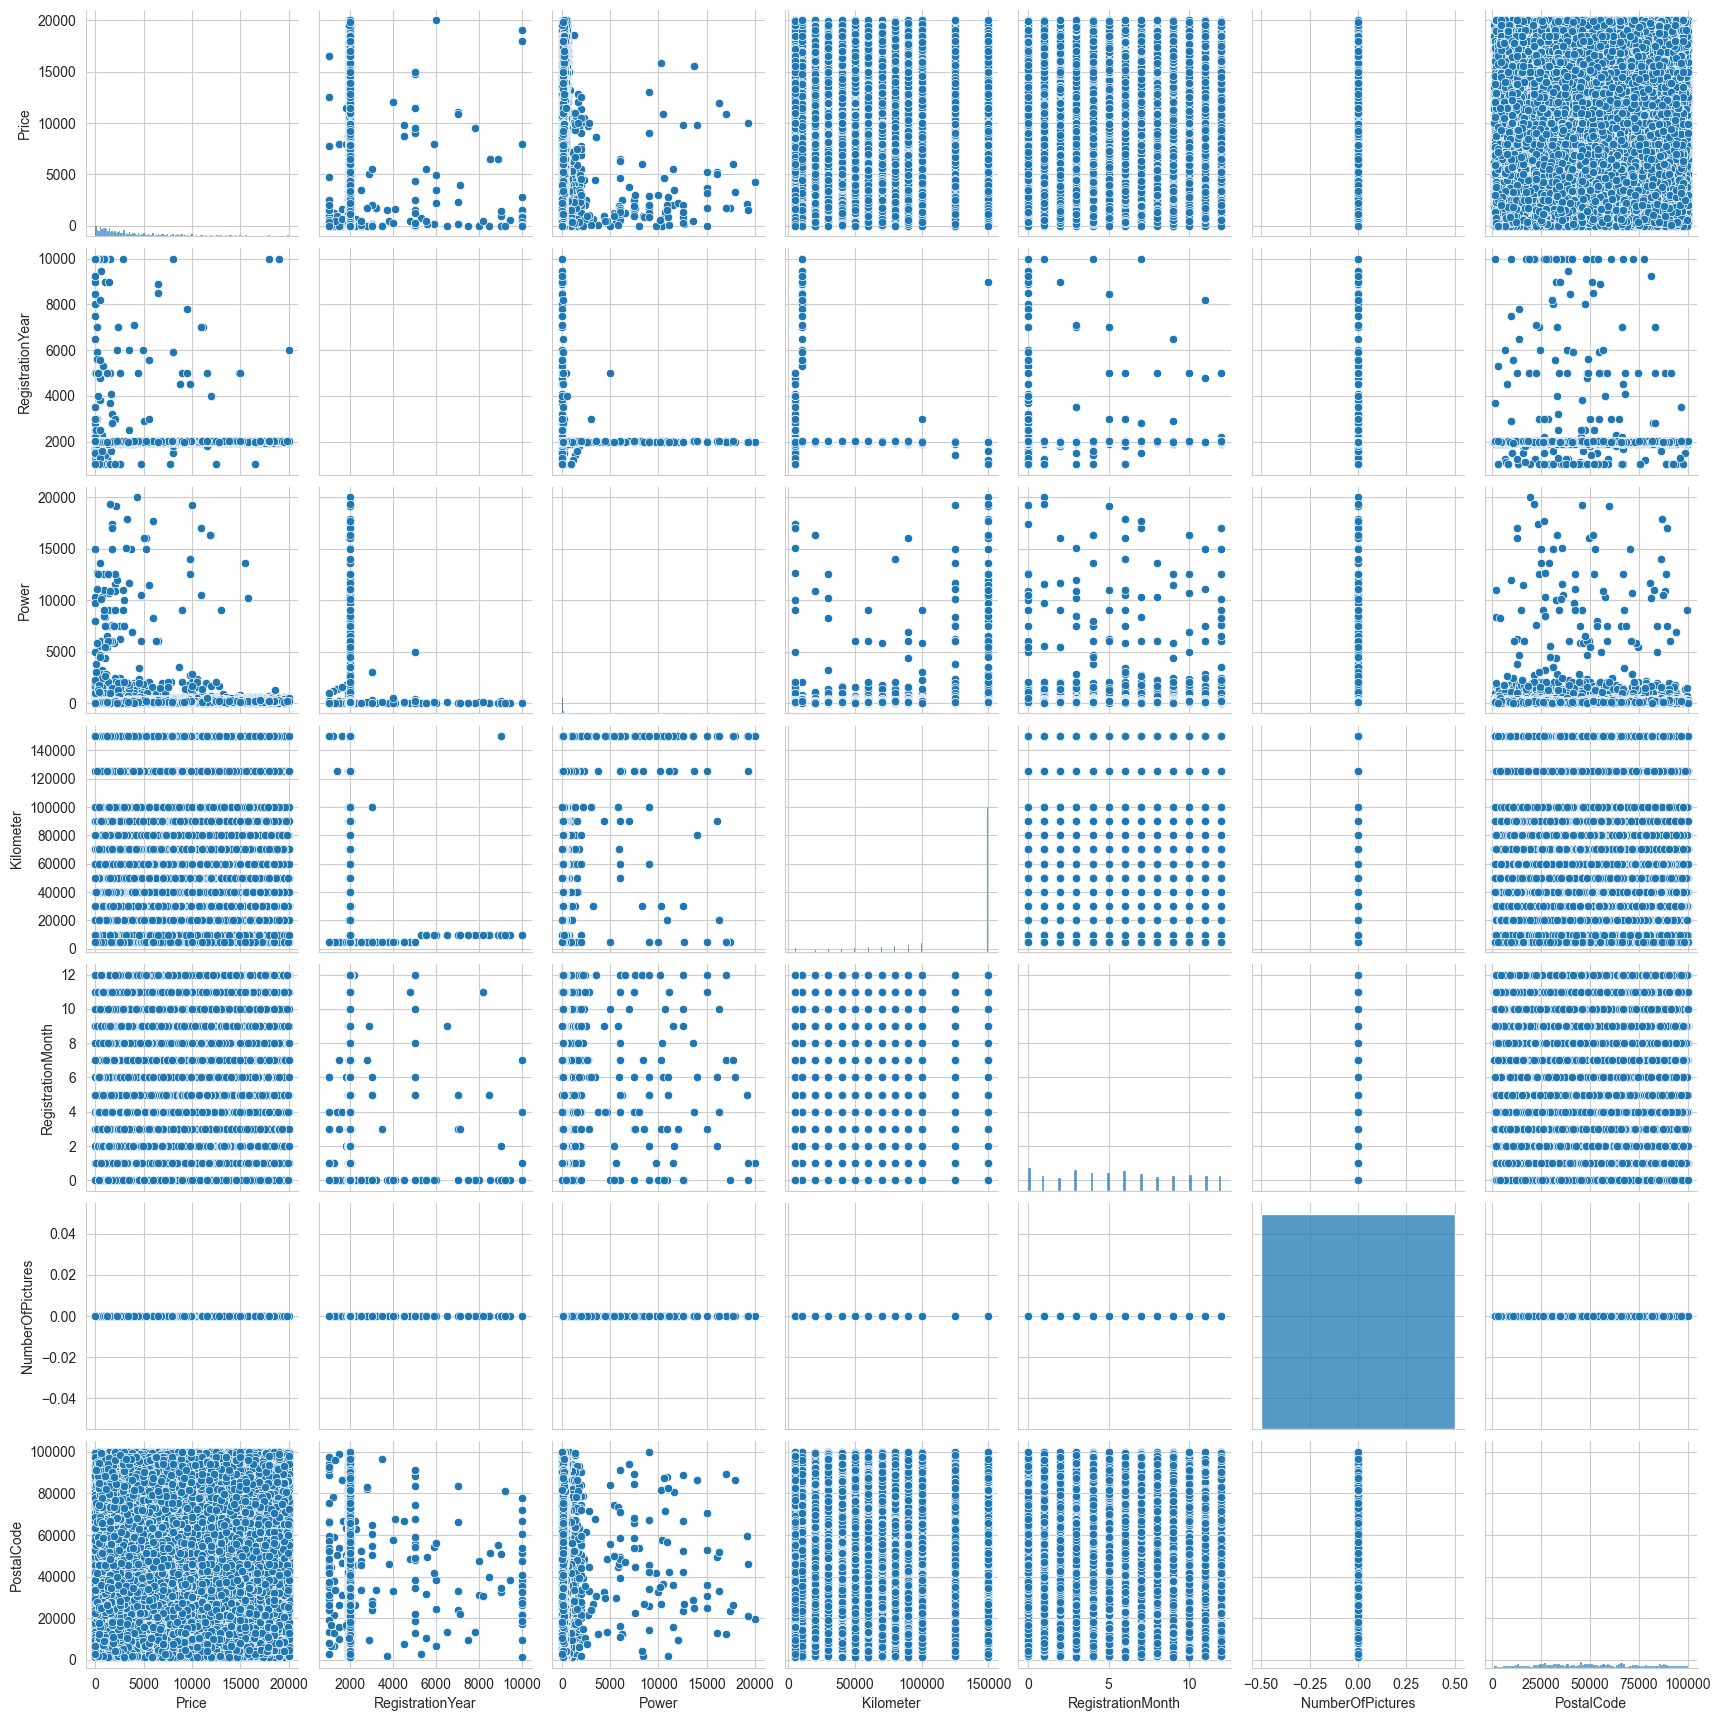

In [5]:
sb.pairplot(data);

In [6]:
pd.DataFrame(round(data.isna().mean()*100,)).style.background_gradient('coolwarm')

#### Conclusion: as long as there are categorical data which contains missing, it is reasonable to fill the missings out by the most frequent values in each column ('mode').

In [12]:
data["VehicleType"] = data["VehicleType"].fillna(data["VehicleType"].mode().values[0])
data["Gearbox"] = data["Gearbox"].fillna(data["Gearbox"].mode().values[0])
data["Model"] = data["Model"].fillna(data["Model"].mode().values[0])
data["FuelType"] = data["FuelType"].fillna(data["FuelType"].mode().values[0])

# если ячейка не заполнена, логично предположить, что ремонта не было - пропуски заполняем 'no'
data["Repaired"] = data["Repaired"].fillna("no")

In [13]:
# checking the results
pd.DataFrame(round(data.isna().mean()*100,)).style.background_gradient('coolwarm')

#### Conclusion: missings are gone, we can proceed.

## 1.3 Checking for dublicates

In [14]:
# taking the columns names' list
data.columns

Index(['DateCrawled', 'Price', 'VehicleType', 'RegistrationYear', 'Gearbox',
       'Power', 'Model', 'Kilometer', 'RegistrationMonth', 'FuelType', 'Brand',
       'Repaired', 'DateCreated', 'NumberOfPictures', 'PostalCode',
       'LastSeen'],
      dtype='object')

In [15]:
check_col = ['DateCrawled', 'Price', 'VehicleType', 'RegistrationYear', 'Gearbox',
       'Power', 'Model', 'Kilometer', 'RegistrationMonth', 'FuelType', 'Brand',
       'Repaired', 'DateCreated', 'NumberOfPictures', 'PostalCode',
       'LastSeen']
for col in check_col:
    print(col, pd.Series(data[col].unique()).duplicated().sum())

DateCrawled 0
Price 0
VehicleType 0
RegistrationYear 0
Gearbox 0
Power 0
Model 0
Kilometer 0
RegistrationMonth 0
FuelType 0
Brand 0
Repaired 0
DateCreated 0
NumberOfPictures 0
PostalCode 0
LastSeen 0


In [16]:
data.duplicated().sum()

5

In [17]:
data = data.drop_duplicates()

In [18]:
data.duplicated().sum()

0

#### Conclusion: dublicates are gone, we can proceed.

### 1.3.1 Removing the columns, which are needed for modelling

In [19]:
data_final = data.copy()

In [20]:
data_final = data_final.drop(['DateCrawled','DateCreated','LastSeen','NumberOfPictures','PostalCode'],axis = 1)

In [21]:
data_final.columns

Index(['Price', 'VehicleType', 'RegistrationYear', 'Gearbox', 'Power', 'Model',
       'Kilometer', 'RegistrationMonth', 'FuelType', 'Brand', 'Repaired'],
      dtype='object')

In [22]:
# lowering all string names in the dataset
data_final.columns = data_final.columns.str.lower()

In [23]:
data_final.head()

price vehicletype  registrationyear gearbox  power  model  kilometer  \
0    480       sedan              1993  manual      0   golf     150000   
1  18300       coupe              2011  manual    190   golf     125000   
2   9800         suv              2004    auto    163  grand     125000   
3   1500       small              2001  manual     75   golf     150000   
4   3600       small              2008  manual     69  fabia      90000   

   registrationmonth  fueltype       brand repaired  
0                  0    petrol  volkswagen       no  
1                  5  gasoline        audi      yes  
2                  8  gasoline        jeep       no  
3                  6    petrol  volkswagen       no  
4                  7  gasoline       skoda       no

In [24]:
data_final.columns

Index(['price', 'vehicletype', 'registrationyear', 'gearbox', 'power', 'model',
       'kilometer', 'registrationmonth', 'fueltype', 'brand', 'repaired'],
      dtype='object')

<div class="alert alert-block alert-warning">
<b>⚠️ Совет:</b> 

Для удобства в дальнейшем анализе можно названия столбцов привести в более читаемый стиль snake_case. Здесь мы используем регулярные выражения.

Полезная <a href='https://habr.com/ru/post/545150/'>статья</a> про regex для начала
    
Этот блогер хорошо объясняет в своем <a href='https://www.youtube.com/watch?v=sHw5hLYFaIw&t=247s'>видео</a>
</div>

```python
df.columns = df.columns.str.replace(r"([A-Z])", r" \1").str.lower().str.replace(' ', '_').str[1:]
```
</div>

In [25]:
# checking the current output
temp = data_final.copy() 
list_c = ['price', 'vehicletype', 'registrationyear', 'gearbox', 'power', 'model',
       'kilometer', 'registrationmonth', 'fueltype', 'brand', 'repaired']
print(temp.info())
for col_l in list_c:
  print('-'* 25)
  print(col_l, temp[col_l].sort_values().unique())
  print(col_l,': кол-во NaN',temp[col_l].isna().sum(),
        ', процент NaN', round(temp[col_l].isna().sum()/len(temp)*100, 2),'%')

<class 'pandas.core.frame.DataFrame'>
Int64Index: 354364 entries, 0 to 354368
Data columns (total 11 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   price              354364 non-null  int64 
 1   vehicletype        354364 non-null  object
 2   registrationyear   354364 non-null  int64 
 3   gearbox            354364 non-null  object
 4   power              354364 non-null  int64 
 5   model              354364 non-null  object
 6   kilometer          354364 non-null  int64 
 7   registrationmonth  354364 non-null  int64 
 8   fueltype           354364 non-null  object
 9   brand              354364 non-null  object
 10  repaired           354364 non-null  object
dtypes: int64(5), object(6)
memory usage: 32.4+ MB
None
-------------------------
price [    0     1     2 ... 19998 19999 20000]
price : кол-во NaN 0 , процент NaN 0.0 %
-------------------------
vehicletype ['bus' 'convertible' 'coupe' 'other' 'sedan' 'small' 'su

fueltype ['cng' 'electric' 'gasoline' 'hybrid' 'lpg' 'other' 'petrol']
fueltype : кол-во NaN 0 , процент NaN 0.0 %
-------------------------
brand ['alfa_romeo' 'audi' 'bmw' 'chevrolet' 'chrysler' 'citroen' 'dacia'
 'daewoo' 'daihatsu' 'fiat' 'ford' 'honda' 'hyundai' 'jaguar' 'jeep' 'kia'
 'lada' 'lancia' 'land_rover' 'mazda' 'mercedes_benz' 'mini' 'mitsubishi'
 'nissan' 'opel' 'peugeot' 'porsche' 'renault' 'rover' 'saab' 'seat'
 'skoda' 'smart' 'sonstige_autos' 'subaru' 'suzuki' 'toyota' 'trabant'
 'volkswagen' 'volvo']
brand : кол-во NaN 0 , процент NaN 0.0 %
-------------------------
repaired ['no' 'yes']
repaired : кол-во NaN 0 , процент NaN 0.0 %


#### Conclusion: good, the dataset is clean, we can proceed.

## 1.4 Working with outliers

In [26]:
data_final.describe()

price  registrationyear          power      kilometer  \
count  354364.000000     354364.000000  354364.000000  354364.000000   
mean     4416.655608       2004.234471     110.093723  128211.373051   
std      4514.159690         90.228593     189.851590   37905.136957   
min         0.000000       1000.000000       0.000000    5000.000000   
25%      1050.000000       1999.000000      69.000000  125000.000000   
50%      2700.000000       2003.000000     105.000000  150000.000000   
75%      6400.000000       2008.000000     143.000000  150000.000000   
max     20000.000000       9999.000000   20000.000000  150000.000000   

       registrationmonth  
count      354364.000000  
mean            5.714641  
std             3.726433  
min             0.000000  
25%             3.000000  
50%             6.000000  
75%             9.000000  
max            12.000000

In [27]:
# renaming some columns' names

data_final = data_final.rename(columns={
    'vehicletype' : 'vehicle_type', 
    'registrationyear' : 'reg_year', 
       'kilometer': 'km', 
    'registrationmonth' : 'reg_month', 
    'fueltype': 'fuel_type'
})

In [28]:
data_final.describe()

price       reg_year          power             km  \
count  354364.000000  354364.000000  354364.000000  354364.000000   
mean     4416.655608    2004.234471     110.093723  128211.373051   
std      4514.159690      90.228593     189.851590   37905.136957   
min         0.000000    1000.000000       0.000000    5000.000000   
25%      1050.000000    1999.000000      69.000000  125000.000000   
50%      2700.000000    2003.000000     105.000000  150000.000000   
75%      6400.000000    2008.000000     143.000000  150000.000000   
max     20000.000000    9999.000000   20000.000000  150000.000000   

           reg_month  
count  354364.000000  
mean        5.714641  
std         3.726433  
min         0.000000  
25%         3.000000  
50%         6.000000  
75%         9.000000  
max        12.000000

***Conclusion:*** 
- the median heavily differ from the mean value in the colum 'price', which mean there are signifincat outliers in the column;

- also, the column 'reg_year' contains wierd values like 1000, which is not possible for the registration year value;

- also, the column 'power' contains outliers, since it is not possible to have a car with power = 0.

In [29]:
data_final['price'].hist(bins=50, figsize=(13, 9));

In [30]:
data_final['reg_year'].hist(bins=50, figsize=(13, 9));

In [31]:
data_final['power'].hist(bins=50, figsize=(13, 9));

## 1.5  Removing outliers in ***'price'*** and ***'power'*** columns

In [32]:
# writing a function for outliers removal
def remove_ouliers(data, column):
    q25=np.array(data[column].quantile(0.25))
    q75=np.array(data[column].quantile(0.75))
    
    first_part=q25-1.5*(q75-q25)
    second_part=q75+1.5*(q75-q25)
    
    del_index = []
    for index_value, value in zip(data[column].index, data[column]):
        if second_part <= value or value <= first_part:
            del_index.append(index_value)
    
    print('Number of rows for removal:' + str(column)+":",
          len(del_index))
    return del_index

In [33]:
# checking the descriptive statistics for 'power' column
print(data_final['power'].min())

0


In [34]:
# checking the descriptive statistics for 'power' column
print(data_final['power'].max())

20000


In [35]:
# checking the descriptive statistics for 'power' column
print(data_final['power'].mode())

0    0
Name: power, dtype: int64


In [36]:
# filling the ouliers in column 'power'
data_final.loc[data_final['power'] > 3500, 'power'] = 3500
data_final.loc[data_final['power'] < 100, 'power'] = 100

In [37]:
# removing outliers

array_num_col = ['price', 'power']
count = 0 
for column in array_num_col:
    index_del = remove_ouliers(data_final, column)
    count += len(index_del)
    data_final = data_final.drop(index_del,axis = 0)
print('Removed:', count)

Number of rows for removal:price: 18979
Number of rows for removal:power: 18761
Removed: 37740


## 1.6  Removing outliers in 'reg_year' and 'reg_month' columns

In [38]:
# reg_year [2016 : 2022]
def reg_year_outliers(value):
    if value >= 2022:
        return 2022
    elif value <=2016:
        return 2016
    else:
        return value

In [39]:
# reg_year
data_final['reg_year'] = data_final['reg_year'].apply(reg_year_outliers)

In [40]:
# reg_month
data_final.loc[data_final['reg_month'] == 0, 'reg_month'] = 1

In [41]:
data_final.describe()

price       reg_year          power             km  \
count  316624.000000  316624.000000  316624.000000  316624.000000   
mean     3481.164368    2016.056629     117.407486  129705.660342   
std      3305.724332       0.293748      25.274596   36734.881748   
min         0.000000    2016.000000     100.000000    5000.000000   
25%       999.000000    2016.000000     100.000000  125000.000000   
50%      2300.000000    2016.000000     101.000000  150000.000000   
75%      4999.000000    2016.000000     131.000000  150000.000000   
max     14400.000000    2022.000000     199.000000  150000.000000   

           reg_month  
count  316624.000000  
mean        5.766534  
std         3.583524  
min         1.000000  
25%         3.000000  
50%         6.000000  
75%         9.000000  
max        12.000000

### 1.7  Проверим признаки на мультиколлинеарность

In [42]:
data_final.corr()

price  reg_year     power        km  reg_month
price      1.000000 -0.041873  0.369308 -0.307265   0.106111
reg_year  -0.041873  1.000000 -0.049661 -0.002991  -0.046121
power      0.369308 -0.049661  1.000000  0.133318   0.066036
km        -0.307265 -0.002991  0.133318  1.000000   0.013966
reg_month  0.106111 -0.046121  0.066036  0.013966   1.000000

# 2  Обучение моделей

## 2.1 Spliting the data into three subsamples for three different purposes: training and testing.

```
As a benchmark, we split the sample in the proportion as follows:
- 60% train_data
- 20% validation_data
- 20% test_data

```

In [43]:
train_data, other_data = train_test_split(data_final, test_size=0.30, random_state=5)
validation_data, test_data = train_test_split(other_data, test_size=0.70, random_state=5)

print('Train sample size:', train_data.shape[0])
print('Validation sample size:', validation_data.shape[0])
print('Test sample size:', test_data.shape[0])

Train sample size: 221636
Validation sample size: 28496
Test sample size: 66492


## 2.2 Coding variables using OHE process as long as we are having _linear models_

**One hot encoding is a process by which categorical variables are converted into a form that could be provided to ML algorithms to do a better job in prediction.**

Check out [sklearn documentation](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html?ref=hackernoon.com) for more details about OHE.

***Applying OHE and saving a new dataset for further analysis. Also, trying to use OrdinalEncoder() to reduce the execution time.***

In [44]:
# One-Hot Encoding
train_data_ohe = pd.get_dummies(train_data, drop_first=True)
validation_data_ohe = pd.get_dummies(validation_data, drop_first=True)
test_data_ohe = pd.get_dummies(test_data, drop_first=True)

<div class="alert alert-block alert-warning">
<b>FYI</b>
    
OHE coding better to do before data split, not after. Otherwise, there can be data leakage.

More about data leakage: https://datascience.stackexchange.com/questions/108663/why-label-encoding-before-split-is-data-leakage

In [45]:
# сформируем две выборки для обучения, валидации и тестирования - целевую и признаки
X_train = train_data_ohe.drop(['price'], axis=1)
y_train = train_data_ohe['price']

X_valid = validation_data_ohe.drop(['price'], axis=1)
y_valid = validation_data_ohe['price']

X_test = test_data_ohe.drop(['price'], axis=1)
y_test = test_data_ohe['price']

In [46]:
print('Train features sample size:', X_train.shape[0])
print('Train target sample size:', y_train.shape[0])
print()
print('Test features sample size:', X_test.shape[0])
print('Test target sample size:', y_test.shape[0])

Train features sample size: 221636
Train target sample size: 221636

Test features sample size: 66492
Test target sample size: 66492


In [47]:
print('Validation features sample size:', X_valid.shape[0])
print('Validation target sample size:', y_valid.shape[0])

Validation features sample size: 28496
Validation target sample size: 28496


In [48]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 221636 entries, 293759 to 333391
Columns: 305 entries, reg_year to repaired_yes
dtypes: int64(4), uint8(301)
memory usage: 72.1 MB


In [49]:
X_valid.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28496 entries, 182485 to 219315
Columns: 289 entries, reg_year to repaired_yes
dtypes: int64(4), uint8(285)
memory usage: 8.8 MB


In [50]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 66492 entries, 294936 to 29353
Columns: 300 entries, reg_year to repaired_yes
dtypes: int64(4), uint8(296)
memory usage: 21.3 MB


<div class="alert alert-block alert-info">
<b>FYI:</b> If after coding there are different number of columns in X_train (306), X_valid (299), X_test (300), it means in initial datasets there are different number of unique columns. Some features can be deleted, other (necessary ones) can be added.
</div>

## 2.3  Coding categorical variables with OrdinalEncoder()

***Modelling gradient boosting, decision tree, random forest takes a while. To speed up the process a bit, it is worth to use OrdinalEncoding() instead of OHE - coded data this way learns faster.***

In [51]:
from sklearn.preprocessing import OrdinalEncoder

In [52]:
ord_enc = OrdinalEncoder()

In [53]:
# coding only categorical variables
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 221636 entries, 293759 to 333391
Data columns (total 11 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   price         221636 non-null  int64 
 1   vehicle_type  221636 non-null  object
 2   reg_year      221636 non-null  int64 
 3   gearbox       221636 non-null  object
 4   power         221636 non-null  int64 
 5   model         221636 non-null  object
 6   km            221636 non-null  int64 
 7   reg_month     221636 non-null  int64 
 8   fuel_type     221636 non-null  object
 9   brand         221636 non-null  object
 10  repaired      221636 non-null  object
dtypes: int64(5), object(6)
memory usage: 20.3+ MB


In [54]:
train_data[['vehicle_type', 'gearbox', 'fuel_type', 'repaired']] = ord_enc.fit_transform(train_data[['vehicle_type', 'gearbox', 'fuel_type', 'repaired']])

In [55]:
validation_data[['vehicle_type', 'gearbox', 'fuel_type', 'repaired']] = ord_enc.fit_transform(validation_data[['vehicle_type', 'gearbox', 'fuel_type', 'repaired']])

In [56]:
test_data[['vehicle_type', 'gearbox', 'fuel_type', 'repaired']] = ord_enc.fit_transform(test_data[['vehicle_type', 'gearbox', 'fuel_type', 'repaired']])

In [57]:
# after Ordinal Encoding we can split the dataset for further modeling
X_train_ord = train_data.drop(['price'], axis=1)
y_train_ord = train_data['price']

X_valid_ord = validation_data.drop(['price'], axis=1)
y_valid_ord = validation_data['price']

X_test_ord = test_data.drop(['price'], axis=1)
y_test_ord = test_data['price']

## 2.4  Preparing dataset for gradient boosting

In [58]:
# preparing dataset for gradient boosting models
data_boost = data_final.copy()
data_boost = data_boost.astype({'vehicle_type' : 'category',
                                                'gearbox' : 'category',
                                                'model' : 'category',
                                                'fuel_type' : 'category',
                                                'brand' : 'category',
                                                'repaired' : 'category'})

In [59]:
train_data_boost, other_data_boost = train_test_split(data_boost, test_size=0.30, random_state=5)
validation_data_boost, test_data_boost = train_test_split(other_data_boost, test_size=0.70, random_state=5)

print('Train sample size:', train_data_boost.shape[0])
print('Validation sample size:', validation_data_boost.shape[0])
print('Test sample size:', test_data_boost.shape[0])

Train sample size: 221636
Validation sample size: 28496
Test sample size: 66492


In [60]:
# train_data_boost[['vehicle_type', 'gearbox', 'fuel_type', 'repaired']] = ord_enc.fit_transform(train_data_boost[['vehicle_type', 'gearbox', 'fuel_type', 'repaired']])

In [61]:
# validation_data_boost[['vehicle_type', 'gearbox', 'fuel_type', 'repaired']] = ord_enc.fit_transform(validation_data_boost[['vehicle_type', 'gearbox', 'fuel_type', 'repaired']])

In [62]:
# test_data_boost[['vehicle_type', 'gearbox', 'fuel_type', 'repaired']] = ord_enc.fit_transform(test_data_boost[['vehicle_type', 'gearbox', 'fuel_type', 'repaired']])

In [63]:
# сформируем две выборки для обучения, валидации и тестирования - целевую и признаки - для градиентного бустинга
X_train_boost = train_data_boost.drop(['price'], axis=1)
y_train_boost = train_data_boost['price']

X_valid_boost = validation_data_boost.drop(['price'], axis=1)
y_valid_boost = validation_data_boost['price']

X_test_boost = test_data_boost.drop(['price'], axis=1)
y_test_boost = test_data_boost['price']

print('Train features sample size:', X_train_boost.shape[0])
print('Test target sample size:', y_train_boost.shape[0])
print()
print('Validation features sample size:', X_valid_boost.shape[0])
print('Validation target sample size:', y_valid_boost.shape[0])
print()
print('Test features sample size:', X_test_boost.shape[0])
print('Test target sample size:', y_test_boost.shape[0])

Train features sample size: 221636
Test target sample size: 221636

Validation features sample size: 28496
Validation target sample size: 28496

Test features sample size: 66492
Test target sample size: 66492


#### Conclusion: data was split into 6 subsamples 60/20/20 for training and testing purposes.

## 2.5  Training the ML models

### 2.5.1 Changing type of variables in ***train, valid, test samples***

In [66]:
# changing the type of variables
X_train_ord['model'] = np.floor(pd.to_numeric(X_train_ord['model'], errors='coerce')).astype('float64')
X_train_ord['brand'] = np.floor(pd.to_numeric(X_train_ord['brand'], errors='coerce')).astype('float64')

X_valid_ord['model'] = np.floor(pd.to_numeric(X_valid_ord['model'], errors='coerce')).astype('float64')
X_valid_ord['brand'] = np.floor(pd.to_numeric(X_valid_ord['brand'], errors='coerce')).astype('float64')

X_test_ord['model'] = np.floor(pd.to_numeric(X_test_ord['model'], errors='coerce')).astype('float64')
X_test_ord['brand'] = np.floor(pd.to_numeric(X_test_ord['brand'], errors='coerce')).astype('float64')

# X_train_boost['model'] = np.floor(pd.to_numeric(X_train_boost['model'], errors='coerce')).astype('float64')
# X_train_boost['brand'] = np.floor(pd.to_numeric(X_train_boost['brand'], errors='coerce')).astype('float64')

# X_valid_boost['model'] = np.floor(pd.to_numeric(X_valid_boost['model'], errors='coerce')).astype('float64')
# X_valid_boost['brand'] = np.floor(pd.to_numeric(X_valid_boost['brand'], errors='coerce')).astype('float64')

# X_test_boost['model'] = np.floor(pd.to_numeric(X_test_boost['model'], errors='coerce')).astype('float64')
# X_test_boost['brand'] = np.floor(pd.to_numeric(X_test_boost['brand'], errors='coerce')).astype('float64')

In [67]:
X_train = np.nan_to_num(X_train)
X_valid = np.nan_to_num(X_valid)
X_test = np.nan_to_num(X_test)

y_train = np.nan_to_num(y_train)
y_valid = np.nan_to_num(y_valid)
y_test = np.nan_to_num(y_test)

In [68]:
X_train_ord = np.nan_to_num(X_train_ord)
X_valid_ord = np.nan_to_num(X_valid_ord)
X_test_ord = np.nan_to_num(X_test_ord)

y_train_ord = np.nan_to_num(y_train_ord)
y_valid_ord = np.nan_to_num(y_valid_ord)
y_test_ord = np.nan_to_num(y_test_ord)

In [69]:
# X_train_boost = np.nan_to_num(X_train_boost)
# X_valid_boost = np.nan_to_num(X_valid_boost)
# X_test_boost = np.nan_to_num(X_test_boost)

# y_train_boost = np.nan_to_num(y_train_boost)
# y_valid_boost = np.nan_to_num(y_valid_boost)
# y_test_boost = np.nan_to_num(y_test_boost)

In [70]:
# # changing the type of variables
# X_train_ord['model'] = np.floor(pd.to_numeric(X_train_ord['model'], errors='coerce')).astype('float64')
# X_train_ord['brand'] = np.floor(pd.to_numeric(X_train_ord['brand'], errors='coerce')).astype('float64')

# X_valid_ord['model'] = np.floor(pd.to_numeric(X_valid_ord['model'], errors='coerce')).astype('float64')
# X_valid_ord['brand'] = np.floor(pd.to_numeric(X_valid_ord['brand'], errors='coerce')).astype('float64')

# X_test_ord['model'] = np.floor(pd.to_numeric(X_test_ord['model'], errors='coerce')).astype('float64')
# X_test_ord['brand'] = np.floor(pd.to_numeric(X_test_ord['brand'], errors='coerce')).astype('float64')

#### Сравним, как обучаются модели Decision Tree Regressor, Random Forest Regressor, Dummy Regressor, lightGBM. 

***Using GridSearchCV in order to find best possible hyperparameters for the models - CatBoostRegressor (Pool), Decision Tree (DT), Random Forest (RF), Dummy Regressor, Gradient boosting (lightGBM).***

### 2.5.2 Cat Boost Regressor

In [73]:
%%time
# catboost
catboost = CatBoostRegressor(loss_function='RMSE')

parameters_boost = {'depth': [5, 10], 'learning_rate': np.arange(0.1,1,0.2)}

catboost_grid = catboost.grid_search(parameters_boost,
            Pool(X_train_boost, y_train_boost, cat_features=['vehicle_type',
                                                'gearbox',
                                                'model',
                                                'fuel_type',
                                                'brand',
                                                'repaired']),
            cv=3,
            verbose=False,
            plot=False)

0:	learn: 4452.4113461	test: 4470.6348982	best: 4470.6348982 (0)	total: 106ms	remaining: 1m 46s
1:	learn: 4153.8937241	test: 4170.8499474	best: 4170.8499474 (1)	total: 200ms	remaining: 1m 39s
2:	learn: 3891.9482503	test: 3908.1358783	best: 3908.1358783 (2)	total: 291ms	remaining: 1m 36s
3:	learn: 3667.7249105	test: 3683.9580091	best: 3683.9580091 (3)	total: 402ms	remaining: 1m 40s
4:	learn: 3472.9252958	test: 3488.2505365	best: 3488.2505365 (4)	total: 495ms	remaining: 1m 38s
5:	learn: 3303.7269245	test: 3317.9545176	best: 3317.9545176 (5)	total: 583ms	remaining: 1m 36s
6:	learn: 3156.7037277	test: 3169.4166834	best: 3169.4166834 (6)	total: 699ms	remaining: 1m 39s
7:	learn: 3030.4811091	test: 3041.7391609	best: 3041.7391609 (7)	total: 814ms	remaining: 1m 40s
8:	learn: 2919.3618940	test: 2929.7938537	best: 2929.7938537 (8)	total: 930ms	remaining: 1m 42s
9:	learn: 2823.3291632	test: 2833.8967836	best: 2833.8967836 (9)	total: 1.06s	remaining: 1m 45s
10:	learn: 2744.3555063	test: 2754.18501

84:	learn: 2103.1529051	test: 2099.7337385	best: 2099.7337385 (84)	total: 7.21s	remaining: 1m 17s
85:	learn: 2102.0253676	test: 2098.6158237	best: 2098.6158237 (85)	total: 7.41s	remaining: 1m 18s
86:	learn: 2101.0396771	test: 2097.6220395	best: 2097.6220395 (86)	total: 7.52s	remaining: 1m 18s
87:	learn: 2100.2733452	test: 2096.9236193	best: 2096.9236193 (87)	total: 7.61s	remaining: 1m 18s
88:	learn: 2099.1709910	test: 2095.7253328	best: 2095.7253328 (88)	total: 7.7s	remaining: 1m 18s
89:	learn: 2097.1804938	test: 2093.2699340	best: 2093.2699340 (89)	total: 7.8s	remaining: 1m 18s
90:	learn: 2096.1421820	test: 2092.1838995	best: 2092.1838995 (90)	total: 7.91s	remaining: 1m 18s
91:	learn: 2094.8277615	test: 2090.8633238	best: 2090.8633238 (91)	total: 8.01s	remaining: 1m 19s
92:	learn: 2093.4678440	test: 2089.5000727	best: 2089.5000727 (92)	total: 8.09s	remaining: 1m 18s
93:	learn: 2092.7535399	test: 2088.6906804	best: 2088.6906804 (93)	total: 8.17s	remaining: 1m 18s
94:	learn: 2091.613486

170:	learn: 2030.2394871	test: 2025.8905218	best: 2025.8905218 (170)	total: 14.8s	remaining: 1m 11s
171:	learn: 2029.8185508	test: 2025.4488175	best: 2025.4488175 (171)	total: 14.8s	remaining: 1m 11s
172:	learn: 2029.4269679	test: 2025.1924636	best: 2025.1924636 (172)	total: 14.9s	remaining: 1m 11s
173:	learn: 2028.9664765	test: 2024.5685060	best: 2024.5685060 (173)	total: 15s	remaining: 1m 11s
174:	learn: 2028.5390670	test: 2024.1435175	best: 2024.1435175 (174)	total: 15.1s	remaining: 1m 10s
175:	learn: 2028.1883501	test: 2023.7357960	best: 2023.7357960 (175)	total: 15.1s	remaining: 1m 10s
176:	learn: 2027.8833397	test: 2023.4950676	best: 2023.4950676 (176)	total: 15.2s	remaining: 1m 10s
177:	learn: 2027.2646474	test: 2022.9597470	best: 2022.9597470 (177)	total: 15.3s	remaining: 1m 10s
178:	learn: 2026.9066395	test: 2022.7102937	best: 2022.7102937 (178)	total: 15.4s	remaining: 1m 10s
179:	learn: 2026.6016742	test: 2022.3875067	best: 2022.3875067 (179)	total: 15.4s	remaining: 1m 10s
18

253:	learn: 1994.0500615	test: 1991.9769330	best: 1991.9769330 (253)	total: 20.7s	remaining: 1m
254:	learn: 1993.4447888	test: 1991.3719725	best: 1991.3719725 (254)	total: 20.8s	remaining: 1m
255:	learn: 1993.2765887	test: 1991.2792093	best: 1991.2792093 (255)	total: 20.8s	remaining: 1m
256:	learn: 1992.8447019	test: 1990.8181884	best: 1990.8181884 (256)	total: 20.9s	remaining: 1m
257:	learn: 1992.4954476	test: 1990.4756825	best: 1990.4756825 (257)	total: 21s	remaining: 1m
258:	learn: 1992.1548302	test: 1990.1572679	best: 1990.1572679 (258)	total: 21.1s	remaining: 1m
259:	learn: 1991.8372010	test: 1989.8866669	best: 1989.8866669 (259)	total: 21.1s	remaining: 1m
260:	learn: 1991.6895657	test: 1989.7122091	best: 1989.7122091 (260)	total: 21.2s	remaining: 1m
261:	learn: 1991.4864513	test: 1989.6426028	best: 1989.6426028 (261)	total: 21.3s	remaining: 59.9s
262:	learn: 1991.1479562	test: 1989.4830603	best: 1989.4830603 (262)	total: 21.4s	remaining: 59.8s
263:	learn: 1990.8577338	test: 1989.

338:	learn: 1970.5699307	test: 1971.5111115	best: 1971.5111115 (338)	total: 26.5s	remaining: 51.8s
339:	learn: 1970.2744792	test: 1971.2433488	best: 1971.2433488 (339)	total: 26.6s	remaining: 51.6s
340:	learn: 1970.0420660	test: 1971.0579642	best: 1971.0579642 (340)	total: 26.7s	remaining: 51.5s
341:	learn: 1969.9876989	test: 1970.9914079	best: 1970.9914079 (341)	total: 26.7s	remaining: 51.4s
342:	learn: 1969.5240237	test: 1970.6279858	best: 1970.6279858 (342)	total: 26.8s	remaining: 51.3s
343:	learn: 1969.0673139	test: 1970.2812357	best: 1970.2812357 (343)	total: 26.9s	remaining: 51.2s
344:	learn: 1968.9270603	test: 1970.1811382	best: 1970.1811382 (344)	total: 26.9s	remaining: 51.1s
345:	learn: 1968.6183380	test: 1969.9194006	best: 1969.9194006 (345)	total: 27s	remaining: 51s
346:	learn: 1968.4402579	test: 1969.7190948	best: 1969.7190948 (346)	total: 27s	remaining: 50.9s
347:	learn: 1967.9953842	test: 1969.3259461	best: 1969.3259461 (347)	total: 27.1s	remaining: 50.8s
348:	learn: 1967

423:	learn: 1950.5562027	test: 1954.6190818	best: 1954.6190818 (423)	total: 32.5s	remaining: 44.1s
424:	learn: 1950.3924022	test: 1954.5537574	best: 1954.5537574 (424)	total: 32.5s	remaining: 44s
425:	learn: 1950.1898305	test: 1954.4669599	best: 1954.4669599 (425)	total: 32.6s	remaining: 43.9s
426:	learn: 1950.1259386	test: 1954.4014036	best: 1954.4014036 (426)	total: 32.7s	remaining: 43.8s
427:	learn: 1949.9965983	test: 1954.2939222	best: 1954.2939222 (427)	total: 32.7s	remaining: 43.7s
428:	learn: 1949.8429409	test: 1954.1349152	best: 1954.1349152 (428)	total: 32.8s	remaining: 43.7s
429:	learn: 1949.6094105	test: 1953.8424376	best: 1953.8424376 (429)	total: 32.9s	remaining: 43.6s
430:	learn: 1949.5191262	test: 1953.7827067	best: 1953.7827067 (430)	total: 33s	remaining: 43.5s
431:	learn: 1949.4773778	test: 1953.7651861	best: 1953.7651861 (431)	total: 33s	remaining: 43.4s
432:	learn: 1949.2714598	test: 1953.6681509	best: 1953.6681509 (432)	total: 33.1s	remaining: 43.3s
433:	learn: 1948

508:	learn: 1935.6043654	test: 1941.8553226	best: 1941.8553226 (508)	total: 39.5s	remaining: 38.1s
509:	learn: 1935.5160024	test: 1941.7750990	best: 1941.7750990 (509)	total: 39.5s	remaining: 38s
510:	learn: 1935.3660687	test: 1941.7012945	best: 1941.7012945 (510)	total: 39.6s	remaining: 37.9s
511:	learn: 1935.0793332	test: 1941.3358913	best: 1941.3358913 (511)	total: 39.7s	remaining: 37.8s
512:	learn: 1934.9320557	test: 1941.1715923	best: 1941.1715923 (512)	total: 39.8s	remaining: 37.8s
513:	learn: 1934.7593029	test: 1940.9868749	best: 1940.9868749 (513)	total: 39.9s	remaining: 37.7s
514:	learn: 1934.6786100	test: 1940.9181772	best: 1940.9181772 (514)	total: 39.9s	remaining: 37.6s
515:	learn: 1934.4101800	test: 1940.6791329	best: 1940.6791329 (515)	total: 40s	remaining: 37.5s
516:	learn: 1934.3327106	test: 1940.6485485	best: 1940.6485485 (516)	total: 40s	remaining: 37.4s
517:	learn: 1934.1571008	test: 1940.4926139	best: 1940.4926139 (517)	total: 40.1s	remaining: 37.3s
518:	learn: 1934

592:	learn: 1924.2843309	test: 1932.5621563	best: 1932.5550618 (590)	total: 53.1s	remaining: 36.5s
593:	learn: 1924.1784104	test: 1932.5097401	best: 1932.5097401 (593)	total: 53.2s	remaining: 36.4s
594:	learn: 1923.9755232	test: 1932.3757275	best: 1932.3757275 (594)	total: 53.2s	remaining: 36.3s
595:	learn: 1923.9494972	test: 1932.3407123	best: 1932.3407123 (595)	total: 53.3s	remaining: 36.2s
596:	learn: 1923.7496235	test: 1932.0993396	best: 1932.0993396 (596)	total: 53.4s	remaining: 36.1s
597:	learn: 1923.6265311	test: 1932.0562902	best: 1932.0562902 (597)	total: 53.5s	remaining: 36s
598:	learn: 1923.4313195	test: 1931.9273593	best: 1931.9273593 (598)	total: 53.6s	remaining: 35.9s
599:	learn: 1923.1707395	test: 1931.7798843	best: 1931.7798843 (599)	total: 53.7s	remaining: 35.8s
600:	learn: 1923.0899490	test: 1931.7475151	best: 1931.7475151 (600)	total: 53.8s	remaining: 35.8s
601:	learn: 1922.7850876	test: 1931.2842987	best: 1931.2842987 (601)	total: 53.9s	remaining: 35.7s
602:	learn: 

678:	learn: 1913.9834219	test: 1924.4967118	best: 1924.4967118 (678)	total: 1m 4s	remaining: 30.4s
679:	learn: 1913.8805927	test: 1924.4456979	best: 1924.4456979 (679)	total: 1m 4s	remaining: 30.3s
680:	learn: 1913.8706938	test: 1924.4429835	best: 1924.4429835 (680)	total: 1m 4s	remaining: 30.2s
681:	learn: 1913.8225641	test: 1924.4089696	best: 1924.4089696 (681)	total: 1m 4s	remaining: 30.1s
682:	learn: 1913.7267028	test: 1924.3874712	best: 1924.3874712 (682)	total: 1m 4s	remaining: 30s
683:	learn: 1913.6532555	test: 1924.4053509	best: 1924.3874712 (682)	total: 1m 4s	remaining: 29.9s
684:	learn: 1913.6372696	test: 1924.4186448	best: 1924.3874712 (682)	total: 1m 4s	remaining: 29.7s
685:	learn: 1913.6090529	test: 1924.3826551	best: 1924.3826551 (685)	total: 1m 4s	remaining: 29.6s
686:	learn: 1913.4400803	test: 1924.2249736	best: 1924.2249736 (686)	total: 1m 4s	remaining: 29.5s
687:	learn: 1913.2696018	test: 1924.1173636	best: 1924.1173636 (687)	total: 1m 4s	remaining: 29.4s
688:	learn: 

764:	learn: 1906.2949125	test: 1919.1233189	best: 1919.1233189 (764)	total: 1m 10s	remaining: 21.8s
765:	learn: 1906.2000424	test: 1919.0366491	best: 1919.0366491 (765)	total: 1m 10s	remaining: 21.7s
766:	learn: 1906.0447227	test: 1918.9546131	best: 1918.9546131 (766)	total: 1m 10s	remaining: 21.6s
767:	learn: 1905.9122586	test: 1918.9400214	best: 1918.9400214 (767)	total: 1m 10s	remaining: 21.5s
768:	learn: 1905.8399282	test: 1918.8946491	best: 1918.8946491 (768)	total: 1m 11s	remaining: 21.4s
769:	learn: 1905.7966545	test: 1918.8538076	best: 1918.8538076 (769)	total: 1m 11s	remaining: 21.3s
770:	learn: 1905.7019219	test: 1918.8002504	best: 1918.8002504 (770)	total: 1m 11s	remaining: 21.2s
771:	learn: 1905.1662606	test: 1918.1884810	best: 1918.1884810 (771)	total: 1m 11s	remaining: 21.1s
772:	learn: 1905.0860175	test: 1918.1856529	best: 1918.1856529 (772)	total: 1m 11s	remaining: 21s
773:	learn: 1905.0599771	test: 1918.1934328	best: 1918.1856529 (772)	total: 1m 11s	remaining: 20.9s
77

849:	learn: 1897.2065528	test: 1912.1715770	best: 1912.1715770 (849)	total: 1m 16s	remaining: 13.5s
850:	learn: 1897.1702525	test: 1912.1534674	best: 1912.1534674 (850)	total: 1m 16s	remaining: 13.5s
851:	learn: 1897.1264999	test: 1912.1300298	best: 1912.1300298 (851)	total: 1m 16s	remaining: 13.4s
852:	learn: 1896.9064282	test: 1911.9700214	best: 1911.9700214 (852)	total: 1m 16s	remaining: 13.3s
853:	learn: 1896.8558804	test: 1911.9319343	best: 1911.9319343 (853)	total: 1m 16s	remaining: 13.2s
854:	learn: 1896.7971276	test: 1911.8993575	best: 1911.8993575 (854)	total: 1m 16s	remaining: 13.1s
855:	learn: 1896.7686890	test: 1911.8668359	best: 1911.8668359 (855)	total: 1m 17s	remaining: 13s
856:	learn: 1896.6725618	test: 1911.8114556	best: 1911.8114556 (856)	total: 1m 17s	remaining: 12.9s
857:	learn: 1896.6408459	test: 1911.7973127	best: 1911.7973127 (857)	total: 1m 17s	remaining: 12.8s
858:	learn: 1896.5882311	test: 1911.7735189	best: 1911.7735189 (858)	total: 1m 17s	remaining: 12.7s
85

933:	learn: 1890.4697632	test: 1906.8619903	best: 1906.8435999 (932)	total: 1m 22s	remaining: 5.86s
934:	learn: 1890.4370992	test: 1906.8333499	best: 1906.8333499 (934)	total: 1m 22s	remaining: 5.78s
935:	learn: 1890.3735819	test: 1906.7699446	best: 1906.7699446 (935)	total: 1m 23s	remaining: 5.68s
936:	learn: 1890.3521887	test: 1906.7525710	best: 1906.7525710 (936)	total: 1m 23s	remaining: 5.59s
937:	learn: 1890.2933550	test: 1906.6917781	best: 1906.6917781 (937)	total: 1m 23s	remaining: 5.5s
938:	learn: 1890.2736385	test: 1906.6807981	best: 1906.6807981 (938)	total: 1m 23s	remaining: 5.41s
939:	learn: 1890.2423194	test: 1906.6706125	best: 1906.6706125 (939)	total: 1m 23s	remaining: 5.32s
940:	learn: 1890.1344990	test: 1906.6148695	best: 1906.6148695 (940)	total: 1m 23s	remaining: 5.23s
941:	learn: 1889.9248023	test: 1906.4553240	best: 1906.4553240 (941)	total: 1m 23s	remaining: 5.14s
942:	learn: 1889.8598117	test: 1906.4309761	best: 1906.4309761 (942)	total: 1m 23s	remaining: 5.05s
9

17:	learn: 2159.4825023	test: 2160.3916447	best: 2160.3916447 (17)	total: 1.27s	remaining: 1m 9s
18:	learn: 2154.8782704	test: 2155.6087954	best: 2155.6087954 (18)	total: 1.33s	remaining: 1m 8s
19:	learn: 2151.2144455	test: 2151.5712025	best: 2151.5712025 (19)	total: 1.4s	remaining: 1m 8s
20:	learn: 2145.4664672	test: 2145.8137349	best: 2145.8137349 (20)	total: 1.47s	remaining: 1m 8s
21:	learn: 2141.9836570	test: 2142.1801462	best: 2142.1801462 (21)	total: 1.53s	remaining: 1m 7s
22:	learn: 2137.8435321	test: 2137.7899903	best: 2137.7899903 (22)	total: 1.59s	remaining: 1m 7s
23:	learn: 2131.0613563	test: 2130.9302791	best: 2130.9302791 (23)	total: 1.67s	remaining: 1m 7s
24:	learn: 2125.0449767	test: 2124.5552441	best: 2124.5552441 (24)	total: 1.91s	remaining: 1m 14s
25:	learn: 2121.9231530	test: 2121.4541436	best: 2121.4541436 (25)	total: 1.98s	remaining: 1m 14s
26:	learn: 2119.3815481	test: 2118.1319045	best: 2118.1319045 (26)	total: 2.04s	remaining: 1m 13s
27:	learn: 2115.2622083	test

103:	learn: 1983.1866872	test: 1987.0954367	best: 1987.0954367 (103)	total: 7.4s	remaining: 1m 3s
104:	learn: 1982.1707817	test: 1986.6327041	best: 1986.6327041 (104)	total: 7.46s	remaining: 1m 3s
105:	learn: 1981.0773106	test: 1986.0073927	best: 1986.0073927 (105)	total: 7.5s	remaining: 1m 3s
106:	learn: 1980.4084017	test: 1985.3612939	best: 1985.3612939 (106)	total: 7.56s	remaining: 1m 3s
107:	learn: 1979.9278061	test: 1984.6944538	best: 1984.6944538 (107)	total: 7.6s	remaining: 1m 2s
108:	learn: 1976.6161595	test: 1981.2438316	best: 1981.2438316 (108)	total: 7.7s	remaining: 1m 2s
109:	learn: 1975.6990871	test: 1980.0781022	best: 1980.0781022 (109)	total: 7.77s	remaining: 1m 2s
110:	learn: 1974.9774537	test: 1979.6144405	best: 1979.6144405 (110)	total: 7.82s	remaining: 1m 2s
111:	learn: 1974.0087953	test: 1978.9453228	best: 1978.9453228 (111)	total: 7.87s	remaining: 1m 2s
112:	learn: 1973.4280357	test: 1978.4016303	best: 1978.4016303 (112)	total: 7.9s	remaining: 1m 2s
113:	learn: 197

189:	learn: 1934.1034667	test: 1945.9740500	best: 1945.9740500 (189)	total: 13.3s	remaining: 56.7s
190:	learn: 1933.4171053	test: 1945.0588233	best: 1945.0588233 (190)	total: 13.4s	remaining: 56.6s
191:	learn: 1933.0039623	test: 1944.7702091	best: 1944.7702091 (191)	total: 13.4s	remaining: 56.4s
192:	learn: 1932.8008944	test: 1944.4993600	best: 1944.4993600 (192)	total: 13.5s	remaining: 56.3s
193:	learn: 1931.6275710	test: 1943.2089690	best: 1943.2089690 (193)	total: 13.6s	remaining: 56.3s
194:	learn: 1931.3751344	test: 1943.2049807	best: 1943.2049807 (194)	total: 13.6s	remaining: 56.2s
195:	learn: 1930.9450498	test: 1942.8029718	best: 1942.8029718 (195)	total: 13.7s	remaining: 56.1s
196:	learn: 1930.5905390	test: 1942.4294255	best: 1942.4294255 (196)	total: 13.7s	remaining: 56s
197:	learn: 1930.1633583	test: 1942.1555644	best: 1942.1555644 (197)	total: 13.8s	remaining: 55.9s
198:	learn: 1929.8566130	test: 1941.8507444	best: 1941.8507444 (198)	total: 13.8s	remaining: 55.7s
199:	learn: 

276:	learn: 1900.3629206	test: 1917.5956826	best: 1917.5956826 (276)	total: 19.2s	remaining: 50.1s
277:	learn: 1900.2536929	test: 1917.5778557	best: 1917.5778557 (277)	total: 19.2s	remaining: 50s
278:	learn: 1900.2041764	test: 1917.5338120	best: 1917.5338120 (278)	total: 19.3s	remaining: 49.8s
279:	learn: 1900.1673345	test: 1917.5564693	best: 1917.5338120 (278)	total: 19.3s	remaining: 49.7s
280:	learn: 1899.7780985	test: 1917.0971701	best: 1917.0971701 (280)	total: 19.4s	remaining: 49.6s
281:	learn: 1899.0905699	test: 1916.7910599	best: 1916.7910599 (281)	total: 19.5s	remaining: 49.6s
282:	learn: 1898.3169295	test: 1916.0998575	best: 1916.0998575 (282)	total: 19.6s	remaining: 49.6s
283:	learn: 1898.1312958	test: 1915.9324305	best: 1915.9324305 (283)	total: 19.6s	remaining: 49.5s
284:	learn: 1898.0398026	test: 1915.8068693	best: 1915.8068693 (284)	total: 19.7s	remaining: 49.4s
285:	learn: 1897.8484721	test: 1915.7966865	best: 1915.7966865 (285)	total: 19.8s	remaining: 49.4s
286:	learn: 

360:	learn: 1882.3631755	test: 1904.9701212	best: 1904.9701212 (360)	total: 24.8s	remaining: 44s
361:	learn: 1882.2396325	test: 1904.9864452	best: 1904.9701212 (360)	total: 24.9s	remaining: 43.9s
362:	learn: 1882.1954766	test: 1904.9123765	best: 1904.9123765 (362)	total: 25s	remaining: 43.8s
363:	learn: 1882.0627120	test: 1904.8452388	best: 1904.8452388 (363)	total: 25s	remaining: 43.7s
364:	learn: 1881.7750795	test: 1904.6995162	best: 1904.6995162 (364)	total: 25.1s	remaining: 43.7s
365:	learn: 1881.7486175	test: 1904.7082183	best: 1904.6995162 (364)	total: 25.2s	remaining: 43.6s
366:	learn: 1881.6037869	test: 1904.7058972	best: 1904.6995162 (364)	total: 25.2s	remaining: 43.5s
367:	learn: 1881.2686585	test: 1904.4724300	best: 1904.4724300 (367)	total: 25.3s	remaining: 43.4s
368:	learn: 1881.1792899	test: 1904.4684288	best: 1904.4684288 (368)	total: 25.4s	remaining: 43.4s
369:	learn: 1881.0383263	test: 1904.3601120	best: 1904.3601120 (369)	total: 25.4s	remaining: 43.2s
370:	learn: 1880

447:	learn: 1865.6690990	test: 1893.6096567	best: 1893.6096567 (447)	total: 30.4s	remaining: 37.5s
448:	learn: 1865.3836167	test: 1893.6135148	best: 1893.6096567 (447)	total: 30.5s	remaining: 37.5s
449:	learn: 1865.0783962	test: 1893.4172914	best: 1893.4172914 (449)	total: 30.6s	remaining: 37.4s
450:	learn: 1865.0196985	test: 1893.4134932	best: 1893.4134932 (450)	total: 30.7s	remaining: 37.4s
451:	learn: 1864.8922562	test: 1893.3510133	best: 1893.3510133 (451)	total: 30.8s	remaining: 37.3s
452:	learn: 1864.8419538	test: 1893.2825334	best: 1893.2825334 (452)	total: 30.9s	remaining: 37.3s
453:	learn: 1864.6848501	test: 1893.0821434	best: 1893.0821434 (453)	total: 30.9s	remaining: 37.2s
454:	learn: 1864.5036415	test: 1893.0644901	best: 1893.0644901 (454)	total: 31s	remaining: 37.2s
455:	learn: 1864.2963248	test: 1892.9423257	best: 1892.9423257 (455)	total: 31.1s	remaining: 37.1s
456:	learn: 1864.2642144	test: 1892.9548538	best: 1892.9423257 (455)	total: 31.2s	remaining: 37.1s
457:	learn: 

533:	learn: 1853.2595514	test: 1886.2425808	best: 1886.2425808 (533)	total: 36.5s	remaining: 31.8s
534:	learn: 1853.1189751	test: 1886.1495253	best: 1886.1495253 (534)	total: 36.5s	remaining: 31.7s
535:	learn: 1853.0237140	test: 1886.1461012	best: 1886.1461012 (535)	total: 36.6s	remaining: 31.7s
536:	learn: 1852.9047595	test: 1886.1633841	best: 1886.1461012 (535)	total: 36.7s	remaining: 31.6s
537:	learn: 1852.8695156	test: 1886.1537025	best: 1886.1461012 (535)	total: 36.7s	remaining: 31.5s
538:	learn: 1852.7725583	test: 1886.1394837	best: 1886.1394837 (538)	total: 36.8s	remaining: 31.5s
539:	learn: 1852.6160314	test: 1886.0669765	best: 1886.0669765 (539)	total: 36.9s	remaining: 31.4s
540:	learn: 1852.3031854	test: 1885.7582925	best: 1885.7582925 (540)	total: 37s	remaining: 31.4s
541:	learn: 1852.2959416	test: 1885.7556959	best: 1885.7556959 (541)	total: 37s	remaining: 31.3s
542:	learn: 1852.1341089	test: 1885.6387926	best: 1885.6387926 (542)	total: 37.1s	remaining: 31.2s
543:	learn: 18

617:	learn: 1842.3677179	test: 1880.6717551	best: 1880.6717551 (617)	total: 42.4s	remaining: 26.2s
618:	learn: 1842.3353995	test: 1880.6824988	best: 1880.6717551 (617)	total: 42.5s	remaining: 26.1s
619:	learn: 1842.3178506	test: 1880.6849786	best: 1880.6717551 (617)	total: 42.6s	remaining: 26.1s
620:	learn: 1842.0874883	test: 1880.5968213	best: 1880.5968213 (620)	total: 42.6s	remaining: 26s
621:	learn: 1841.9201119	test: 1880.5092446	best: 1880.5092446 (621)	total: 42.7s	remaining: 26s
622:	learn: 1841.8404794	test: 1880.4062767	best: 1880.4062767 (622)	total: 42.7s	remaining: 25.9s
623:	learn: 1841.7971298	test: 1880.4263480	best: 1880.4062767 (622)	total: 42.8s	remaining: 25.8s
624:	learn: 1841.3500986	test: 1880.0441791	best: 1880.0441791 (624)	total: 42.9s	remaining: 25.8s
625:	learn: 1841.2824540	test: 1879.9785655	best: 1879.9785655 (625)	total: 43s	remaining: 25.7s
626:	learn: 1841.2632996	test: 1879.9825627	best: 1879.9785655 (625)	total: 43s	remaining: 25.6s
627:	learn: 1841.2

702:	learn: 1831.8435455	test: 1874.2269919	best: 1874.2269919 (702)	total: 48.1s	remaining: 20.3s
703:	learn: 1831.7257634	test: 1874.1520903	best: 1874.1520903 (703)	total: 48.2s	remaining: 20.3s
704:	learn: 1831.6329177	test: 1874.1193742	best: 1874.1193742 (704)	total: 48.2s	remaining: 20.2s
705:	learn: 1831.6118985	test: 1874.1187709	best: 1874.1187709 (705)	total: 48.3s	remaining: 20.1s
706:	learn: 1831.5340722	test: 1874.0940653	best: 1874.0940653 (706)	total: 48.4s	remaining: 20.1s
707:	learn: 1831.3943426	test: 1874.1684994	best: 1874.0940653 (706)	total: 48.5s	remaining: 20s
708:	learn: 1831.2850749	test: 1874.1610258	best: 1874.0940653 (706)	total: 48.5s	remaining: 19.9s
709:	learn: 1830.9551357	test: 1873.7459281	best: 1873.7459281 (709)	total: 48.6s	remaining: 19.8s
710:	learn: 1830.4245489	test: 1873.1642628	best: 1873.1642628 (710)	total: 48.6s	remaining: 19.8s
711:	learn: 1829.9066658	test: 1872.7441238	best: 1872.7441238 (711)	total: 48.7s	remaining: 19.7s
712:	learn: 

786:	learn: 1822.2759569	test: 1868.8836754	best: 1868.8715102 (784)	total: 53.4s	remaining: 14.4s
787:	learn: 1822.2530030	test: 1868.8731142	best: 1868.8715102 (784)	total: 53.4s	remaining: 14.4s
788:	learn: 1822.2055763	test: 1868.8665832	best: 1868.8665832 (788)	total: 53.5s	remaining: 14.3s
789:	learn: 1822.0991296	test: 1868.7042211	best: 1868.7042211 (789)	total: 53.6s	remaining: 14.2s
790:	learn: 1821.7732812	test: 1868.5111396	best: 1868.5111396 (790)	total: 53.7s	remaining: 14.2s
791:	learn: 1821.6401933	test: 1868.4861137	best: 1868.4861137 (791)	total: 53.7s	remaining: 14.1s
792:	learn: 1821.4609501	test: 1868.3806926	best: 1868.3806926 (792)	total: 53.8s	remaining: 14s
793:	learn: 1821.3329918	test: 1868.4009034	best: 1868.3806926 (792)	total: 53.9s	remaining: 14s
794:	learn: 1821.2108502	test: 1868.3939255	best: 1868.3806926 (792)	total: 53.9s	remaining: 13.9s
795:	learn: 1821.0633617	test: 1868.4415146	best: 1868.3806926 (792)	total: 54s	remaining: 13.8s
796:	learn: 1820

870:	learn: 1814.4694750	test: 1865.0783978	best: 1865.0783978 (870)	total: 58.9s	remaining: 8.72s
871:	learn: 1814.4312977	test: 1865.0673004	best: 1865.0673004 (871)	total: 58.9s	remaining: 8.65s
872:	learn: 1814.1267064	test: 1864.8547944	best: 1864.8547944 (872)	total: 59s	remaining: 8.59s
873:	learn: 1814.0587121	test: 1864.9209137	best: 1864.8547944 (872)	total: 59.1s	remaining: 8.52s
874:	learn: 1814.0305056	test: 1864.8700993	best: 1864.8547944 (872)	total: 59.1s	remaining: 8.45s
875:	learn: 1813.8817531	test: 1864.7546913	best: 1864.7546913 (875)	total: 59.2s	remaining: 8.38s
876:	learn: 1813.7481196	test: 1864.7165862	best: 1864.7165862 (876)	total: 59.3s	remaining: 8.31s
877:	learn: 1813.5416567	test: 1864.5691408	best: 1864.5691408 (877)	total: 59.3s	remaining: 8.24s
878:	learn: 1813.5202442	test: 1864.5810836	best: 1864.5691408 (877)	total: 59.4s	remaining: 8.18s
879:	learn: 1813.4768958	test: 1864.5707214	best: 1864.5691408 (877)	total: 59.5s	remaining: 8.11s
880:	learn: 

954:	learn: 1807.1117769	test: 1861.0908666	best: 1861.0908666 (954)	total: 1m 4s	remaining: 3.03s
955:	learn: 1807.0818179	test: 1861.0786006	best: 1861.0786006 (955)	total: 1m 4s	remaining: 2.96s
956:	learn: 1806.9316012	test: 1861.0991345	best: 1861.0786006 (955)	total: 1m 4s	remaining: 2.9s
957:	learn: 1806.8470127	test: 1861.1336844	best: 1861.0786006 (955)	total: 1m 4s	remaining: 2.83s
958:	learn: 1806.7720473	test: 1861.1474093	best: 1861.0786006 (955)	total: 1m 4s	remaining: 2.76s
959:	learn: 1806.6974640	test: 1861.1583145	best: 1861.0786006 (955)	total: 1m 4s	remaining: 2.69s
960:	learn: 1806.6704922	test: 1861.1513284	best: 1861.0786006 (955)	total: 1m 4s	remaining: 2.63s
961:	learn: 1806.5839642	test: 1861.1097892	best: 1861.0786006 (955)	total: 1m 4s	remaining: 2.56s
962:	learn: 1806.5216324	test: 1861.1220569	best: 1861.0786006 (955)	total: 1m 4s	remaining: 2.49s
963:	learn: 1806.4935764	test: 1861.1019459	best: 1861.0786006 (955)	total: 1m 4s	remaining: 2.42s
964:	learn:

41:	learn: 2023.7841568	test: 2017.8638540	best: 2017.8638540 (41)	total: 3.03s	remaining: 1m 9s
42:	learn: 2021.4171321	test: 2015.4563762	best: 2015.4563762 (42)	total: 3.1s	remaining: 1m 8s
43:	learn: 2020.2366769	test: 2014.5690476	best: 2014.5690476 (43)	total: 3.18s	remaining: 1m 9s
44:	learn: 2017.0868814	test: 2012.2513178	best: 2012.2513178 (44)	total: 3.25s	remaining: 1m 8s
45:	learn: 2015.4475209	test: 2010.5673059	best: 2010.5673059 (45)	total: 3.3s	remaining: 1m 8s
46:	learn: 2013.2419317	test: 2007.8272289	best: 2007.8272289 (46)	total: 3.38s	remaining: 1m 8s
47:	learn: 2011.2597778	test: 2005.5654642	best: 2005.5654642 (47)	total: 3.45s	remaining: 1m 8s
48:	learn: 2008.8455356	test: 2003.2702644	best: 2003.2702644 (48)	total: 3.53s	remaining: 1m 8s
49:	learn: 2005.1715273	test: 1999.6022422	best: 1999.6022422 (49)	total: 3.6s	remaining: 1m 8s
50:	learn: 2003.3906604	test: 1997.8443123	best: 1997.8443123 (50)	total: 3.65s	remaining: 1m 7s
51:	learn: 2002.3063865	test: 199

127:	learn: 1920.9829983	test: 1929.7187912	best: 1929.7187912 (127)	total: 9.7s	remaining: 1m 6s
128:	learn: 1920.5865585	test: 1929.5778184	best: 1929.5778184 (128)	total: 9.74s	remaining: 1m 5s
129:	learn: 1919.8824334	test: 1929.1149455	best: 1929.1149455 (129)	total: 9.79s	remaining: 1m 5s
130:	learn: 1919.4161931	test: 1929.1502102	best: 1929.1149455 (129)	total: 9.89s	remaining: 1m 5s
131:	learn: 1918.8563460	test: 1928.8835940	best: 1928.8835940 (131)	total: 9.95s	remaining: 1m 5s
132:	learn: 1918.5928179	test: 1928.8067402	best: 1928.8067402 (132)	total: 10s	remaining: 1m 5s
133:	learn: 1917.8598246	test: 1928.3498181	best: 1928.3498181 (133)	total: 10s	remaining: 1m 4s
134:	learn: 1917.4578644	test: 1928.1293435	best: 1928.1293435 (134)	total: 10.1s	remaining: 1m 4s
135:	learn: 1917.2300219	test: 1928.0275155	best: 1928.0275155 (135)	total: 10.2s	remaining: 1m 4s
136:	learn: 1916.9365572	test: 1927.8250889	best: 1927.8250889 (136)	total: 10.3s	remaining: 1m 4s
137:	learn: 191

212:	learn: 1885.9149835	test: 1907.3947895	best: 1907.3947895 (212)	total: 15.4s	remaining: 56.9s
213:	learn: 1885.8536686	test: 1907.2987804	best: 1907.2987804 (213)	total: 15.4s	remaining: 56.7s
214:	learn: 1885.7890675	test: 1907.2442503	best: 1907.2442503 (214)	total: 15.5s	remaining: 56.7s
215:	learn: 1885.1207230	test: 1906.7243386	best: 1906.7243386 (215)	total: 15.6s	remaining: 56.6s
216:	learn: 1884.9329881	test: 1906.6185269	best: 1906.6185269 (216)	total: 15.7s	remaining: 56.5s
217:	learn: 1884.3238831	test: 1906.0235322	best: 1906.0235322 (217)	total: 15.7s	remaining: 56.5s
218:	learn: 1884.0812710	test: 1905.8637417	best: 1905.8637417 (218)	total: 15.8s	remaining: 56.3s
219:	learn: 1883.8822414	test: 1906.0278591	best: 1905.8637417 (218)	total: 15.9s	remaining: 56.3s
220:	learn: 1883.8668574	test: 1906.0181429	best: 1905.8637417 (218)	total: 16s	remaining: 56.3s
221:	learn: 1883.5262459	test: 1906.0226494	best: 1905.8637417 (218)	total: 16.1s	remaining: 56.3s
222:	learn: 

298:	learn: 1862.8290753	test: 1894.5039275	best: 1894.5039275 (298)	total: 21.1s	remaining: 49.6s
299:	learn: 1862.5502146	test: 1894.0625487	best: 1894.0625487 (299)	total: 21.2s	remaining: 49.5s
300:	learn: 1862.2388279	test: 1893.9498532	best: 1893.9498532 (300)	total: 21.3s	remaining: 49.4s
301:	learn: 1862.0372607	test: 1893.7235966	best: 1893.7235966 (301)	total: 21.3s	remaining: 49.3s
302:	learn: 1861.6808167	test: 1893.3229046	best: 1893.3229046 (302)	total: 21.4s	remaining: 49.3s
303:	learn: 1861.2560299	test: 1893.4662503	best: 1893.3229046 (302)	total: 21.5s	remaining: 49.2s
304:	learn: 1861.0745754	test: 1893.3804667	best: 1893.3229046 (302)	total: 21.5s	remaining: 49.1s
305:	learn: 1860.7720123	test: 1893.2711924	best: 1893.2711924 (305)	total: 21.6s	remaining: 49s
306:	learn: 1860.6328943	test: 1893.0707222	best: 1893.0707222 (306)	total: 21.7s	remaining: 49s
307:	learn: 1860.4506428	test: 1893.0961769	best: 1893.0707222 (306)	total: 21.8s	remaining: 48.9s
308:	learn: 18

384:	learn: 1844.2603490	test: 1884.8662307	best: 1884.8662307 (384)	total: 27.1s	remaining: 43.3s
385:	learn: 1843.0896803	test: 1883.0350400	best: 1883.0350400 (385)	total: 27.2s	remaining: 43.2s
386:	learn: 1842.9023820	test: 1882.9890664	best: 1882.9890664 (386)	total: 27.2s	remaining: 43.1s
387:	learn: 1842.6892698	test: 1882.9775121	best: 1882.9775121 (387)	total: 27.3s	remaining: 43s
388:	learn: 1842.6030405	test: 1882.9216448	best: 1882.9216448 (388)	total: 27.3s	remaining: 43s
389:	learn: 1842.3706076	test: 1883.0590589	best: 1882.9216448 (388)	total: 27.4s	remaining: 42.9s
390:	learn: 1842.1298798	test: 1882.8710556	best: 1882.8710556 (390)	total: 27.5s	remaining: 42.8s
391:	learn: 1841.9937978	test: 1882.9456177	best: 1882.8710556 (390)	total: 27.5s	remaining: 42.7s
392:	learn: 1841.7295442	test: 1883.0804357	best: 1882.8710556 (390)	total: 27.6s	remaining: 42.6s
393:	learn: 1841.5142938	test: 1882.9806010	best: 1882.8710556 (390)	total: 27.7s	remaining: 42.5s
394:	learn: 18

470:	learn: 1829.0432167	test: 1877.2416266	best: 1877.2416266 (470)	total: 32.6s	remaining: 36.6s
471:	learn: 1828.9188208	test: 1877.1738915	best: 1877.1738915 (471)	total: 32.6s	remaining: 36.5s
472:	learn: 1828.8999530	test: 1877.1979893	best: 1877.1738915 (471)	total: 32.7s	remaining: 36.5s
473:	learn: 1828.8194494	test: 1877.1795112	best: 1877.1738915 (471)	total: 32.8s	remaining: 36.4s
474:	learn: 1828.4412568	test: 1876.8789920	best: 1876.8789920 (474)	total: 32.9s	remaining: 36.4s
475:	learn: 1828.2878893	test: 1876.7561043	best: 1876.7561043 (475)	total: 33s	remaining: 36.3s
476:	learn: 1828.1967040	test: 1876.6587846	best: 1876.6587846 (476)	total: 33.1s	remaining: 36.3s
477:	learn: 1828.1758509	test: 1876.6472121	best: 1876.6472121 (477)	total: 33.1s	remaining: 36.2s
478:	learn: 1827.8405893	test: 1876.3192954	best: 1876.3192954 (478)	total: 33.2s	remaining: 36.1s
479:	learn: 1827.7146978	test: 1876.1583907	best: 1876.1583907 (479)	total: 33.2s	remaining: 36s
480:	learn: 18

554:	learn: 1818.6696797	test: 1873.7248545	best: 1873.7138615 (553)	total: 38.5s	remaining: 30.8s
555:	learn: 1818.5273793	test: 1873.7257725	best: 1873.7138615 (553)	total: 38.5s	remaining: 30.8s
556:	learn: 1818.3896670	test: 1873.6850522	best: 1873.6850522 (556)	total: 38.6s	remaining: 30.7s
557:	learn: 1818.3250775	test: 1873.6540961	best: 1873.6540961 (557)	total: 38.6s	remaining: 30.6s
558:	learn: 1818.1862093	test: 1873.6147930	best: 1873.6147930 (558)	total: 38.7s	remaining: 30.6s
559:	learn: 1817.7153239	test: 1873.4380142	best: 1873.4380142 (559)	total: 38.8s	remaining: 30.5s
560:	learn: 1817.5904940	test: 1873.4057663	best: 1873.4057663 (560)	total: 38.9s	remaining: 30.4s
561:	learn: 1817.4078794	test: 1873.1788660	best: 1873.1788660 (561)	total: 39s	remaining: 30.4s
562:	learn: 1817.2002713	test: 1872.9959277	best: 1872.9959277 (562)	total: 39s	remaining: 30.3s
563:	learn: 1817.1304455	test: 1872.9893791	best: 1872.9893791 (563)	total: 39.1s	remaining: 30.2s
564:	learn: 18

641:	learn: 1805.4814091	test: 1868.4219640	best: 1868.3776887 (638)	total: 44.4s	remaining: 24.8s
642:	learn: 1805.4291039	test: 1868.4516309	best: 1868.3776887 (638)	total: 44.4s	remaining: 24.7s
643:	learn: 1805.3924479	test: 1868.4111049	best: 1868.3776887 (638)	total: 44.5s	remaining: 24.6s
644:	learn: 1805.2302892	test: 1868.2144950	best: 1868.2144950 (644)	total: 44.6s	remaining: 24.5s
645:	learn: 1805.1276170	test: 1868.2811418	best: 1868.2144950 (644)	total: 44.7s	remaining: 24.5s
646:	learn: 1804.9894530	test: 1868.2057378	best: 1868.2057378 (646)	total: 44.7s	remaining: 24.4s
647:	learn: 1804.6997805	test: 1867.9451710	best: 1867.9451710 (647)	total: 44.8s	remaining: 24.3s
648:	learn: 1804.6372558	test: 1867.8981883	best: 1867.8981883 (648)	total: 44.8s	remaining: 24.2s
649:	learn: 1804.5713692	test: 1867.8652226	best: 1867.8652226 (649)	total: 44.9s	remaining: 24.2s
650:	learn: 1804.5271885	test: 1867.8831780	best: 1867.8652226 (649)	total: 44.9s	remaining: 24.1s
651:	learn

727:	learn: 1793.8811085	test: 1861.9081251	best: 1861.9081251 (727)	total: 49.7s	remaining: 18.6s
728:	learn: 1793.8453591	test: 1861.8972956	best: 1861.8972956 (728)	total: 49.7s	remaining: 18.5s
729:	learn: 1793.8230598	test: 1861.9429363	best: 1861.8972956 (728)	total: 49.8s	remaining: 18.4s
730:	learn: 1793.6714105	test: 1861.9241407	best: 1861.8972956 (728)	total: 49.9s	remaining: 18.4s
731:	learn: 1793.6000056	test: 1861.9492082	best: 1861.8972956 (728)	total: 49.9s	remaining: 18.3s
732:	learn: 1793.4971074	test: 1861.7815126	best: 1861.7815126 (732)	total: 50s	remaining: 18.2s
733:	learn: 1793.4621619	test: 1861.7653512	best: 1861.7653512 (733)	total: 50.1s	remaining: 18.1s
734:	learn: 1793.4133039	test: 1861.7374944	best: 1861.7374944 (734)	total: 50.1s	remaining: 18.1s
735:	learn: 1793.3065165	test: 1861.7076981	best: 1861.7076981 (735)	total: 50.2s	remaining: 18s
736:	learn: 1793.2126619	test: 1861.6334662	best: 1861.6334662 (736)	total: 50.3s	remaining: 17.9s
737:	learn: 17

811:	learn: 1785.7754946	test: 1859.1182011	best: 1859.1182011 (811)	total: 55s	remaining: 12.7s
812:	learn: 1785.6497082	test: 1859.1250480	best: 1859.1182011 (811)	total: 55.1s	remaining: 12.7s
813:	learn: 1785.5575624	test: 1859.2290946	best: 1859.1182011 (811)	total: 55.2s	remaining: 12.6s
814:	learn: 1785.4457079	test: 1859.1446398	best: 1859.1182011 (811)	total: 55.3s	remaining: 12.5s
815:	learn: 1785.4217722	test: 1859.1425642	best: 1859.1182011 (811)	total: 55.3s	remaining: 12.5s
816:	learn: 1785.3323653	test: 1859.0401057	best: 1859.0401057 (816)	total: 55.4s	remaining: 12.4s
817:	learn: 1784.9408042	test: 1858.7536792	best: 1858.7536792 (817)	total: 55.5s	remaining: 12.3s
818:	learn: 1784.8901900	test: 1858.7649504	best: 1858.7536792 (817)	total: 55.5s	remaining: 12.3s
819:	learn: 1784.8574911	test: 1858.7377274	best: 1858.7377274 (819)	total: 55.6s	remaining: 12.2s
820:	learn: 1784.7400640	test: 1858.4809108	best: 1858.4809108 (820)	total: 55.6s	remaining: 12.1s
821:	learn: 

896:	learn: 1779.1059288	test: 1857.3256971	best: 1857.2327487 (891)	total: 1m	remaining: 6.93s
897:	learn: 1779.0314535	test: 1857.2319848	best: 1857.2319848 (897)	total: 1m	remaining: 6.86s
898:	learn: 1779.0031733	test: 1857.2386576	best: 1857.2319848 (897)	total: 1m	remaining: 6.79s
899:	learn: 1778.9464751	test: 1857.1073264	best: 1857.1073264 (899)	total: 1m	remaining: 6.73s
900:	learn: 1778.7929869	test: 1857.0521689	best: 1857.0521689 (900)	total: 1m	remaining: 6.66s
901:	learn: 1778.7260715	test: 1856.9849424	best: 1856.9849424 (901)	total: 1m	remaining: 6.59s
902:	learn: 1778.7035855	test: 1856.9959168	best: 1856.9849424 (901)	total: 1m	remaining: 6.52s
903:	learn: 1778.6055824	test: 1857.0320629	best: 1856.9849424 (901)	total: 1m	remaining: 6.45s
904:	learn: 1778.5160711	test: 1857.0757092	best: 1856.9849424 (901)	total: 1m	remaining: 6.38s
905:	learn: 1778.3362421	test: 1857.1904891	best: 1856.9849424 (901)	total: 1m	remaining: 6.31s
906:	learn: 1778.1816683	test: 1857.1963

982:	learn: 1772.0974257	test: 1854.5247475	best: 1854.3349734 (978)	total: 1m 5s	remaining: 1.13s
983:	learn: 1771.9128487	test: 1854.4828840	best: 1854.3349734 (978)	total: 1m 5s	remaining: 1.07s
984:	learn: 1771.8057135	test: 1854.4976083	best: 1854.3349734 (978)	total: 1m 5s	remaining: 1000ms
985:	learn: 1771.7198465	test: 1854.4934040	best: 1854.3349734 (978)	total: 1m 5s	remaining: 933ms
986:	learn: 1771.6182729	test: 1854.5864036	best: 1854.3349734 (978)	total: 1m 5s	remaining: 866ms
987:	learn: 1771.5539434	test: 1854.6319383	best: 1854.3349734 (978)	total: 1m 5s	remaining: 799ms
988:	learn: 1771.4798429	test: 1854.5716192	best: 1854.3349734 (978)	total: 1m 5s	remaining: 732ms
989:	learn: 1771.4071064	test: 1854.5752556	best: 1854.3349734 (978)	total: 1m 5s	remaining: 666ms
990:	learn: 1771.3340543	test: 1854.5873068	best: 1854.3349734 (978)	total: 1m 5s	remaining: 599ms
991:	learn: 1771.2712598	test: 1854.5194165	best: 1854.3349734 (978)	total: 1m 5s	remaining: 532ms
992:	lear

66:	learn: 1957.3367798	test: 1961.5142667	best: 1961.5142667 (66)	total: 5.72s	remaining: 1m 19s
67:	learn: 1957.0260639	test: 1961.1672696	best: 1961.1672696 (67)	total: 5.77s	remaining: 1m 19s
68:	learn: 1955.9680815	test: 1960.1633273	best: 1960.1633273 (68)	total: 5.85s	remaining: 1m 18s
69:	learn: 1955.3586145	test: 1959.9468048	best: 1959.9468048 (69)	total: 5.91s	remaining: 1m 18s
70:	learn: 1953.7029791	test: 1958.9247702	best: 1958.9247702 (70)	total: 5.96s	remaining: 1m 18s
71:	learn: 1952.8787753	test: 1957.7651867	best: 1957.7651867 (71)	total: 6.04s	remaining: 1m 17s
72:	learn: 1951.5877399	test: 1956.4558404	best: 1956.4558404 (72)	total: 6.13s	remaining: 1m 17s
73:	learn: 1950.8654822	test: 1956.0664448	best: 1956.0664448 (73)	total: 6.2s	remaining: 1m 17s
74:	learn: 1949.8819351	test: 1954.8024782	best: 1954.8024782 (74)	total: 6.26s	remaining: 1m 17s
75:	learn: 1948.3649615	test: 1953.7923549	best: 1953.7923549 (75)	total: 6.32s	remaining: 1m 16s
76:	learn: 1945.89017

149:	learn: 1890.9683227	test: 1909.6832370	best: 1909.6832370 (149)	total: 11.6s	remaining: 1m 5s
150:	learn: 1890.7017641	test: 1909.5165921	best: 1909.5165921 (150)	total: 11.7s	remaining: 1m 5s
151:	learn: 1890.4816081	test: 1909.5052349	best: 1909.5052349 (151)	total: 11.7s	remaining: 1m 5s
152:	learn: 1890.2235199	test: 1909.3460471	best: 1909.3460471 (152)	total: 11.8s	remaining: 1m 5s
153:	learn: 1890.0185994	test: 1909.1132257	best: 1909.1132257 (153)	total: 11.9s	remaining: 1m 5s
154:	learn: 1889.7626934	test: 1908.8753326	best: 1908.8753326 (154)	total: 11.9s	remaining: 1m 4s
155:	learn: 1889.4140635	test: 1909.0802350	best: 1908.8753326 (154)	total: 12s	remaining: 1m 4s
156:	learn: 1888.6663477	test: 1908.7011532	best: 1908.7011532 (156)	total: 12.1s	remaining: 1m 4s
157:	learn: 1888.4875557	test: 1908.6651218	best: 1908.6651218 (157)	total: 12.1s	remaining: 1m 4s
158:	learn: 1887.9452209	test: 1908.4196347	best: 1908.4196347 (158)	total: 12.2s	remaining: 1m 4s
159:	learn: 

236:	learn: 1861.1845879	test: 1893.5115000	best: 1893.3905386 (234)	total: 17.5s	remaining: 56.3s
237:	learn: 1860.9311743	test: 1893.3242140	best: 1893.3242140 (237)	total: 17.6s	remaining: 56.2s
238:	learn: 1860.7087120	test: 1893.2397930	best: 1893.2397930 (238)	total: 17.6s	remaining: 56.1s
239:	learn: 1860.4273549	test: 1893.1379995	best: 1893.1379995 (239)	total: 17.7s	remaining: 56s
240:	learn: 1860.1236331	test: 1893.0210400	best: 1893.0210400 (240)	total: 17.8s	remaining: 55.9s
241:	learn: 1859.7015999	test: 1893.1125365	best: 1893.0210400 (240)	total: 17.8s	remaining: 55.8s
242:	learn: 1859.5997541	test: 1893.1168455	best: 1893.0210400 (240)	total: 17.9s	remaining: 55.7s
243:	learn: 1859.4748375	test: 1893.1139928	best: 1893.0210400 (240)	total: 17.9s	remaining: 55.5s
244:	learn: 1859.1802237	test: 1893.0215946	best: 1893.0210400 (240)	total: 18s	remaining: 55.4s
245:	learn: 1858.8366883	test: 1892.7655864	best: 1892.7655864 (245)	total: 18s	remaining: 55.2s
246:	learn: 1858

320:	learn: 1842.1984445	test: 1886.0679421	best: 1886.0399410 (319)	total: 22.9s	remaining: 48.4s
321:	learn: 1841.9924619	test: 1885.9597122	best: 1885.9597122 (321)	total: 22.9s	remaining: 48.3s
322:	learn: 1841.8429159	test: 1885.8555753	best: 1885.8555753 (322)	total: 23s	remaining: 48.1s
323:	learn: 1841.7983973	test: 1885.7887402	best: 1885.7887402 (323)	total: 23s	remaining: 48s
324:	learn: 1841.6277030	test: 1885.7116475	best: 1885.7116475 (324)	total: 23.1s	remaining: 47.9s
325:	learn: 1841.3817548	test: 1885.5583648	best: 1885.5583648 (325)	total: 23.1s	remaining: 47.8s
326:	learn: 1841.2459689	test: 1885.5396409	best: 1885.5396409 (326)	total: 23.2s	remaining: 47.7s
327:	learn: 1841.0130345	test: 1885.4397207	best: 1885.4397207 (327)	total: 23.2s	remaining: 47.6s
328:	learn: 1840.9260926	test: 1885.3813893	best: 1885.3813893 (328)	total: 23.3s	remaining: 47.6s
329:	learn: 1840.7478524	test: 1884.9050570	best: 1884.9050570 (329)	total: 23.4s	remaining: 47.5s
330:	learn: 1840

404:	learn: 1825.2508994	test: 1878.8129359	best: 1878.8129359 (404)	total: 29.2s	remaining: 42.8s
405:	learn: 1825.0727344	test: 1878.6726960	best: 1878.6726960 (405)	total: 29.2s	remaining: 42.8s
406:	learn: 1824.9268280	test: 1878.6265043	best: 1878.6265043 (406)	total: 29.3s	remaining: 42.7s
407:	learn: 1824.7680041	test: 1878.4725281	best: 1878.4725281 (407)	total: 29.4s	remaining: 42.6s
408:	learn: 1824.5908317	test: 1878.5113124	best: 1878.4725281 (407)	total: 29.4s	remaining: 42.5s
409:	learn: 1824.5232557	test: 1878.4059675	best: 1878.4059675 (409)	total: 29.5s	remaining: 42.5s
410:	learn: 1824.2946910	test: 1878.3104514	best: 1878.3104514 (410)	total: 29.6s	remaining: 42.4s
411:	learn: 1824.1827436	test: 1878.3974846	best: 1878.3104514 (410)	total: 29.6s	remaining: 42.3s
412:	learn: 1824.0486512	test: 1878.3078808	best: 1878.3078808 (412)	total: 29.7s	remaining: 42.2s
413:	learn: 1823.8349999	test: 1878.4183974	best: 1878.3078808 (412)	total: 29.8s	remaining: 42.2s
414:	learn

488:	learn: 1812.4189068	test: 1872.5688422	best: 1872.5688422 (488)	total: 35.1s	remaining: 36.7s
489:	learn: 1812.2714700	test: 1872.3314391	best: 1872.3314391 (489)	total: 35.1s	remaining: 36.6s
490:	learn: 1812.1235381	test: 1872.3716385	best: 1872.3314391 (489)	total: 35.2s	remaining: 36.5s
491:	learn: 1811.8201508	test: 1872.5274310	best: 1872.3314391 (489)	total: 35.3s	remaining: 36.4s
492:	learn: 1811.7153422	test: 1872.4912309	best: 1872.3314391 (489)	total: 35.3s	remaining: 36.3s
493:	learn: 1811.4683738	test: 1872.4850156	best: 1872.3314391 (489)	total: 35.4s	remaining: 36.3s
494:	learn: 1811.3754484	test: 1872.4271367	best: 1872.3314391 (489)	total: 35.5s	remaining: 36.2s
495:	learn: 1811.0212554	test: 1872.1912495	best: 1872.1912495 (495)	total: 35.5s	remaining: 36.1s
496:	learn: 1810.8909338	test: 1872.1724470	best: 1872.1724470 (496)	total: 35.7s	remaining: 36.1s
497:	learn: 1810.8501617	test: 1872.1934146	best: 1872.1724470 (496)	total: 35.8s	remaining: 36.1s
498:	learn

573:	learn: 1799.3117552	test: 1869.6414862	best: 1869.6414862 (573)	total: 41.4s	remaining: 30.7s
574:	learn: 1799.2003008	test: 1869.5616856	best: 1869.5616856 (574)	total: 41.5s	remaining: 30.7s
575:	learn: 1799.0563678	test: 1869.6236799	best: 1869.5616856 (574)	total: 41.6s	remaining: 30.7s
576:	learn: 1798.9766527	test: 1869.4589870	best: 1869.4589870 (576)	total: 41.8s	remaining: 30.6s
577:	learn: 1798.9612762	test: 1869.4991790	best: 1869.4589870 (576)	total: 41.8s	remaining: 30.5s
578:	learn: 1798.9003217	test: 1869.4480678	best: 1869.4480678 (578)	total: 41.9s	remaining: 30.5s
579:	learn: 1798.8304846	test: 1869.3812034	best: 1869.3812034 (579)	total: 42s	remaining: 30.4s
580:	learn: 1798.5612812	test: 1869.3037951	best: 1869.3037951 (580)	total: 42.1s	remaining: 30.3s
581:	learn: 1798.4703278	test: 1869.1522343	best: 1869.1522343 (581)	total: 42.1s	remaining: 30.3s
582:	learn: 1798.3120165	test: 1869.1334228	best: 1869.1334228 (582)	total: 42.2s	remaining: 30.2s
583:	learn: 

658:	learn: 1787.5172523	test: 1866.6724087	best: 1866.4410566 (653)	total: 48s	remaining: 24.8s
659:	learn: 1787.4025097	test: 1866.7008359	best: 1866.4410566 (653)	total: 48.1s	remaining: 24.8s
660:	learn: 1787.3040095	test: 1866.7591785	best: 1866.4410566 (653)	total: 48.2s	remaining: 24.7s
661:	learn: 1787.1267736	test: 1866.8352261	best: 1866.4410566 (653)	total: 48.2s	remaining: 24.6s
662:	learn: 1787.0672614	test: 1866.8163352	best: 1866.4410566 (653)	total: 48.3s	remaining: 24.5s
663:	learn: 1787.0138572	test: 1866.8305472	best: 1866.4410566 (653)	total: 48.4s	remaining: 24.5s
664:	learn: 1786.9750363	test: 1866.8143260	best: 1866.4410566 (653)	total: 48.4s	remaining: 24.4s
665:	learn: 1786.8304175	test: 1866.6975262	best: 1866.4410566 (653)	total: 48.5s	remaining: 24.3s
666:	learn: 1786.8079476	test: 1866.7537099	best: 1866.4410566 (653)	total: 48.5s	remaining: 24.2s
667:	learn: 1786.5179066	test: 1866.8578553	best: 1866.4410566 (653)	total: 48.6s	remaining: 24.1s
668:	learn: 

744:	learn: 1778.2674623	test: 1865.9752205	best: 1865.7983612 (740)	total: 54s	remaining: 18.5s
745:	learn: 1778.0121125	test: 1865.7358595	best: 1865.7358595 (745)	total: 54.1s	remaining: 18.4s
746:	learn: 1777.8394514	test: 1865.4969466	best: 1865.4969466 (746)	total: 54.1s	remaining: 18.3s
747:	learn: 1777.7565870	test: 1865.5194205	best: 1865.4969466 (746)	total: 54.2s	remaining: 18.3s
748:	learn: 1777.4961859	test: 1865.4866159	best: 1865.4866159 (748)	total: 54.3s	remaining: 18.2s
749:	learn: 1777.4155718	test: 1865.3990669	best: 1865.3990669 (749)	total: 54.4s	remaining: 18.1s
750:	learn: 1777.3341945	test: 1865.4078678	best: 1865.3990669 (749)	total: 54.4s	remaining: 18s
751:	learn: 1777.1942813	test: 1865.3919776	best: 1865.3919776 (751)	total: 54.5s	remaining: 18s
752:	learn: 1777.0006145	test: 1865.1908220	best: 1865.1908220 (752)	total: 54.6s	remaining: 17.9s
753:	learn: 1776.8587551	test: 1865.0879187	best: 1865.0879187 (753)	total: 54.7s	remaining: 17.8s
754:	learn: 1776

831:	learn: 1769.1973488	test: 1863.8563060	best: 1863.8563060 (831)	total: 1m	remaining: 12.2s
832:	learn: 1769.1248793	test: 1863.7837994	best: 1863.7837994 (832)	total: 1m	remaining: 12.1s
833:	learn: 1769.0594213	test: 1863.6994466	best: 1863.6994466 (833)	total: 1m	remaining: 12.1s
834:	learn: 1768.9771303	test: 1863.7933215	best: 1863.6994466 (833)	total: 1m	remaining: 12s
835:	learn: 1768.9454534	test: 1863.7601248	best: 1863.6994466 (833)	total: 1m	remaining: 11.9s
836:	learn: 1768.8619327	test: 1863.8611978	best: 1863.6994466 (833)	total: 1m	remaining: 11.9s
837:	learn: 1768.8132038	test: 1863.7983688	best: 1863.6994466 (833)	total: 1m	remaining: 11.8s
838:	learn: 1768.7994186	test: 1863.7782024	best: 1863.6994466 (833)	total: 1m 1s	remaining: 11.7s
839:	learn: 1768.7640759	test: 1863.7403310	best: 1863.6994466 (833)	total: 1m 1s	remaining: 11.7s
840:	learn: 1768.6713132	test: 1863.7427777	best: 1863.6994466 (833)	total: 1m 1s	remaining: 11.6s
841:	learn: 1768.5919853	test: 18

916:	learn: 1761.9843763	test: 1862.0124275	best: 1861.9338746 (915)	total: 1m 6s	remaining: 6.03s
917:	learn: 1761.8688995	test: 1861.9647532	best: 1861.9338746 (915)	total: 1m 6s	remaining: 5.96s
918:	learn: 1761.8422787	test: 1861.8826216	best: 1861.8826216 (918)	total: 1m 6s	remaining: 5.88s
919:	learn: 1761.7981591	test: 1861.8552954	best: 1861.8552954 (919)	total: 1m 6s	remaining: 5.81s
920:	learn: 1761.6732901	test: 1861.6174254	best: 1861.6174254 (920)	total: 1m 6s	remaining: 5.74s
921:	learn: 1761.6433518	test: 1861.6617326	best: 1861.6174254 (920)	total: 1m 6s	remaining: 5.66s
922:	learn: 1761.6076790	test: 1861.6974810	best: 1861.6174254 (920)	total: 1m 6s	remaining: 5.59s
923:	learn: 1761.5025793	test: 1861.8309732	best: 1861.6174254 (920)	total: 1m 7s	remaining: 5.51s
924:	learn: 1761.3456546	test: 1861.9397378	best: 1861.6174254 (920)	total: 1m 7s	remaining: 5.44s
925:	learn: 1761.3145623	test: 1861.9642998	best: 1861.6174254 (920)	total: 1m 7s	remaining: 5.37s
926:	learn

999:	learn: 1755.2244387	test: 1860.8933272	best: 1860.8706497 (984)	total: 1m 12s	remaining: 0us

bestTest = 1860.87065
bestIteration = 984

0:	learn: 2550.4043335	test: 2551.5552268	best: 2551.5552268 (0)	total: 117ms	remaining: 1m 57s
1:	learn: 2308.6647753	test: 2304.2684553	best: 2304.2684553 (1)	total: 255ms	remaining: 2m 7s
2:	learn: 2261.3473298	test: 2257.4815915	best: 2257.4815915 (2)	total: 336ms	remaining: 1m 51s
3:	learn: 2225.4368291	test: 2219.0952361	best: 2219.0952361 (3)	total: 407ms	remaining: 1m 41s
4:	learn: 2208.1222422	test: 2204.9969104	best: 2204.9969104 (4)	total: 457ms	remaining: 1m 31s
5:	learn: 2196.2736995	test: 2192.1429407	best: 2192.1429407 (5)	total: 536ms	remaining: 1m 28s
6:	learn: 2181.9657588	test: 2176.4552453	best: 2176.4552453 (6)	total: 604ms	remaining: 1m 25s
7:	learn: 2170.2903845	test: 2166.3478268	best: 2166.3478268 (7)	total: 672ms	remaining: 1m 23s
8:	learn: 2153.3831793	test: 2150.1275215	best: 2150.1275215 (8)	total: 744ms	remaining: 1m

83:	learn: 1935.5275373	test: 1951.1351785	best: 1951.1351785 (83)	total: 6.62s	remaining: 1m 12s
84:	learn: 1932.9566524	test: 1948.6859615	best: 1948.6859615 (84)	total: 6.7s	remaining: 1m 12s
85:	learn: 1931.6447705	test: 1947.9001781	best: 1947.9001781 (85)	total: 6.78s	remaining: 1m 12s
86:	learn: 1931.1551782	test: 1947.7135680	best: 1947.7135680 (86)	total: 6.85s	remaining: 1m 11s
87:	learn: 1929.8926870	test: 1947.0837862	best: 1947.0837862 (87)	total: 6.9s	remaining: 1m 11s
88:	learn: 1928.8776434	test: 1946.6575395	best: 1946.6575395 (88)	total: 6.97s	remaining: 1m 11s
89:	learn: 1927.9465146	test: 1946.4709163	best: 1946.4709163 (89)	total: 7.02s	remaining: 1m 11s
90:	learn: 1926.4550014	test: 1945.7767164	best: 1945.7767164 (90)	total: 7.1s	remaining: 1m 10s
91:	learn: 1925.8833025	test: 1945.0712756	best: 1945.0712756 (91)	total: 7.16s	remaining: 1m 10s
92:	learn: 1925.2167351	test: 1944.6245248	best: 1944.6245248 (92)	total: 7.19s	remaining: 1m 10s
93:	learn: 1923.6259239

168:	learn: 1880.5096170	test: 1910.9318493	best: 1910.9163308 (167)	total: 12.2s	remaining: 59.8s
169:	learn: 1879.8971167	test: 1910.4626679	best: 1910.4626679 (169)	total: 12.2s	remaining: 59.7s
170:	learn: 1879.6176360	test: 1910.6654227	best: 1910.4626679 (169)	total: 12.3s	remaining: 59.5s
171:	learn: 1879.2758894	test: 1910.5685818	best: 1910.4626679 (169)	total: 12.3s	remaining: 59.3s
172:	learn: 1878.8190047	test: 1910.4480477	best: 1910.4480477 (172)	total: 12.4s	remaining: 59.3s
173:	learn: 1878.3356599	test: 1910.4314475	best: 1910.4314475 (173)	total: 12.5s	remaining: 59.1s
174:	learn: 1878.0816898	test: 1910.1040380	best: 1910.1040380 (174)	total: 12.5s	remaining: 58.9s
175:	learn: 1877.4961798	test: 1910.6478627	best: 1910.1040380 (174)	total: 12.6s	remaining: 58.9s
176:	learn: 1876.7845081	test: 1910.4242198	best: 1910.1040380 (174)	total: 12.6s	remaining: 58.8s
177:	learn: 1876.6282454	test: 1910.1985625	best: 1910.1040380 (174)	total: 12.7s	remaining: 58.6s
178:	learn

253:	learn: 1854.5996122	test: 1903.1119168	best: 1902.7231911 (250)	total: 17.5s	remaining: 51.4s
254:	learn: 1854.0020963	test: 1903.0887362	best: 1902.7231911 (250)	total: 17.6s	remaining: 51.4s
255:	learn: 1853.8704120	test: 1902.9663048	best: 1902.7231911 (250)	total: 17.7s	remaining: 51.3s
256:	learn: 1853.6650484	test: 1902.9863397	best: 1902.7231911 (250)	total: 17.7s	remaining: 51.2s
257:	learn: 1853.2722963	test: 1902.8705498	best: 1902.7231911 (250)	total: 17.8s	remaining: 51.1s
258:	learn: 1852.1747172	test: 1902.3677875	best: 1902.3677875 (258)	total: 17.8s	remaining: 51s
259:	learn: 1851.9271090	test: 1902.7527832	best: 1902.3677875 (258)	total: 17.9s	remaining: 50.9s
260:	learn: 1851.8229175	test: 1902.6663290	best: 1902.3677875 (258)	total: 18s	remaining: 50.9s
261:	learn: 1851.4675660	test: 1902.4879661	best: 1902.3677875 (258)	total: 18s	remaining: 50.7s
262:	learn: 1851.3003360	test: 1902.3442148	best: 1902.3442148 (262)	total: 18.1s	remaining: 50.7s
263:	learn: 1850

337:	learn: 1833.3031169	test: 1893.8331401	best: 1893.7569528 (336)	total: 24.3s	remaining: 47.6s
338:	learn: 1832.9063595	test: 1893.4043013	best: 1893.4043013 (338)	total: 24.4s	remaining: 47.6s
339:	learn: 1832.7797713	test: 1893.4196081	best: 1893.4043013 (338)	total: 24.5s	remaining: 47.5s
340:	learn: 1832.5994030	test: 1893.5603437	best: 1893.4043013 (338)	total: 24.6s	remaining: 47.5s
341:	learn: 1832.4877293	test: 1893.5165280	best: 1893.4043013 (338)	total: 24.7s	remaining: 47.4s
342:	learn: 1831.6970230	test: 1892.8923152	best: 1892.8923152 (342)	total: 24.7s	remaining: 47.4s
343:	learn: 1831.3754265	test: 1892.9459398	best: 1892.8923152 (342)	total: 24.8s	remaining: 47.3s
344:	learn: 1831.2586923	test: 1892.8409415	best: 1892.8409415 (344)	total: 24.9s	remaining: 47.2s
345:	learn: 1831.0890616	test: 1892.7075883	best: 1892.7075883 (345)	total: 24.9s	remaining: 47.2s
346:	learn: 1830.8885688	test: 1892.3796619	best: 1892.3796619 (346)	total: 25s	remaining: 47.1s
347:	learn: 

421:	learn: 1816.2311615	test: 1886.8887693	best: 1886.8887693 (421)	total: 30.2s	remaining: 41.4s
422:	learn: 1816.1340739	test: 1886.6967249	best: 1886.6967249 (422)	total: 30.3s	remaining: 41.3s
423:	learn: 1815.8256536	test: 1886.5842130	best: 1886.5842130 (423)	total: 30.4s	remaining: 41.3s
424:	learn: 1815.6824237	test: 1886.3559015	best: 1886.3559015 (424)	total: 30.5s	remaining: 41.2s
425:	learn: 1815.2635442	test: 1885.9812916	best: 1885.9812916 (425)	total: 30.5s	remaining: 41.1s
426:	learn: 1814.9366166	test: 1886.1080525	best: 1885.9812916 (425)	total: 30.6s	remaining: 41.1s
427:	learn: 1814.8235485	test: 1886.0005795	best: 1885.9812916 (425)	total: 30.7s	remaining: 41s
428:	learn: 1814.4708276	test: 1885.9462915	best: 1885.9462915 (428)	total: 30.7s	remaining: 40.9s
429:	learn: 1814.0714863	test: 1885.9939104	best: 1885.9462915 (428)	total: 30.8s	remaining: 40.8s
430:	learn: 1813.9441230	test: 1886.0429255	best: 1885.9462915 (428)	total: 30.9s	remaining: 40.8s
431:	learn: 

505:	learn: 1800.9372789	test: 1884.3819971	best: 1883.8083553 (494)	total: 36.2s	remaining: 35.3s
506:	learn: 1800.9135853	test: 1884.4165415	best: 1883.8083553 (494)	total: 36.2s	remaining: 35.2s
507:	learn: 1800.7944873	test: 1884.4847902	best: 1883.8083553 (494)	total: 36.3s	remaining: 35.2s
508:	learn: 1800.3828127	test: 1884.0026310	best: 1883.8083553 (494)	total: 36.4s	remaining: 35.1s
509:	learn: 1800.3023860	test: 1883.9712027	best: 1883.8083553 (494)	total: 36.5s	remaining: 35s
510:	learn: 1800.1935364	test: 1884.0493239	best: 1883.8083553 (494)	total: 36.5s	remaining: 34.9s
511:	learn: 1800.1397711	test: 1884.0533645	best: 1883.8083553 (494)	total: 36.5s	remaining: 34.8s
512:	learn: 1800.1168219	test: 1884.0590101	best: 1883.8083553 (494)	total: 36.6s	remaining: 34.7s
513:	learn: 1799.9908500	test: 1884.1743334	best: 1883.8083553 (494)	total: 36.7s	remaining: 34.7s
514:	learn: 1799.9598467	test: 1884.1866408	best: 1883.8083553 (494)	total: 36.7s	remaining: 34.6s
515:	learn: 

592:	learn: 1786.3808133	test: 1880.3528957	best: 1880.2520527 (591)	total: 41.8s	remaining: 28.7s
593:	learn: 1786.3176980	test: 1880.2628771	best: 1880.2520527 (591)	total: 41.8s	remaining: 28.6s
594:	learn: 1786.2585442	test: 1880.2732189	best: 1880.2520527 (591)	total: 41.8s	remaining: 28.5s
595:	learn: 1786.0949908	test: 1880.2641281	best: 1880.2520527 (591)	total: 41.9s	remaining: 28.4s
596:	learn: 1786.0040680	test: 1880.2441215	best: 1880.2441215 (596)	total: 42s	remaining: 28.3s
597:	learn: 1785.8601405	test: 1880.0897494	best: 1880.0897494 (597)	total: 42.1s	remaining: 28.3s
598:	learn: 1785.3677239	test: 1880.0396615	best: 1880.0396615 (598)	total: 42.1s	remaining: 28.2s
599:	learn: 1785.0639960	test: 1879.7595665	best: 1879.7595665 (599)	total: 42.2s	remaining: 28.1s
600:	learn: 1785.0113432	test: 1879.7127024	best: 1879.7127024 (600)	total: 42.3s	remaining: 28.1s
601:	learn: 1784.9541979	test: 1879.7026470	best: 1879.7026470 (601)	total: 42.3s	remaining: 28s
602:	learn: 17

680:	learn: 1776.2698507	test: 1878.0787352	best: 1877.5419660 (671)	total: 47.2s	remaining: 22.1s
681:	learn: 1776.2472983	test: 1878.1698725	best: 1877.5419660 (671)	total: 47.3s	remaining: 22s
682:	learn: 1776.0016100	test: 1878.1326384	best: 1877.5419660 (671)	total: 47.3s	remaining: 22s
683:	learn: 1775.8745360	test: 1877.9448271	best: 1877.5419660 (671)	total: 47.4s	remaining: 21.9s
684:	learn: 1775.7736169	test: 1878.1142782	best: 1877.5419660 (671)	total: 47.5s	remaining: 21.8s
685:	learn: 1775.7271803	test: 1877.9330402	best: 1877.5419660 (671)	total: 47.5s	remaining: 21.7s
686:	learn: 1775.6772851	test: 1877.8812860	best: 1877.5419660 (671)	total: 47.6s	remaining: 21.7s
687:	learn: 1775.5972313	test: 1877.7743732	best: 1877.5419660 (671)	total: 47.6s	remaining: 21.6s
688:	learn: 1775.2042478	test: 1877.6154571	best: 1877.5419660 (671)	total: 47.7s	remaining: 21.5s
689:	learn: 1775.0905898	test: 1877.5888829	best: 1877.5419660 (671)	total: 47.8s	remaining: 21.5s
690:	learn: 17

764:	learn: 1766.3452297	test: 1875.6629860	best: 1875.6394860 (763)	total: 52.4s	remaining: 16.1s
765:	learn: 1766.2610415	test: 1875.5496096	best: 1875.5496096 (765)	total: 52.4s	remaining: 16s
766:	learn: 1766.1594787	test: 1875.6673135	best: 1875.5496096 (765)	total: 52.5s	remaining: 15.9s
767:	learn: 1766.0095419	test: 1875.8726080	best: 1875.5496096 (765)	total: 52.5s	remaining: 15.9s
768:	learn: 1765.7898855	test: 1875.7355900	best: 1875.5496096 (765)	total: 52.6s	remaining: 15.8s
769:	learn: 1765.7602971	test: 1875.7378318	best: 1875.5496096 (765)	total: 52.7s	remaining: 15.7s
770:	learn: 1765.6754546	test: 1875.7865864	best: 1875.5496096 (765)	total: 52.8s	remaining: 15.7s
771:	learn: 1765.5319448	test: 1875.7340490	best: 1875.5496096 (765)	total: 52.8s	remaining: 15.6s
772:	learn: 1765.5057581	test: 1875.7670567	best: 1875.5496096 (765)	total: 52.9s	remaining: 15.5s
773:	learn: 1765.4109477	test: 1875.3789685	best: 1875.3789685 (773)	total: 52.9s	remaining: 15.4s
774:	learn: 

851:	learn: 1757.4556089	test: 1872.9905727	best: 1872.8311708 (844)	total: 57.7s	remaining: 10s
852:	learn: 1757.1820416	test: 1872.9333452	best: 1872.8311708 (844)	total: 57.7s	remaining: 9.95s
853:	learn: 1757.1047187	test: 1873.0885384	best: 1872.8311708 (844)	total: 57.8s	remaining: 9.88s
854:	learn: 1757.0354599	test: 1873.0345762	best: 1872.8311708 (844)	total: 57.8s	remaining: 9.81s
855:	learn: 1756.9970860	test: 1873.0556909	best: 1872.8311708 (844)	total: 57.9s	remaining: 9.74s
856:	learn: 1756.8345199	test: 1873.0050678	best: 1872.8311708 (844)	total: 58s	remaining: 9.68s
857:	learn: 1756.7494693	test: 1873.0588557	best: 1872.8311708 (844)	total: 58s	remaining: 9.6s
858:	learn: 1756.5616158	test: 1873.0453776	best: 1872.8311708 (844)	total: 58.1s	remaining: 9.53s
859:	learn: 1756.3985411	test: 1873.0546119	best: 1872.8311708 (844)	total: 58.1s	remaining: 9.46s
860:	learn: 1756.2384649	test: 1872.7540037	best: 1872.7540037 (860)	total: 58.2s	remaining: 9.4s
861:	learn: 1756.1

935:	learn: 1749.0412233	test: 1872.3594265	best: 1872.2011788 (934)	total: 1m 2s	remaining: 4.3s
936:	learn: 1748.9522564	test: 1872.4936805	best: 1872.2011788 (934)	total: 1m 2s	remaining: 4.24s
937:	learn: 1748.9245063	test: 1872.5331032	best: 1872.2011788 (934)	total: 1m 3s	remaining: 4.17s
938:	learn: 1748.7766951	test: 1872.4876166	best: 1872.2011788 (934)	total: 1m 3s	remaining: 4.1s
939:	learn: 1748.7059305	test: 1872.4511408	best: 1872.2011788 (934)	total: 1m 3s	remaining: 4.03s
940:	learn: 1748.6727827	test: 1872.4569950	best: 1872.2011788 (934)	total: 1m 3s	remaining: 3.96s
941:	learn: 1748.6262818	test: 1872.4740510	best: 1872.2011788 (934)	total: 1m 3s	remaining: 3.9s
942:	learn: 1748.4933420	test: 1872.3239851	best: 1872.2011788 (934)	total: 1m 3s	remaining: 3.83s
943:	learn: 1748.4674461	test: 1872.2729175	best: 1872.2011788 (934)	total: 1m 3s	remaining: 3.76s
944:	learn: 1748.4087945	test: 1872.2319934	best: 1872.2011788 (934)	total: 1m 3s	remaining: 3.69s
945:	learn: 1

18:	learn: 2247.3136333	test: 2259.7234698	best: 2259.7234698 (18)	total: 3.44s	remaining: 2m 57s
19:	learn: 2225.6735753	test: 2238.5022392	best: 2238.5022392 (19)	total: 3.59s	remaining: 2m 55s
20:	learn: 2206.2022975	test: 2219.1619258	best: 2219.1619258 (20)	total: 3.77s	remaining: 2m 55s
21:	learn: 2189.6840233	test: 2202.8902580	best: 2202.8902580 (21)	total: 3.9s	remaining: 2m 53s
22:	learn: 2176.1702811	test: 2188.7946115	best: 2188.7946115 (22)	total: 4.08s	remaining: 2m 53s
23:	learn: 2162.7793218	test: 2175.3815196	best: 2175.3815196 (23)	total: 4.21s	remaining: 2m 51s
24:	learn: 2152.2035511	test: 2164.6576004	best: 2164.6576004 (24)	total: 4.39s	remaining: 2m 51s
25:	learn: 2139.2450233	test: 2151.9167717	best: 2151.9167717 (25)	total: 4.54s	remaining: 2m 49s
26:	learn: 2129.8324899	test: 2142.5723777	best: 2142.5723777 (26)	total: 4.71s	remaining: 2m 49s
27:	learn: 2122.3908444	test: 2135.4702209	best: 2135.4702209 (27)	total: 4.88s	remaining: 2m 49s
28:	learn: 2114.29315

103:	learn: 1909.1615723	test: 1940.7615007	best: 1940.7615007 (103)	total: 18.4s	remaining: 2m 38s
104:	learn: 1907.5843339	test: 1939.3600040	best: 1939.3600040 (104)	total: 18.6s	remaining: 2m 38s
105:	learn: 1906.3465677	test: 1938.6750601	best: 1938.6750601 (105)	total: 18.8s	remaining: 2m 38s
106:	learn: 1905.2309123	test: 1938.0875896	best: 1938.0875896 (106)	total: 19s	remaining: 2m 38s
107:	learn: 1904.1387411	test: 1937.3694421	best: 1937.3694421 (107)	total: 19.2s	remaining: 2m 38s
108:	learn: 1902.3451259	test: 1936.1687289	best: 1936.1687289 (108)	total: 19.4s	remaining: 2m 38s
109:	learn: 1901.4472583	test: 1935.5473595	best: 1935.5473595 (109)	total: 19.5s	remaining: 2m 37s
110:	learn: 1899.4576270	test: 1933.8484529	best: 1933.8484529 (110)	total: 19.7s	remaining: 2m 37s
111:	learn: 1898.9021100	test: 1933.4886224	best: 1933.4886224 (111)	total: 19.9s	remaining: 2m 37s
112:	learn: 1897.7009961	test: 1932.7944035	best: 1932.7944035 (112)	total: 20.1s	remaining: 2m 37s
11

187:	learn: 1830.1543328	test: 1886.8490514	best: 1886.8490514 (187)	total: 34.1s	remaining: 2m 27s
188:	learn: 1829.4034549	test: 1886.2698827	best: 1886.2698827 (188)	total: 34.3s	remaining: 2m 27s
189:	learn: 1828.9166982	test: 1886.0554475	best: 1886.0554475 (189)	total: 34.5s	remaining: 2m 26s
190:	learn: 1828.6389554	test: 1885.8877518	best: 1885.8877518 (190)	total: 34.7s	remaining: 2m 26s
191:	learn: 1828.2695932	test: 1885.5989954	best: 1885.5989954 (191)	total: 34.8s	remaining: 2m 26s
192:	learn: 1827.3754895	test: 1884.8224212	best: 1884.8224212 (192)	total: 35s	remaining: 2m 26s
193:	learn: 1826.8171890	test: 1884.2847264	best: 1884.2847264 (193)	total: 35.2s	remaining: 2m 26s
194:	learn: 1826.1770746	test: 1883.7559342	best: 1883.7559342 (194)	total: 35.4s	remaining: 2m 26s
195:	learn: 1825.7086257	test: 1883.5619188	best: 1883.5619188 (195)	total: 35.6s	remaining: 2m 26s
196:	learn: 1825.5815819	test: 1883.5574423	best: 1883.5574423 (196)	total: 35.8s	remaining: 2m 25s
19

270:	learn: 1791.5622252	test: 1864.9617379	best: 1864.9617379 (270)	total: 50.1s	remaining: 2m 14s
271:	learn: 1791.4853634	test: 1864.9260396	best: 1864.9260396 (271)	total: 50.3s	remaining: 2m 14s
272:	learn: 1791.1883038	test: 1864.7825436	best: 1864.7825436 (272)	total: 50.4s	remaining: 2m 14s
273:	learn: 1790.7910311	test: 1864.5636490	best: 1864.5636490 (273)	total: 50.6s	remaining: 2m 14s
274:	learn: 1790.6114478	test: 1864.5288381	best: 1864.5288381 (274)	total: 50.8s	remaining: 2m 13s
275:	learn: 1789.9223995	test: 1864.1056478	best: 1864.1056478 (275)	total: 51s	remaining: 2m 13s
276:	learn: 1789.4600057	test: 1863.9858846	best: 1863.9858846 (276)	total: 51.2s	remaining: 2m 13s
277:	learn: 1788.9225009	test: 1863.5332806	best: 1863.5332806 (277)	total: 51.4s	remaining: 2m 13s
278:	learn: 1788.6955622	test: 1863.4497363	best: 1863.4497363 (278)	total: 51.6s	remaining: 2m 13s
279:	learn: 1788.2466075	test: 1863.1129140	best: 1863.1129140 (279)	total: 51.8s	remaining: 2m 13s
28

354:	learn: 1759.1665636	test: 1851.3415697	best: 1851.3415697 (354)	total: 1m 5s	remaining: 1m 59s
355:	learn: 1758.5696302	test: 1851.1224236	best: 1851.1224236 (355)	total: 1m 5s	remaining: 1m 59s
356:	learn: 1758.2699242	test: 1851.0633866	best: 1851.0633866 (356)	total: 1m 5s	remaining: 1m 58s
357:	learn: 1757.9967196	test: 1850.9983465	best: 1850.9983465 (357)	total: 1m 6s	remaining: 1m 58s
358:	learn: 1757.8306312	test: 1850.9518297	best: 1850.9518297 (358)	total: 1m 6s	remaining: 1m 58s
359:	learn: 1757.5287871	test: 1850.8968724	best: 1850.8968724 (359)	total: 1m 6s	remaining: 1m 58s
360:	learn: 1757.3759565	test: 1850.8176401	best: 1850.8176401 (360)	total: 1m 6s	remaining: 1m 58s
361:	learn: 1757.1413204	test: 1850.7032336	best: 1850.7032336 (361)	total: 1m 6s	remaining: 1m 58s
362:	learn: 1757.0170602	test: 1850.6503271	best: 1850.6503271 (362)	total: 1m 7s	remaining: 1m 57s
363:	learn: 1756.7513109	test: 1850.5249494	best: 1850.5249494 (363)	total: 1m 7s	remaining: 1m 57s


436:	learn: 1734.0684940	test: 1841.7819364	best: 1841.7819364 (436)	total: 1m 21s	remaining: 1m 45s
437:	learn: 1733.9709253	test: 1841.7455216	best: 1841.7455216 (437)	total: 1m 21s	remaining: 1m 44s
438:	learn: 1733.3822088	test: 1841.3280341	best: 1841.3280341 (438)	total: 1m 21s	remaining: 1m 44s
439:	learn: 1733.0849623	test: 1841.0315326	best: 1841.0315326 (439)	total: 1m 22s	remaining: 1m 44s
440:	learn: 1732.8258261	test: 1841.0395168	best: 1841.0315326 (439)	total: 1m 22s	remaining: 1m 44s
441:	learn: 1732.6259676	test: 1840.9418836	best: 1840.9418836 (441)	total: 1m 22s	remaining: 1m 44s
442:	learn: 1732.2171032	test: 1840.7884208	best: 1840.7884208 (442)	total: 1m 22s	remaining: 1m 43s
443:	learn: 1732.0186313	test: 1840.7201858	best: 1840.7201858 (443)	total: 1m 22s	remaining: 1m 43s
444:	learn: 1731.7027756	test: 1840.7064034	best: 1840.7064034 (444)	total: 1m 23s	remaining: 1m 43s
445:	learn: 1731.3242915	test: 1840.6114115	best: 1840.6114115 (445)	total: 1m 23s	remainin

518:	learn: 1714.2635321	test: 1836.3211591	best: 1836.3179916 (517)	total: 1m 37s	remaining: 1m 30s
519:	learn: 1713.9718426	test: 1836.2747963	best: 1836.2747963 (519)	total: 1m 37s	remaining: 1m 30s
520:	learn: 1713.7566307	test: 1836.2201820	best: 1836.2201820 (520)	total: 1m 37s	remaining: 1m 29s
521:	learn: 1713.6383044	test: 1836.0954427	best: 1836.0954427 (521)	total: 1m 37s	remaining: 1m 29s
522:	learn: 1713.4052483	test: 1836.1292460	best: 1836.0954427 (521)	total: 1m 38s	remaining: 1m 29s
523:	learn: 1713.1280385	test: 1836.0502829	best: 1836.0502829 (523)	total: 1m 38s	remaining: 1m 29s
524:	learn: 1713.0327842	test: 1836.0212704	best: 1836.0212704 (524)	total: 1m 38s	remaining: 1m 29s
525:	learn: 1712.9665675	test: 1835.9843250	best: 1835.9843250 (525)	total: 1m 38s	remaining: 1m 28s
526:	learn: 1712.9051535	test: 1835.9615439	best: 1835.9615439 (526)	total: 1m 38s	remaining: 1m 28s
527:	learn: 1712.6408280	test: 1835.9067823	best: 1835.9067823 (527)	total: 1m 39s	remainin

600:	learn: 1696.8526589	test: 1831.4633862	best: 1831.4541450 (599)	total: 1m 52s	remaining: 1m 14s
601:	learn: 1696.5943313	test: 1831.4659844	best: 1831.4541450 (599)	total: 1m 53s	remaining: 1m 14s
602:	learn: 1696.5277631	test: 1831.4718138	best: 1831.4541450 (599)	total: 1m 53s	remaining: 1m 14s
603:	learn: 1696.4332940	test: 1831.4803547	best: 1831.4541450 (599)	total: 1m 53s	remaining: 1m 14s
604:	learn: 1696.1975098	test: 1831.4051611	best: 1831.4051611 (604)	total: 1m 53s	remaining: 1m 14s
605:	learn: 1696.0216605	test: 1831.3600827	best: 1831.3600827 (605)	total: 1m 53s	remaining: 1m 14s
606:	learn: 1695.8041324	test: 1831.3117908	best: 1831.3117908 (606)	total: 1m 54s	remaining: 1m 13s
607:	learn: 1695.5591405	test: 1831.2378826	best: 1831.2378826 (607)	total: 1m 54s	remaining: 1m 13s
608:	learn: 1695.4627239	test: 1831.2157225	best: 1831.2157225 (608)	total: 1m 54s	remaining: 1m 13s
609:	learn: 1695.0957587	test: 1831.1533393	best: 1831.1533393 (609)	total: 1m 54s	remainin

683:	learn: 1679.8368780	test: 1827.6922396	best: 1827.6922396 (683)	total: 2m 8s	remaining: 59.5s
684:	learn: 1679.6134182	test: 1827.6716894	best: 1827.6716894 (684)	total: 2m 8s	remaining: 59.3s
685:	learn: 1679.4793416	test: 1827.6826705	best: 1827.6716894 (684)	total: 2m 9s	remaining: 59.1s
686:	learn: 1679.2495102	test: 1827.5687661	best: 1827.5687661 (686)	total: 2m 9s	remaining: 58.9s
687:	learn: 1679.0497026	test: 1827.5323500	best: 1827.5323500 (687)	total: 2m 9s	remaining: 58.7s
688:	learn: 1678.9953867	test: 1827.5087792	best: 1827.5087792 (688)	total: 2m 9s	remaining: 58.6s
689:	learn: 1678.8185895	test: 1827.4113390	best: 1827.4113390 (689)	total: 2m 9s	remaining: 58.4s
690:	learn: 1678.7046146	test: 1827.3576066	best: 1827.3576066 (690)	total: 2m 10s	remaining: 58.2s
691:	learn: 1678.5395243	test: 1827.3268103	best: 1827.3268103 (691)	total: 2m 10s	remaining: 58s
692:	learn: 1678.1075820	test: 1827.1630759	best: 1827.1630759 (692)	total: 2m 10s	remaining: 57.9s
693:	lear

767:	learn: 1664.7408706	test: 1824.0289676	best: 1824.0289676 (767)	total: 2m 24s	remaining: 43.8s
768:	learn: 1664.4718291	test: 1823.9248110	best: 1823.9248110 (768)	total: 2m 25s	remaining: 43.6s
769:	learn: 1664.2276980	test: 1823.7254944	best: 1823.7254944 (769)	total: 2m 25s	remaining: 43.4s
770:	learn: 1664.0577745	test: 1823.7062267	best: 1823.7062267 (770)	total: 2m 25s	remaining: 43.2s
771:	learn: 1663.8449700	test: 1823.7078900	best: 1823.7062267 (770)	total: 2m 25s	remaining: 43s
772:	learn: 1663.7112955	test: 1823.6764493	best: 1823.6764493 (772)	total: 2m 25s	remaining: 42.9s
773:	learn: 1663.3605517	test: 1823.2512374	best: 1823.2512374 (773)	total: 2m 26s	remaining: 42.7s
774:	learn: 1663.2409544	test: 1823.1265621	best: 1823.1265621 (774)	total: 2m 26s	remaining: 42.5s
775:	learn: 1663.0533393	test: 1823.1297920	best: 1823.1265621 (774)	total: 2m 26s	remaining: 42.3s
776:	learn: 1662.8817129	test: 1823.1301706	best: 1823.1265621 (774)	total: 2m 26s	remaining: 42.1s
77

850:	learn: 1652.3573051	test: 1821.3379000	best: 1821.3379000 (850)	total: 2m 40s	remaining: 28.1s
851:	learn: 1652.1552768	test: 1821.3018702	best: 1821.3018702 (851)	total: 2m 40s	remaining: 28s
852:	learn: 1651.9655395	test: 1821.3028350	best: 1821.3018702 (851)	total: 2m 41s	remaining: 27.8s
853:	learn: 1651.8659420	test: 1821.3452800	best: 1821.3018702 (851)	total: 2m 41s	remaining: 27.6s
854:	learn: 1651.5858244	test: 1821.1119438	best: 1821.1119438 (854)	total: 2m 41s	remaining: 27.4s
855:	learn: 1651.4320721	test: 1821.1056014	best: 1821.1056014 (855)	total: 2m 41s	remaining: 27.2s
856:	learn: 1651.3194410	test: 1821.1006714	best: 1821.1006714 (856)	total: 2m 41s	remaining: 27s
857:	learn: 1651.2251220	test: 1821.0740823	best: 1821.0740823 (857)	total: 2m 42s	remaining: 26.8s
858:	learn: 1651.1664704	test: 1821.0496508	best: 1821.0496508 (858)	total: 2m 42s	remaining: 26.6s
859:	learn: 1651.0713576	test: 1821.0135278	best: 1821.0135278 (859)	total: 2m 42s	remaining: 26.4s
860:

934:	learn: 1638.0733957	test: 1818.7269898	best: 1818.7269898 (934)	total: 2m 57s	remaining: 12.3s
935:	learn: 1637.8645629	test: 1818.7118210	best: 1818.7118210 (935)	total: 2m 57s	remaining: 12.2s
936:	learn: 1637.7327310	test: 1818.6957549	best: 1818.6957549 (936)	total: 2m 57s	remaining: 12s
937:	learn: 1637.6709620	test: 1818.6854131	best: 1818.6854131 (937)	total: 2m 58s	remaining: 11.8s
938:	learn: 1637.5918033	test: 1818.6882102	best: 1818.6854131 (937)	total: 2m 58s	remaining: 11.6s
939:	learn: 1637.5611463	test: 1818.6828942	best: 1818.6828942 (939)	total: 2m 58s	remaining: 11.4s
940:	learn: 1637.4680954	test: 1818.6568844	best: 1818.6568844 (940)	total: 2m 58s	remaining: 11.2s
941:	learn: 1637.2402261	test: 1818.5539646	best: 1818.5539646 (941)	total: 2m 58s	remaining: 11s
942:	learn: 1637.0969598	test: 1818.4888393	best: 1818.4888393 (942)	total: 2m 59s	remaining: 10.8s
943:	learn: 1636.8424909	test: 1818.5283703	best: 1818.4888393 (942)	total: 2m 59s	remaining: 10.6s
944:

18:	learn: 1999.2173234	test: 2010.9875483	best: 2010.9875483 (18)	total: 3.29s	remaining: 2m 49s
19:	learn: 1993.7408827	test: 2006.3616615	best: 2006.3616615 (19)	total: 3.47s	remaining: 2m 50s
20:	learn: 1989.7101417	test: 2003.2292529	best: 2003.2292529 (20)	total: 3.68s	remaining: 2m 51s
21:	learn: 1978.0443668	test: 1992.7462775	best: 1992.7462775 (21)	total: 3.85s	remaining: 2m 51s
22:	learn: 1969.2209563	test: 1984.7693795	best: 1984.7693795 (22)	total: 4.04s	remaining: 2m 51s
23:	learn: 1960.9234876	test: 1977.3164785	best: 1977.3164785 (23)	total: 4.21s	remaining: 2m 51s
24:	learn: 1954.1122457	test: 1971.5651351	best: 1971.5651351 (24)	total: 4.37s	remaining: 2m 50s
25:	learn: 1949.5074135	test: 1968.2008546	best: 1968.2008546 (25)	total: 4.52s	remaining: 2m 49s
26:	learn: 1944.1232171	test: 1964.8498250	best: 1964.8498250 (26)	total: 4.72s	remaining: 2m 50s
27:	learn: 1936.0724952	test: 1958.5066760	best: 1958.5066760 (27)	total: 4.87s	remaining: 2m 48s
28:	learn: 1931.8911

102:	learn: 1771.5614790	test: 1860.2261777	best: 1860.2261777 (102)	total: 18.4s	remaining: 2m 40s
103:	learn: 1770.8766879	test: 1860.1432939	best: 1860.1432939 (103)	total: 18.6s	remaining: 2m 40s
104:	learn: 1769.9503451	test: 1860.1237823	best: 1860.1237823 (104)	total: 18.8s	remaining: 2m 40s
105:	learn: 1768.9308878	test: 1859.8321839	best: 1859.8321839 (105)	total: 18.9s	remaining: 2m 39s
106:	learn: 1768.0767841	test: 1859.3504861	best: 1859.3504861 (106)	total: 19.2s	remaining: 2m 39s
107:	learn: 1766.8129695	test: 1858.8896504	best: 1858.8896504 (107)	total: 19.4s	remaining: 2m 39s
108:	learn: 1766.1689333	test: 1858.7934205	best: 1858.7934205 (108)	total: 19.6s	remaining: 2m 40s
109:	learn: 1764.5350695	test: 1858.3031397	best: 1858.3031397 (109)	total: 19.7s	remaining: 2m 39s
110:	learn: 1763.4443700	test: 1858.0943429	best: 1858.0943429 (110)	total: 19.9s	remaining: 2m 39s
111:	learn: 1762.8246482	test: 1857.7897576	best: 1857.7897576 (111)	total: 20.1s	remaining: 2m 39s


185:	learn: 1706.2467488	test: 1839.9503294	best: 1839.9503294 (185)	total: 34.2s	remaining: 2m 29s
186:	learn: 1705.9253362	test: 1839.9371722	best: 1839.9371722 (186)	total: 34.4s	remaining: 2m 29s
187:	learn: 1705.6974501	test: 1839.8885781	best: 1839.8885781 (187)	total: 34.6s	remaining: 2m 29s
188:	learn: 1705.0098373	test: 1839.6519796	best: 1839.6519796 (188)	total: 34.7s	remaining: 2m 28s
189:	learn: 1704.4005218	test: 1839.5917948	best: 1839.5917948 (189)	total: 34.9s	remaining: 2m 28s
190:	learn: 1704.3388396	test: 1839.5820579	best: 1839.5820579 (190)	total: 35s	remaining: 2m 28s
191:	learn: 1703.3212505	test: 1839.0403488	best: 1839.0403488 (191)	total: 35.2s	remaining: 2m 28s
192:	learn: 1702.7643940	test: 1838.8054551	best: 1838.8054551 (192)	total: 35.4s	remaining: 2m 27s
193:	learn: 1702.3559217	test: 1838.6222630	best: 1838.6222630 (193)	total: 35.5s	remaining: 2m 27s
194:	learn: 1702.1846149	test: 1838.6241477	best: 1838.6222630 (193)	total: 35.7s	remaining: 2m 27s
19

269:	learn: 1658.6214748	test: 1831.3374856	best: 1831.3374856 (269)	total: 49.8s	remaining: 2m 14s
270:	learn: 1658.1509632	test: 1831.0521939	best: 1831.0521939 (270)	total: 50s	remaining: 2m 14s
271:	learn: 1657.1719740	test: 1830.6500873	best: 1830.6500873 (271)	total: 50.2s	remaining: 2m 14s
272:	learn: 1656.9582084	test: 1830.7173371	best: 1830.6500873 (271)	total: 50.4s	remaining: 2m 14s
273:	learn: 1656.6227942	test: 1830.6663884	best: 1830.6500873 (271)	total: 50.6s	remaining: 2m 14s
274:	learn: 1656.1690759	test: 1830.4831759	best: 1830.4831759 (274)	total: 50.8s	remaining: 2m 13s
275:	learn: 1655.6614078	test: 1830.6549577	best: 1830.4831759 (274)	total: 51s	remaining: 2m 13s
276:	learn: 1655.1857132	test: 1830.5312279	best: 1830.4831759 (274)	total: 51.2s	remaining: 2m 13s
277:	learn: 1654.6953208	test: 1830.2961564	best: 1830.2961564 (277)	total: 51.3s	remaining: 2m 13s
278:	learn: 1654.2024129	test: 1830.3696910	best: 1830.2961564 (277)	total: 51.5s	remaining: 2m 13s
279:

353:	learn: 1620.8208562	test: 1825.6885503	best: 1825.6885503 (353)	total: 1m 5s	remaining: 1m 59s
354:	learn: 1620.3771722	test: 1825.4741456	best: 1825.4741456 (354)	total: 1m 5s	remaining: 1m 59s
355:	learn: 1620.1454523	test: 1825.5079484	best: 1825.4741456 (354)	total: 1m 5s	remaining: 1m 59s
356:	learn: 1619.9341954	test: 1825.5813916	best: 1825.4741456 (354)	total: 1m 6s	remaining: 1m 58s
357:	learn: 1619.5371320	test: 1825.5506401	best: 1825.4741456 (354)	total: 1m 6s	remaining: 1m 58s
358:	learn: 1619.0872019	test: 1825.5311533	best: 1825.4741456 (354)	total: 1m 6s	remaining: 1m 58s
359:	learn: 1618.6099401	test: 1825.7550007	best: 1825.4741456 (354)	total: 1m 6s	remaining: 1m 58s
360:	learn: 1618.2801576	test: 1825.7362257	best: 1825.4741456 (354)	total: 1m 6s	remaining: 1m 58s
361:	learn: 1617.8548617	test: 1825.6793780	best: 1825.4741456 (354)	total: 1m 6s	remaining: 1m 57s
362:	learn: 1617.5521245	test: 1825.7516823	best: 1825.4741456 (354)	total: 1m 7s	remaining: 1m 57s


435:	learn: 1591.5269520	test: 1823.2959352	best: 1822.9215627 (426)	total: 1m 20s	remaining: 1m 44s
436:	learn: 1591.2321577	test: 1823.1825541	best: 1822.9215627 (426)	total: 1m 21s	remaining: 1m 44s
437:	learn: 1591.0389266	test: 1823.1623367	best: 1822.9215627 (426)	total: 1m 21s	remaining: 1m 44s
438:	learn: 1590.7868262	test: 1823.2667253	best: 1822.9215627 (426)	total: 1m 21s	remaining: 1m 44s
439:	learn: 1590.4820151	test: 1823.3720577	best: 1822.9215627 (426)	total: 1m 21s	remaining: 1m 43s
440:	learn: 1590.2792160	test: 1823.3171526	best: 1822.9215627 (426)	total: 1m 21s	remaining: 1m 43s
441:	learn: 1590.1940182	test: 1823.3244638	best: 1822.9215627 (426)	total: 1m 22s	remaining: 1m 43s
442:	learn: 1589.6417690	test: 1823.1217888	best: 1822.9215627 (426)	total: 1m 22s	remaining: 1m 43s
443:	learn: 1589.3879078	test: 1823.1379074	best: 1822.9215627 (426)	total: 1m 22s	remaining: 1m 43s
444:	learn: 1589.3432988	test: 1823.0799479	best: 1822.9215627 (426)	total: 1m 22s	remainin

518:	learn: 1563.6075162	test: 1820.7434206	best: 1820.7434206 (518)	total: 1m 37s	remaining: 1m 30s
519:	learn: 1563.2850758	test: 1820.6373827	best: 1820.6373827 (519)	total: 1m 37s	remaining: 1m 30s
520:	learn: 1563.2306059	test: 1820.6401258	best: 1820.6373827 (519)	total: 1m 38s	remaining: 1m 30s
521:	learn: 1562.7943561	test: 1820.7035703	best: 1820.6373827 (519)	total: 1m 38s	remaining: 1m 29s
522:	learn: 1562.1744293	test: 1820.8836745	best: 1820.6373827 (519)	total: 1m 38s	remaining: 1m 29s
523:	learn: 1561.6491349	test: 1820.9313840	best: 1820.6373827 (519)	total: 1m 38s	remaining: 1m 29s
524:	learn: 1561.2895264	test: 1820.9158846	best: 1820.6373827 (519)	total: 1m 38s	remaining: 1m 29s
525:	learn: 1560.9104572	test: 1820.7772796	best: 1820.6373827 (519)	total: 1m 38s	remaining: 1m 29s
526:	learn: 1560.5496245	test: 1820.8620163	best: 1820.6373827 (519)	total: 1m 39s	remaining: 1m 29s
527:	learn: 1560.1755454	test: 1820.8301049	best: 1820.6373827 (519)	total: 1m 39s	remainin

600:	learn: 1542.7677799	test: 1820.0131499	best: 1819.5493931 (574)	total: 1m 53s	remaining: 1m 15s
601:	learn: 1542.4034860	test: 1819.9925167	best: 1819.5493931 (574)	total: 1m 54s	remaining: 1m 15s
602:	learn: 1542.2109304	test: 1820.0049715	best: 1819.5493931 (574)	total: 1m 54s	remaining: 1m 15s
603:	learn: 1541.8781511	test: 1819.9379532	best: 1819.5493931 (574)	total: 1m 54s	remaining: 1m 15s
604:	learn: 1541.1654996	test: 1819.7199087	best: 1819.5493931 (574)	total: 1m 54s	remaining: 1m 14s
605:	learn: 1541.0958816	test: 1819.7048875	best: 1819.5493931 (574)	total: 1m 54s	remaining: 1m 14s
606:	learn: 1540.9519055	test: 1819.6685305	best: 1819.5493931 (574)	total: 1m 55s	remaining: 1m 14s
607:	learn: 1540.5593217	test: 1819.8105173	best: 1819.5493931 (574)	total: 1m 55s	remaining: 1m 14s
608:	learn: 1540.4263320	test: 1819.7945618	best: 1819.5493931 (574)	total: 1m 55s	remaining: 1m 14s
609:	learn: 1540.2925693	test: 1819.8257105	best: 1819.5493931 (574)	total: 1m 55s	remainin

683:	learn: 1520.0406704	test: 1821.0269058	best: 1819.5493931 (574)	total: 2m 9s	remaining: 59.9s
684:	learn: 1519.7627393	test: 1820.9651723	best: 1819.5493931 (574)	total: 2m 9s	remaining: 59.7s
685:	learn: 1519.5897390	test: 1821.0401063	best: 1819.5493931 (574)	total: 2m 9s	remaining: 59.5s
686:	learn: 1519.5805678	test: 1821.0367819	best: 1819.5493931 (574)	total: 2m 10s	remaining: 59.3s
687:	learn: 1519.3844378	test: 1820.9750485	best: 1819.5493931 (574)	total: 2m 10s	remaining: 59.1s
688:	learn: 1519.3644475	test: 1820.9938381	best: 1819.5493931 (574)	total: 2m 10s	remaining: 58.9s
689:	learn: 1519.1919961	test: 1821.0166088	best: 1819.5493931 (574)	total: 2m 10s	remaining: 58.7s
690:	learn: 1519.0496128	test: 1820.9659119	best: 1819.5493931 (574)	total: 2m 10s	remaining: 58.5s
691:	learn: 1518.9198493	test: 1820.9319505	best: 1819.5493931 (574)	total: 2m 11s	remaining: 58.3s
692:	learn: 1518.5541507	test: 1820.9388257	best: 1819.5493931 (574)	total: 2m 11s	remaining: 58.1s
693

766:	learn: 1501.7610027	test: 1820.5990480	best: 1819.5493931 (574)	total: 2m 25s	remaining: 44.3s
767:	learn: 1501.7132469	test: 1820.5841735	best: 1819.5493931 (574)	total: 2m 25s	remaining: 44.1s
768:	learn: 1501.5152543	test: 1820.5663501	best: 1819.5493931 (574)	total: 2m 26s	remaining: 43.9s
769:	learn: 1501.2461629	test: 1820.6251710	best: 1819.5493931 (574)	total: 2m 26s	remaining: 43.7s
770:	learn: 1501.2204097	test: 1820.6117764	best: 1819.5493931 (574)	total: 2m 26s	remaining: 43.5s
771:	learn: 1500.8924212	test: 1820.4800591	best: 1819.5493931 (574)	total: 2m 26s	remaining: 43.3s
772:	learn: 1500.3190008	test: 1820.4363398	best: 1819.5493931 (574)	total: 2m 26s	remaining: 43.1s
773:	learn: 1500.2357094	test: 1820.4780916	best: 1819.5493931 (574)	total: 2m 27s	remaining: 42.9s
774:	learn: 1500.0186442	test: 1820.4647563	best: 1819.5493931 (574)	total: 2m 27s	remaining: 42.8s
775:	learn: 1499.9000989	test: 1820.4835116	best: 1819.5493931 (574)	total: 2m 27s	remaining: 42.6s


849:	learn: 1485.3320210	test: 1820.3474870	best: 1819.5493931 (574)	total: 2m 42s	remaining: 28.7s
850:	learn: 1485.1621327	test: 1820.1932304	best: 1819.5493931 (574)	total: 2m 42s	remaining: 28.5s
851:	learn: 1484.9072569	test: 1820.1322219	best: 1819.5493931 (574)	total: 2m 42s	remaining: 28.3s
852:	learn: 1484.8559578	test: 1820.1626233	best: 1819.5493931 (574)	total: 2m 43s	remaining: 28.1s
853:	learn: 1484.6670011	test: 1820.2411838	best: 1819.5493931 (574)	total: 2m 43s	remaining: 27.9s
854:	learn: 1484.5832928	test: 1820.2196028	best: 1819.5493931 (574)	total: 2m 43s	remaining: 27.7s
855:	learn: 1484.3871349	test: 1820.2063316	best: 1819.5493931 (574)	total: 2m 43s	remaining: 27.6s
856:	learn: 1484.2905118	test: 1820.1929557	best: 1819.5493931 (574)	total: 2m 44s	remaining: 27.4s
857:	learn: 1484.0016424	test: 1820.1074416	best: 1819.5493931 (574)	total: 2m 44s	remaining: 27.2s
858:	learn: 1483.7664117	test: 1820.1376771	best: 1819.5493931 (574)	total: 2m 44s	remaining: 27s
85

932:	learn: 1470.7021019	test: 1821.8758916	best: 1819.5493931 (574)	total: 2m 59s	remaining: 12.9s
933:	learn: 1470.5041584	test: 1821.8586594	best: 1819.5493931 (574)	total: 2m 59s	remaining: 12.7s
934:	learn: 1470.3848861	test: 1821.8310813	best: 1819.5493931 (574)	total: 2m 59s	remaining: 12.5s
935:	learn: 1470.2197422	test: 1821.8174696	best: 1819.5493931 (574)	total: 2m 59s	remaining: 12.3s
936:	learn: 1469.8529743	test: 1821.8627218	best: 1819.5493931 (574)	total: 2m 59s	remaining: 12.1s
937:	learn: 1469.5315154	test: 1821.9784079	best: 1819.5493931 (574)	total: 3m	remaining: 11.9s
938:	learn: 1469.3585720	test: 1822.0361209	best: 1819.5493931 (574)	total: 3m	remaining: 11.7s
939:	learn: 1469.3532162	test: 1822.0373011	best: 1819.5493931 (574)	total: 3m	remaining: 11.5s
940:	learn: 1468.9198556	test: 1821.9927436	best: 1819.5493931 (574)	total: 3m	remaining: 11.3s
941:	learn: 1468.8523297	test: 1821.9892999	best: 1819.5493931 (574)	total: 3m	remaining: 11.1s
942:	learn: 1468.628

15:	learn: 1974.8621122	test: 1998.0444048	best: 1998.0444048 (15)	total: 3.08s	remaining: 3m 9s
16:	learn: 1967.7817897	test: 1993.9719621	best: 1993.9719621 (16)	total: 3.24s	remaining: 3m 7s
17:	learn: 1960.9523804	test: 1989.0626839	best: 1989.0626839 (17)	total: 3.48s	remaining: 3m 9s
18:	learn: 1946.5329235	test: 1974.6746993	best: 1974.6746993 (18)	total: 3.67s	remaining: 3m 9s
19:	learn: 1938.3199505	test: 1968.9429075	best: 1968.9429075 (19)	total: 3.85s	remaining: 3m 8s
20:	learn: 1929.8832771	test: 1962.8103990	best: 1962.8103990 (20)	total: 4.05s	remaining: 3m 8s
21:	learn: 1926.0449374	test: 1959.7742885	best: 1959.7742885 (21)	total: 4.25s	remaining: 3m 9s
22:	learn: 1922.2841439	test: 1958.1019384	best: 1958.1019384 (22)	total: 4.47s	remaining: 3m 9s
23:	learn: 1914.1208690	test: 1951.0244566	best: 1951.0244566 (23)	total: 4.64s	remaining: 3m 8s
24:	learn: 1907.1506222	test: 1946.4690550	best: 1946.4690550 (24)	total: 4.83s	remaining: 3m 8s
25:	learn: 1899.1344689	test: 

100:	learn: 1734.1421754	test: 1863.4645170	best: 1863.4645170 (100)	total: 21s	remaining: 3m 6s
101:	learn: 1732.6018615	test: 1863.3360842	best: 1863.3360842 (101)	total: 21.2s	remaining: 3m 6s
102:	learn: 1730.2340628	test: 1862.5083640	best: 1862.5083640 (102)	total: 21.5s	remaining: 3m 6s
103:	learn: 1729.6885291	test: 1862.5454140	best: 1862.5083640 (102)	total: 21.6s	remaining: 3m 6s
104:	learn: 1728.9488089	test: 1862.8823692	best: 1862.5083640 (102)	total: 21.8s	remaining: 3m 6s
105:	learn: 1728.0850580	test: 1863.2003732	best: 1862.5083640 (102)	total: 22.1s	remaining: 3m 6s
106:	learn: 1727.2355417	test: 1862.8425521	best: 1862.5083640 (102)	total: 22.3s	remaining: 3m 6s
107:	learn: 1725.7583277	test: 1862.8558386	best: 1862.5083640 (102)	total: 22.6s	remaining: 3m 6s
108:	learn: 1725.5860509	test: 1862.9308643	best: 1862.5083640 (102)	total: 22.9s	remaining: 3m 6s
109:	learn: 1724.3448274	test: 1861.9355538	best: 1861.9355538 (109)	total: 23.1s	remaining: 3m 6s
110:	learn: 

183:	learn: 1649.4807205	test: 1846.7721541	best: 1846.7105503 (182)	total: 38.8s	remaining: 2m 52s
184:	learn: 1649.3270630	test: 1846.7907984	best: 1846.7105503 (182)	total: 39.1s	remaining: 2m 52s
185:	learn: 1648.9702395	test: 1846.9098982	best: 1846.7105503 (182)	total: 39.3s	remaining: 2m 51s
186:	learn: 1647.7541227	test: 1846.5174582	best: 1846.5174582 (186)	total: 39.5s	remaining: 2m 51s
187:	learn: 1646.9740849	test: 1846.4786984	best: 1846.4786984 (187)	total: 39.7s	remaining: 2m 51s
188:	learn: 1645.9245169	test: 1846.3803610	best: 1846.3803610 (188)	total: 39.8s	remaining: 2m 50s
189:	learn: 1644.7295060	test: 1846.0555076	best: 1846.0555076 (189)	total: 40.1s	remaining: 2m 50s
190:	learn: 1643.9067853	test: 1846.2153141	best: 1846.0555076 (189)	total: 40.2s	remaining: 2m 50s
191:	learn: 1642.8640264	test: 1846.4877991	best: 1846.0555076 (189)	total: 40.4s	remaining: 2m 50s
192:	learn: 1641.6087831	test: 1845.7785565	best: 1845.7785565 (192)	total: 40.6s	remaining: 2m 49s


266:	learn: 1597.0942012	test: 1842.4401850	best: 1842.2190572 (265)	total: 55.8s	remaining: 2m 33s
267:	learn: 1596.8994040	test: 1842.4898215	best: 1842.2190572 (265)	total: 56.1s	remaining: 2m 33s
268:	learn: 1596.7410782	test: 1842.6368505	best: 1842.2190572 (265)	total: 56.3s	remaining: 2m 32s
269:	learn: 1596.5618222	test: 1842.5058307	best: 1842.2190572 (265)	total: 56.5s	remaining: 2m 32s
270:	learn: 1596.1380288	test: 1842.4394909	best: 1842.2190572 (265)	total: 56.7s	remaining: 2m 32s
271:	learn: 1595.7473940	test: 1842.5012137	best: 1842.2190572 (265)	total: 56.9s	remaining: 2m 32s
272:	learn: 1594.7306559	test: 1842.5480067	best: 1842.2190572 (265)	total: 57s	remaining: 2m 31s
273:	learn: 1594.1821445	test: 1842.4555120	best: 1842.2190572 (265)	total: 57.3s	remaining: 2m 31s
274:	learn: 1593.9973486	test: 1842.4941370	best: 1842.2190572 (265)	total: 57.5s	remaining: 2m 31s
275:	learn: 1593.0871952	test: 1842.2229361	best: 1842.2190572 (265)	total: 57.6s	remaining: 2m 31s
27

350:	learn: 1557.9256169	test: 1842.1145107	best: 1842.1145107 (350)	total: 1m 12s	remaining: 2m 14s
351:	learn: 1557.0051608	test: 1842.1927043	best: 1842.1145107 (350)	total: 1m 12s	remaining: 2m 14s
352:	learn: 1556.6926929	test: 1842.4191943	best: 1842.1145107 (350)	total: 1m 13s	remaining: 2m 13s
353:	learn: 1556.4008667	test: 1842.3089740	best: 1842.1145107 (350)	total: 1m 13s	remaining: 2m 13s
354:	learn: 1555.0774376	test: 1841.6995182	best: 1841.6995182 (354)	total: 1m 13s	remaining: 2m 13s
355:	learn: 1554.4660898	test: 1841.7433671	best: 1841.6995182 (354)	total: 1m 13s	remaining: 2m 13s
356:	learn: 1554.0870067	test: 1841.6864408	best: 1841.6864408 (356)	total: 1m 13s	remaining: 2m 12s
357:	learn: 1553.7309207	test: 1841.7361098	best: 1841.6864408 (356)	total: 1m 14s	remaining: 2m 12s
358:	learn: 1553.2720370	test: 1841.7487804	best: 1841.6864408 (356)	total: 1m 14s	remaining: 2m 12s
359:	learn: 1552.7642181	test: 1841.6937734	best: 1841.6864408 (356)	total: 1m 14s	remainin

433:	learn: 1523.9343648	test: 1841.7518560	best: 1840.9565670 (389)	total: 1m 30s	remaining: 1m 57s
434:	learn: 1523.7387690	test: 1841.8843950	best: 1840.9565670 (389)	total: 1m 30s	remaining: 1m 57s
435:	learn: 1522.6705608	test: 1842.0529483	best: 1840.9565670 (389)	total: 1m 30s	remaining: 1m 57s
436:	learn: 1521.7152909	test: 1842.3113738	best: 1840.9565670 (389)	total: 1m 30s	remaining: 1m 57s
437:	learn: 1521.2883318	test: 1842.3908835	best: 1840.9565670 (389)	total: 1m 31s	remaining: 1m 56s
438:	learn: 1521.2564922	test: 1842.4137468	best: 1840.9565670 (389)	total: 1m 31s	remaining: 1m 56s
439:	learn: 1520.4989663	test: 1842.3997884	best: 1840.9565670 (389)	total: 1m 31s	remaining: 1m 56s
440:	learn: 1520.2641244	test: 1842.4354524	best: 1840.9565670 (389)	total: 1m 31s	remaining: 1m 56s
441:	learn: 1520.1783376	test: 1842.4958706	best: 1840.9565670 (389)	total: 1m 32s	remaining: 1m 56s
442:	learn: 1519.5664350	test: 1842.3539459	best: 1840.9565670 (389)	total: 1m 32s	remainin

515:	learn: 1496.5345435	test: 1843.6423360	best: 1840.9565670 (389)	total: 1m 46s	remaining: 1m 40s
516:	learn: 1495.8800122	test: 1843.7243086	best: 1840.9565670 (389)	total: 1m 46s	remaining: 1m 39s
517:	learn: 1495.5079875	test: 1843.8588122	best: 1840.9565670 (389)	total: 1m 47s	remaining: 1m 39s
518:	learn: 1495.1532005	test: 1843.7272366	best: 1840.9565670 (389)	total: 1m 47s	remaining: 1m 39s
519:	learn: 1494.9356580	test: 1843.7767354	best: 1840.9565670 (389)	total: 1m 47s	remaining: 1m 39s
520:	learn: 1494.5683765	test: 1843.8912070	best: 1840.9565670 (389)	total: 1m 47s	remaining: 1m 39s
521:	learn: 1494.3876545	test: 1843.9701658	best: 1840.9565670 (389)	total: 1m 48s	remaining: 1m 38s
522:	learn: 1494.1220695	test: 1843.8673380	best: 1840.9565670 (389)	total: 1m 48s	remaining: 1m 38s
523:	learn: 1493.8554504	test: 1843.8905878	best: 1840.9565670 (389)	total: 1m 48s	remaining: 1m 38s
524:	learn: 1493.1438115	test: 1844.0114749	best: 1840.9565670 (389)	total: 1m 48s	remainin

598:	learn: 1470.4601870	test: 1847.6231266	best: 1840.9565670 (389)	total: 2m 4s	remaining: 1m 23s
599:	learn: 1470.0300578	test: 1847.7202557	best: 1840.9565670 (389)	total: 2m 4s	remaining: 1m 23s
600:	learn: 1469.4888747	test: 1847.8723799	best: 1840.9565670 (389)	total: 2m 5s	remaining: 1m 22s
601:	learn: 1469.4541253	test: 1847.8895452	best: 1840.9565670 (389)	total: 2m 5s	remaining: 1m 22s
602:	learn: 1469.2036463	test: 1847.8733799	best: 1840.9565670 (389)	total: 2m 5s	remaining: 1m 22s
603:	learn: 1469.0503836	test: 1847.9393947	best: 1840.9565670 (389)	total: 2m 5s	remaining: 1m 22s
604:	learn: 1468.7141558	test: 1847.8657689	best: 1840.9565670 (389)	total: 2m 5s	remaining: 1m 22s
605:	learn: 1468.6587649	test: 1847.8674278	best: 1840.9565670 (389)	total: 2m 5s	remaining: 1m 21s
606:	learn: 1468.2692110	test: 1847.9123447	best: 1840.9565670 (389)	total: 2m 6s	remaining: 1m 21s
607:	learn: 1467.9466175	test: 1848.0176597	best: 1840.9565670 (389)	total: 2m 6s	remaining: 1m 21s


680:	learn: 1447.8301134	test: 1849.7884405	best: 1840.9565670 (389)	total: 2m 25s	remaining: 1m 8s
681:	learn: 1447.4529765	test: 1849.7049027	best: 1840.9565670 (389)	total: 2m 26s	remaining: 1m 8s
682:	learn: 1447.1316910	test: 1849.9746299	best: 1840.9565670 (389)	total: 2m 26s	remaining: 1m 7s
683:	learn: 1446.9014416	test: 1850.0914377	best: 1840.9565670 (389)	total: 2m 26s	remaining: 1m 7s
684:	learn: 1446.6102022	test: 1850.1019376	best: 1840.9565670 (389)	total: 2m 26s	remaining: 1m 7s
685:	learn: 1446.4013223	test: 1850.2998322	best: 1840.9565670 (389)	total: 2m 26s	remaining: 1m 7s
686:	learn: 1446.0758197	test: 1850.1911668	best: 1840.9565670 (389)	total: 2m 27s	remaining: 1m 6s
687:	learn: 1445.6466029	test: 1850.0840091	best: 1840.9565670 (389)	total: 2m 27s	remaining: 1m 6s
688:	learn: 1445.4028558	test: 1850.0434503	best: 1840.9565670 (389)	total: 2m 27s	remaining: 1m 6s
689:	learn: 1445.1473726	test: 1849.9038921	best: 1840.9565670 (389)	total: 2m 27s	remaining: 1m 6s


763:	learn: 1427.6479988	test: 1851.5606678	best: 1840.9565670 (389)	total: 2m 43s	remaining: 50.4s
764:	learn: 1427.4111570	test: 1851.6476759	best: 1840.9565670 (389)	total: 2m 43s	remaining: 50.2s
765:	learn: 1426.9758682	test: 1851.7228945	best: 1840.9565670 (389)	total: 2m 43s	remaining: 50s
766:	learn: 1426.8415568	test: 1851.7733446	best: 1840.9565670 (389)	total: 2m 43s	remaining: 49.8s
767:	learn: 1426.7848272	test: 1851.8415395	best: 1840.9565670 (389)	total: 2m 44s	remaining: 49.6s
768:	learn: 1426.6586483	test: 1851.8662342	best: 1840.9565670 (389)	total: 2m 44s	remaining: 49.4s
769:	learn: 1426.4129513	test: 1851.8783842	best: 1840.9565670 (389)	total: 2m 44s	remaining: 49.1s
770:	learn: 1426.3212855	test: 1851.7884733	best: 1840.9565670 (389)	total: 2m 44s	remaining: 48.9s
771:	learn: 1426.1242698	test: 1851.7095324	best: 1840.9565670 (389)	total: 2m 44s	remaining: 48.7s
772:	learn: 1425.9796151	test: 1851.8340319	best: 1840.9565670 (389)	total: 2m 45s	remaining: 48.5s
77

847:	learn: 1408.8617331	test: 1855.1512574	best: 1840.9565670 (389)	total: 3m	remaining: 32.3s
848:	learn: 1408.6789785	test: 1855.1936191	best: 1840.9565670 (389)	total: 3m	remaining: 32.1s
849:	learn: 1408.5526250	test: 1855.2562328	best: 1840.9565670 (389)	total: 3m	remaining: 31.9s
850:	learn: 1408.5429044	test: 1855.2510974	best: 1840.9565670 (389)	total: 3m 1s	remaining: 31.7s
851:	learn: 1408.2392680	test: 1855.3877695	best: 1840.9565670 (389)	total: 3m 1s	remaining: 31.5s
852:	learn: 1408.0414483	test: 1855.4744185	best: 1840.9565670 (389)	total: 3m 1s	remaining: 31.3s
853:	learn: 1407.9451220	test: 1855.5148820	best: 1840.9565670 (389)	total: 3m 1s	remaining: 31.1s
854:	learn: 1407.7759588	test: 1855.6378193	best: 1840.9565670 (389)	total: 3m 1s	remaining: 30.8s
855:	learn: 1407.5374245	test: 1855.4707371	best: 1840.9565670 (389)	total: 3m 2s	remaining: 30.6s
856:	learn: 1407.1872972	test: 1855.4236562	best: 1840.9565670 (389)	total: 3m 2s	remaining: 30.4s
857:	learn: 1407.04

930:	learn: 1391.1624183	test: 1857.8200892	best: 1840.9565670 (389)	total: 3m 18s	remaining: 14.7s
931:	learn: 1391.1434259	test: 1857.8159256	best: 1840.9565670 (389)	total: 3m 18s	remaining: 14.5s
932:	learn: 1390.8465084	test: 1857.8640339	best: 1840.9565670 (389)	total: 3m 18s	remaining: 14.3s
933:	learn: 1390.6558781	test: 1857.8751633	best: 1840.9565670 (389)	total: 3m 18s	remaining: 14.1s
934:	learn: 1390.5076322	test: 1857.9628153	best: 1840.9565670 (389)	total: 3m 19s	remaining: 13.8s
935:	learn: 1390.2968019	test: 1857.9591996	best: 1840.9565670 (389)	total: 3m 19s	remaining: 13.6s
936:	learn: 1390.0917445	test: 1857.9476493	best: 1840.9565670 (389)	total: 3m 19s	remaining: 13.4s
937:	learn: 1389.9162991	test: 1857.8344138	best: 1840.9565670 (389)	total: 3m 19s	remaining: 13.2s
938:	learn: 1389.7650331	test: 1857.8935847	best: 1840.9565670 (389)	total: 3m 20s	remaining: 13s
939:	learn: 1389.5894492	test: 1857.9536389	best: 1840.9565670 (389)	total: 3m 20s	remaining: 12.8s
94

13:	learn: 1936.3217708	test: 1961.3606500	best: 1961.3606500 (13)	total: 2.92s	remaining: 3m 25s
14:	learn: 1928.0418136	test: 1957.0362179	best: 1957.0362179 (14)	total: 3.13s	remaining: 3m 25s
15:	learn: 1920.9937454	test: 1950.4688325	best: 1950.4688325 (15)	total: 3.32s	remaining: 3m 23s
16:	learn: 1910.1909206	test: 1943.7998258	best: 1943.7998258 (16)	total: 3.46s	remaining: 3m 20s
17:	learn: 1904.9037717	test: 1943.0023341	best: 1943.0023341 (17)	total: 3.67s	remaining: 3m 20s
18:	learn: 1900.6227534	test: 1940.5191121	best: 1940.5191121 (18)	total: 3.88s	remaining: 3m 20s
19:	learn: 1896.5147421	test: 1937.7593407	best: 1937.7593407 (19)	total: 4.08s	remaining: 3m 19s
20:	learn: 1888.7788798	test: 1936.2864645	best: 1936.2864645 (20)	total: 4.27s	remaining: 3m 19s
21:	learn: 1879.7984737	test: 1929.2795607	best: 1929.2795607 (21)	total: 4.45s	remaining: 3m 17s
22:	learn: 1875.8245816	test: 1927.4189128	best: 1927.4189128 (22)	total: 4.63s	remaining: 3m 16s
23:	learn: 1870.4207

97:	learn: 1701.5982362	test: 1875.0018919	best: 1874.8873476 (95)	total: 19.9s	remaining: 3m 3s
98:	learn: 1699.0264909	test: 1874.6641990	best: 1874.6641990 (98)	total: 20.1s	remaining: 3m 2s
99:	learn: 1696.8569619	test: 1873.8834511	best: 1873.8834511 (99)	total: 20.3s	remaining: 3m 2s
100:	learn: 1696.2313415	test: 1873.7604007	best: 1873.7604007 (100)	total: 20.5s	remaining: 3m 2s
101:	learn: 1694.5796287	test: 1874.0073674	best: 1873.7604007 (100)	total: 20.6s	remaining: 3m 1s
102:	learn: 1693.6518182	test: 1874.1475579	best: 1873.7604007 (100)	total: 20.9s	remaining: 3m 1s
103:	learn: 1691.9032211	test: 1874.4082717	best: 1873.7604007 (100)	total: 21.1s	remaining: 3m 1s
104:	learn: 1690.8266473	test: 1874.9510838	best: 1873.7604007 (100)	total: 21.3s	remaining: 3m 1s
105:	learn: 1689.2624013	test: 1874.6813265	best: 1873.7604007 (100)	total: 21.5s	remaining: 3m 1s
106:	learn: 1686.9147410	test: 1874.3692630	best: 1873.7604007 (100)	total: 21.8s	remaining: 3m 1s
107:	learn: 1686

180:	learn: 1609.8178869	test: 1872.2489045	best: 1869.4803232 (165)	total: 37.7s	remaining: 2m 50s
181:	learn: 1608.4220657	test: 1872.4924803	best: 1869.4803232 (165)	total: 37.9s	remaining: 2m 50s
182:	learn: 1607.1277499	test: 1873.1828109	best: 1869.4803232 (165)	total: 38.1s	remaining: 2m 50s
183:	learn: 1606.3107586	test: 1873.6536575	best: 1869.4803232 (165)	total: 38.3s	remaining: 2m 49s
184:	learn: 1605.2606730	test: 1873.4003393	best: 1869.4803232 (165)	total: 38.6s	remaining: 2m 49s
185:	learn: 1603.7257506	test: 1873.2960829	best: 1869.4803232 (165)	total: 38.8s	remaining: 2m 49s
186:	learn: 1602.5877075	test: 1873.0939178	best: 1869.4803232 (165)	total: 39s	remaining: 2m 49s
187:	learn: 1601.9897989	test: 1873.3586161	best: 1869.4803232 (165)	total: 39.2s	remaining: 2m 49s
188:	learn: 1601.5928764	test: 1873.3990666	best: 1869.4803232 (165)	total: 39.4s	remaining: 2m 49s
189:	learn: 1601.2544810	test: 1873.4561455	best: 1869.4803232 (165)	total: 39.6s	remaining: 2m 48s
19

264:	learn: 1551.4842726	test: 1875.2254775	best: 1869.4803232 (165)	total: 54.6s	remaining: 2m 31s
265:	learn: 1551.1198068	test: 1875.2403138	best: 1869.4803232 (165)	total: 54.7s	remaining: 2m 30s
266:	learn: 1550.9815762	test: 1875.2205755	best: 1869.4803232 (165)	total: 54.9s	remaining: 2m 30s
267:	learn: 1550.4908837	test: 1875.4357643	best: 1869.4803232 (165)	total: 55s	remaining: 2m 30s
268:	learn: 1550.1854905	test: 1875.3000094	best: 1869.4803232 (165)	total: 55.1s	remaining: 2m 29s
269:	learn: 1549.7283018	test: 1874.9358337	best: 1869.4803232 (165)	total: 55.3s	remaining: 2m 29s
270:	learn: 1549.4159162	test: 1875.0647854	best: 1869.4803232 (165)	total: 55.6s	remaining: 2m 29s
271:	learn: 1549.1283700	test: 1875.0376417	best: 1869.4803232 (165)	total: 55.8s	remaining: 2m 29s
272:	learn: 1549.0236614	test: 1875.0065613	best: 1869.4803232 (165)	total: 56.5s	remaining: 2m 30s
273:	learn: 1548.5546040	test: 1875.1577243	best: 1869.4803232 (165)	total: 56.7s	remaining: 2m 30s
27

348:	learn: 1507.7922996	test: 1875.1479813	best: 1869.4803232 (165)	total: 1m 11s	remaining: 2m 13s
349:	learn: 1507.6476041	test: 1875.2424917	best: 1869.4803232 (165)	total: 1m 11s	remaining: 2m 13s
350:	learn: 1506.7142859	test: 1875.4054677	best: 1869.4803232 (165)	total: 1m 11s	remaining: 2m 13s
351:	learn: 1505.9700866	test: 1875.5524648	best: 1869.4803232 (165)	total: 1m 12s	remaining: 2m 12s
352:	learn: 1505.4131139	test: 1875.5844358	best: 1869.4803232 (165)	total: 1m 12s	remaining: 2m 12s
353:	learn: 1505.1719953	test: 1875.6356201	best: 1869.4803232 (165)	total: 1m 12s	remaining: 2m 12s
354:	learn: 1504.8437851	test: 1875.8403949	best: 1869.4803232 (165)	total: 1m 12s	remaining: 2m 11s
355:	learn: 1504.3366978	test: 1875.8982585	best: 1869.4803232 (165)	total: 1m 12s	remaining: 2m 11s
356:	learn: 1503.8160842	test: 1876.2074500	best: 1869.4803232 (165)	total: 1m 12s	remaining: 2m 11s
357:	learn: 1503.1946393	test: 1876.4952685	best: 1869.4803232 (165)	total: 1m 13s	remainin

431:	learn: 1470.2850390	test: 1877.1554685	best: 1869.4803232 (165)	total: 1m 35s	remaining: 2m 5s
432:	learn: 1470.0698294	test: 1877.1810418	best: 1869.4803232 (165)	total: 1m 35s	remaining: 2m 4s
433:	learn: 1469.8655986	test: 1877.1550584	best: 1869.4803232 (165)	total: 1m 35s	remaining: 2m 4s
434:	learn: 1469.1441038	test: 1877.4252288	best: 1869.4803232 (165)	total: 1m 35s	remaining: 2m 4s
435:	learn: 1468.3277439	test: 1877.2738978	best: 1869.4803232 (165)	total: 1m 35s	remaining: 2m 4s
436:	learn: 1467.9327127	test: 1877.2301868	best: 1869.4803232 (165)	total: 1m 36s	remaining: 2m 3s
437:	learn: 1467.3477505	test: 1877.7213848	best: 1869.4803232 (165)	total: 1m 36s	remaining: 2m 3s
438:	learn: 1466.9052961	test: 1877.5387008	best: 1869.4803232 (165)	total: 1m 36s	remaining: 2m 3s
439:	learn: 1466.7759147	test: 1877.4964118	best: 1869.4803232 (165)	total: 1m 36s	remaining: 2m 3s
440:	learn: 1466.4686888	test: 1877.5189756	best: 1869.4803232 (165)	total: 1m 36s	remaining: 2m 2s


513:	learn: 1441.2592924	test: 1879.5595089	best: 1869.4803232 (165)	total: 1m 51s	remaining: 1m 45s
514:	learn: 1440.6851583	test: 1879.5930491	best: 1869.4803232 (165)	total: 1m 51s	remaining: 1m 44s
515:	learn: 1440.2811506	test: 1879.5045769	best: 1869.4803232 (165)	total: 1m 51s	remaining: 1m 44s
516:	learn: 1440.0792774	test: 1879.5092849	best: 1869.4803232 (165)	total: 1m 51s	remaining: 1m 44s
517:	learn: 1439.9234897	test: 1879.4588759	best: 1869.4803232 (165)	total: 1m 51s	remaining: 1m 44s
518:	learn: 1439.3230320	test: 1879.4658364	best: 1869.4803232 (165)	total: 1m 52s	remaining: 1m 43s
519:	learn: 1439.1326435	test: 1879.6617373	best: 1869.4803232 (165)	total: 1m 52s	remaining: 1m 43s
520:	learn: 1438.7311387	test: 1879.5616513	best: 1869.4803232 (165)	total: 1m 52s	remaining: 1m 43s
521:	learn: 1438.6963066	test: 1879.5366551	best: 1869.4803232 (165)	total: 1m 52s	remaining: 1m 43s
522:	learn: 1438.1855892	test: 1879.5991690	best: 1869.4803232 (165)	total: 1m 52s	remainin

596:	learn: 1414.5467388	test: 1883.0995922	best: 1869.4803232 (165)	total: 2m 7s	remaining: 1m 25s
597:	learn: 1414.1288237	test: 1883.0549305	best: 1869.4803232 (165)	total: 2m 7s	remaining: 1m 25s
598:	learn: 1413.7349714	test: 1883.0046795	best: 1869.4803232 (165)	total: 2m 7s	remaining: 1m 25s
599:	learn: 1413.4393841	test: 1882.9266283	best: 1869.4803232 (165)	total: 2m 7s	remaining: 1m 24s
600:	learn: 1413.3879693	test: 1882.9441016	best: 1869.4803232 (165)	total: 2m 7s	remaining: 1m 24s
601:	learn: 1412.8735361	test: 1883.2850002	best: 1869.4803232 (165)	total: 2m 7s	remaining: 1m 24s
602:	learn: 1412.5110944	test: 1883.4323247	best: 1869.4803232 (165)	total: 2m 8s	remaining: 1m 24s
603:	learn: 1412.3531025	test: 1883.4752633	best: 1869.4803232 (165)	total: 2m 8s	remaining: 1m 24s
604:	learn: 1412.1552534	test: 1883.5480888	best: 1869.4803232 (165)	total: 2m 8s	remaining: 1m 23s
605:	learn: 1411.9082200	test: 1883.7361311	best: 1869.4803232 (165)	total: 2m 8s	remaining: 1m 23s


679:	learn: 1389.9179919	test: 1884.5922382	best: 1869.4803232 (165)	total: 2m 23s	remaining: 1m 7s
680:	learn: 1389.6575312	test: 1884.7044865	best: 1869.4803232 (165)	total: 2m 23s	remaining: 1m 7s
681:	learn: 1389.5257071	test: 1884.6753425	best: 1869.4803232 (165)	total: 2m 23s	remaining: 1m 7s
682:	learn: 1389.3053333	test: 1884.5907627	best: 1869.4803232 (165)	total: 2m 24s	remaining: 1m 6s
683:	learn: 1389.2005040	test: 1884.6649488	best: 1869.4803232 (165)	total: 2m 24s	remaining: 1m 6s
684:	learn: 1388.9632096	test: 1884.6296259	best: 1869.4803232 (165)	total: 2m 24s	remaining: 1m 6s
685:	learn: 1388.7763284	test: 1884.5956968	best: 1869.4803232 (165)	total: 2m 24s	remaining: 1m 6s
686:	learn: 1388.5892163	test: 1884.5715219	best: 1869.4803232 (165)	total: 2m 24s	remaining: 1m 6s
687:	learn: 1388.3810583	test: 1884.3933451	best: 1869.4803232 (165)	total: 2m 25s	remaining: 1m 5s
688:	learn: 1388.0850192	test: 1884.3823716	best: 1869.4803232 (165)	total: 2m 25s	remaining: 1m 5s


763:	learn: 1366.7101011	test: 1888.9673038	best: 1869.4803232 (165)	total: 2m 39s	remaining: 49.2s
764:	learn: 1366.1948886	test: 1889.2656821	best: 1869.4803232 (165)	total: 2m 39s	remaining: 49s
765:	learn: 1365.9386213	test: 1889.4946783	best: 1869.4803232 (165)	total: 2m 39s	remaining: 48.8s
766:	learn: 1365.8099624	test: 1889.5645364	best: 1869.4803232 (165)	total: 2m 39s	remaining: 48.6s
767:	learn: 1365.7206140	test: 1889.5451186	best: 1869.4803232 (165)	total: 2m 40s	remaining: 48.4s
768:	learn: 1365.5339293	test: 1889.6315620	best: 1869.4803232 (165)	total: 2m 40s	remaining: 48.1s
769:	learn: 1365.4007002	test: 1889.6256536	best: 1869.4803232 (165)	total: 2m 40s	remaining: 47.9s
770:	learn: 1365.1873027	test: 1889.6401085	best: 1869.4803232 (165)	total: 2m 40s	remaining: 47.7s
771:	learn: 1364.9189823	test: 1889.7112927	best: 1869.4803232 (165)	total: 2m 40s	remaining: 47.5s
772:	learn: 1364.3679056	test: 1889.7522979	best: 1869.4803232 (165)	total: 2m 41s	remaining: 47.3s
77

846:	learn: 1349.1304499	test: 1891.2752415	best: 1869.4803232 (165)	total: 2m 56s	remaining: 31.8s
847:	learn: 1349.0014976	test: 1891.2242308	best: 1869.4803232 (165)	total: 2m 56s	remaining: 31.6s
848:	learn: 1348.7395735	test: 1891.4086243	best: 1869.4803232 (165)	total: 2m 56s	remaining: 31.4s
849:	learn: 1348.2959652	test: 1891.5472364	best: 1869.4803232 (165)	total: 2m 56s	remaining: 31.2s
850:	learn: 1348.1925987	test: 1891.6182261	best: 1869.4803232 (165)	total: 2m 56s	remaining: 31s
851:	learn: 1348.0802082	test: 1891.5363402	best: 1869.4803232 (165)	total: 2m 57s	remaining: 30.8s
852:	learn: 1347.9809030	test: 1891.5781524	best: 1869.4803232 (165)	total: 2m 57s	remaining: 30.6s
853:	learn: 1347.8247454	test: 1891.6357895	best: 1869.4803232 (165)	total: 2m 57s	remaining: 30.3s
854:	learn: 1347.7826855	test: 1891.6091910	best: 1869.4803232 (165)	total: 2m 57s	remaining: 30.1s
855:	learn: 1347.6977872	test: 1891.7127339	best: 1869.4803232 (165)	total: 2m 57s	remaining: 29.9s
85

929:	learn: 1331.9736981	test: 1894.7176812	best: 1869.4803232 (165)	total: 3m 11s	remaining: 14.4s
930:	learn: 1331.6445414	test: 1894.9175762	best: 1869.4803232 (165)	total: 3m 11s	remaining: 14.2s
931:	learn: 1331.3004269	test: 1894.9875088	best: 1869.4803232 (165)	total: 3m 12s	remaining: 14s
932:	learn: 1331.2007580	test: 1895.0663461	best: 1869.4803232 (165)	total: 3m 12s	remaining: 13.8s
933:	learn: 1330.9595515	test: 1895.3715067	best: 1869.4803232 (165)	total: 3m 12s	remaining: 13.6s
934:	learn: 1330.7755211	test: 1895.6607584	best: 1869.4803232 (165)	total: 3m 12s	remaining: 13.4s
935:	learn: 1330.7286383	test: 1895.6131085	best: 1869.4803232 (165)	total: 3m 13s	remaining: 13.2s
936:	learn: 1330.6094606	test: 1895.6311108	best: 1869.4803232 (165)	total: 3m 13s	remaining: 13s
937:	learn: 1330.3034884	test: 1895.5498767	best: 1869.4803232 (165)	total: 3m 13s	remaining: 12.8s
938:	learn: 1330.0186519	test: 1895.8987933	best: 1869.4803232 (165)	total: 3m 13s	remaining: 12.6s
939:

12:	learn: 1960.6690642	test: 1995.8262504	best: 1995.8262504 (12)	total: 2.32s	remaining: 2m 56s
13:	learn: 1952.2202655	test: 1992.8151978	best: 1992.8151978 (13)	total: 2.51s	remaining: 2m 56s
14:	learn: 1932.8297882	test: 1974.2631234	best: 1974.2631234 (14)	total: 2.67s	remaining: 2m 55s
15:	learn: 1921.8614147	test: 1966.9449655	best: 1966.9449655 (15)	total: 2.84s	remaining: 2m 54s
16:	learn: 1911.9641415	test: 1962.9816928	best: 1962.9816928 (16)	total: 3.02s	remaining: 2m 54s
17:	learn: 1906.6772158	test: 1959.9378567	best: 1959.9378567 (17)	total: 3.19s	remaining: 2m 54s
18:	learn: 1901.0587101	test: 1957.7469750	best: 1957.7469750 (18)	total: 3.36s	remaining: 2m 53s
19:	learn: 1890.1685068	test: 1945.7982290	best: 1945.7982290 (19)	total: 3.67s	remaining: 3m
20:	learn: 1880.0804529	test: 1939.8571284	best: 1939.8571284 (20)	total: 3.9s	remaining: 3m 1s
21:	learn: 1873.0921865	test: 1934.3459084	best: 1934.3459084 (21)	total: 4.07s	remaining: 3m
22:	learn: 1865.3663001	test: 

96:	learn: 1680.9375993	test: 1892.2158676	best: 1892.2158676 (96)	total: 21.4s	remaining: 3m 19s
97:	learn: 1680.4251293	test: 1891.9418884	best: 1891.9418884 (97)	total: 21.6s	remaining: 3m 19s
98:	learn: 1678.8679902	test: 1892.1123086	best: 1891.9418884 (97)	total: 22.1s	remaining: 3m 20s
99:	learn: 1677.7094246	test: 1892.2438329	best: 1891.9418884 (97)	total: 22.4s	remaining: 3m 21s
100:	learn: 1676.2798329	test: 1892.1868276	best: 1891.9418884 (97)	total: 22.6s	remaining: 3m 20s
101:	learn: 1674.9464193	test: 1892.0253369	best: 1891.9418884 (97)	total: 22.9s	remaining: 3m 21s
102:	learn: 1673.7689525	test: 1891.7869987	best: 1891.7869987 (102)	total: 23.3s	remaining: 3m 22s
103:	learn: 1673.0472543	test: 1891.7034357	best: 1891.7034357 (103)	total: 23.5s	remaining: 3m 22s
104:	learn: 1672.2996566	test: 1891.6231659	best: 1891.6231659 (104)	total: 23.7s	remaining: 3m 22s
105:	learn: 1670.8137711	test: 1891.9049247	best: 1891.6231659 (104)	total: 23.9s	remaining: 3m 21s
106:	learn

179:	learn: 1590.9284864	test: 1895.6041437	best: 1891.5340108 (111)	total: 39.5s	remaining: 3m
180:	learn: 1590.2235640	test: 1895.7688866	best: 1891.5340108 (111)	total: 39.7s	remaining: 2m 59s
181:	learn: 1589.7512933	test: 1895.5168516	best: 1891.5340108 (111)	total: 39.9s	remaining: 2m 59s
182:	learn: 1589.4841108	test: 1895.4533307	best: 1891.5340108 (111)	total: 40.1s	remaining: 2m 58s
183:	learn: 1588.5272264	test: 1895.5841398	best: 1891.5340108 (111)	total: 40.4s	remaining: 2m 58s
184:	learn: 1587.5358947	test: 1895.8697091	best: 1891.5340108 (111)	total: 40.5s	remaining: 2m 58s
185:	learn: 1586.0593725	test: 1896.5918008	best: 1891.5340108 (111)	total: 40.7s	remaining: 2m 58s
186:	learn: 1585.5919774	test: 1897.0557951	best: 1891.5340108 (111)	total: 41s	remaining: 2m 58s
187:	learn: 1585.2586635	test: 1896.9766671	best: 1891.5340108 (111)	total: 41.2s	remaining: 2m 57s
188:	learn: 1584.4135379	test: 1897.0939112	best: 1891.5340108 (111)	total: 41.4s	remaining: 2m 57s
189:	l

263:	learn: 1530.2626218	test: 1901.0558359	best: 1891.5340108 (111)	total: 57.2s	remaining: 2m 39s
264:	learn: 1529.8157712	test: 1901.3494344	best: 1891.5340108 (111)	total: 57.4s	remaining: 2m 39s
265:	learn: 1529.2808159	test: 1901.5416990	best: 1891.5340108 (111)	total: 57.6s	remaining: 2m 38s
266:	learn: 1528.9643611	test: 1901.4288036	best: 1891.5340108 (111)	total: 57.8s	remaining: 2m 38s
267:	learn: 1528.8350349	test: 1901.4102722	best: 1891.5340108 (111)	total: 58s	remaining: 2m 38s
268:	learn: 1528.5273344	test: 1901.0861070	best: 1891.5340108 (111)	total: 58.1s	remaining: 2m 37s
269:	learn: 1527.3778720	test: 1901.3016592	best: 1891.5340108 (111)	total: 58.3s	remaining: 2m 37s
270:	learn: 1526.7595754	test: 1901.6066490	best: 1891.5340108 (111)	total: 58.5s	remaining: 2m 37s
271:	learn: 1526.2170958	test: 1901.7106062	best: 1891.5340108 (111)	total: 58.7s	remaining: 2m 37s
272:	learn: 1525.3773079	test: 1902.0196307	best: 1891.5340108 (111)	total: 58.9s	remaining: 2m 36s
27

345:	learn: 1485.9112218	test: 1908.3097685	best: 1891.5340108 (111)	total: 1m 13s	remaining: 2m 18s
346:	learn: 1485.6160970	test: 1908.4144102	best: 1891.5340108 (111)	total: 1m 13s	remaining: 2m 17s
347:	learn: 1485.6058349	test: 1908.4322505	best: 1891.5340108 (111)	total: 1m 13s	remaining: 2m 17s
348:	learn: 1485.4356716	test: 1908.3363365	best: 1891.5340108 (111)	total: 1m 13s	remaining: 2m 17s
349:	learn: 1484.7700025	test: 1908.3349754	best: 1891.5340108 (111)	total: 1m 13s	remaining: 2m 17s
350:	learn: 1484.1738424	test: 1908.3915774	best: 1891.5340108 (111)	total: 1m 14s	remaining: 2m 17s
351:	learn: 1483.4793886	test: 1908.5739097	best: 1891.5340108 (111)	total: 1m 14s	remaining: 2m 16s
352:	learn: 1483.2658333	test: 1908.4947812	best: 1891.5340108 (111)	total: 1m 14s	remaining: 2m 16s
353:	learn: 1483.0055148	test: 1908.5374034	best: 1891.5340108 (111)	total: 1m 14s	remaining: 2m 16s
354:	learn: 1482.5530864	test: 1908.8037855	best: 1891.5340108 (111)	total: 1m 14s	remainin

427:	learn: 1448.9088089	test: 1911.3936117	best: 1891.5340108 (111)	total: 1m 30s	remaining: 2m 1s
428:	learn: 1447.9070713	test: 1911.2682403	best: 1891.5340108 (111)	total: 1m 30s	remaining: 2m
429:	learn: 1447.2655499	test: 1911.2627051	best: 1891.5340108 (111)	total: 1m 30s	remaining: 2m
430:	learn: 1446.9619710	test: 1911.3429609	best: 1891.5340108 (111)	total: 1m 31s	remaining: 2m
431:	learn: 1446.7012388	test: 1911.6281739	best: 1891.5340108 (111)	total: 1m 31s	remaining: 2m
432:	learn: 1446.4971153	test: 1911.6963511	best: 1891.5340108 (111)	total: 1m 31s	remaining: 1m 59s
433:	learn: 1446.4147064	test: 1911.6533490	best: 1891.5340108 (111)	total: 1m 31s	remaining: 1m 59s
434:	learn: 1445.6735307	test: 1911.3231121	best: 1891.5340108 (111)	total: 1m 31s	remaining: 1m 59s
435:	learn: 1445.2784292	test: 1911.5686609	best: 1891.5340108 (111)	total: 1m 32s	remaining: 1m 59s
436:	learn: 1445.1091521	test: 1911.3940889	best: 1891.5340108 (111)	total: 1m 32s	remaining: 1m 58s
437:	le

510:	learn: 1414.1356263	test: 1918.0999232	best: 1891.5340108 (111)	total: 1m 46s	remaining: 1m 41s
511:	learn: 1413.8158004	test: 1918.2266568	best: 1891.5340108 (111)	total: 1m 46s	remaining: 1m 41s
512:	learn: 1413.6291973	test: 1918.3666103	best: 1891.5340108 (111)	total: 1m 46s	remaining: 1m 41s
513:	learn: 1413.4299098	test: 1918.3371678	best: 1891.5340108 (111)	total: 1m 46s	remaining: 1m 41s
514:	learn: 1413.2309068	test: 1918.3549842	best: 1891.5340108 (111)	total: 1m 46s	remaining: 1m 40s
515:	learn: 1413.1100979	test: 1918.2069735	best: 1891.5340108 (111)	total: 1m 47s	remaining: 1m 40s
516:	learn: 1412.8930431	test: 1918.3087100	best: 1891.5340108 (111)	total: 1m 47s	remaining: 1m 40s
517:	learn: 1412.6413592	test: 1918.4787088	best: 1891.5340108 (111)	total: 1m 47s	remaining: 1m 40s
518:	learn: 1412.5409985	test: 1918.6172287	best: 1891.5340108 (111)	total: 1m 47s	remaining: 1m 39s
519:	learn: 1412.2735523	test: 1918.7445822	best: 1891.5340108 (111)	total: 1m 47s	remainin

593:	learn: 1385.3815881	test: 1923.6162711	best: 1891.5340108 (111)	total: 2m 3s	remaining: 1m 24s
594:	learn: 1384.4764226	test: 1923.5661823	best: 1891.5340108 (111)	total: 2m 3s	remaining: 1m 24s
595:	learn: 1384.3927268	test: 1923.5954785	best: 1891.5340108 (111)	total: 2m 3s	remaining: 1m 23s
596:	learn: 1384.1254690	test: 1923.5848221	best: 1891.5340108 (111)	total: 2m 3s	remaining: 1m 23s
597:	learn: 1383.8379301	test: 1923.7714191	best: 1891.5340108 (111)	total: 2m 4s	remaining: 1m 23s
598:	learn: 1383.4089143	test: 1923.9382079	best: 1891.5340108 (111)	total: 2m 4s	remaining: 1m 23s
599:	learn: 1383.2603503	test: 1923.9552515	best: 1891.5340108 (111)	total: 2m 4s	remaining: 1m 23s
600:	learn: 1382.7941855	test: 1924.2005764	best: 1891.5340108 (111)	total: 2m 4s	remaining: 1m 22s
601:	learn: 1382.6686868	test: 1924.2615042	best: 1891.5340108 (111)	total: 2m 5s	remaining: 1m 22s
602:	learn: 1382.3745877	test: 1924.6550995	best: 1891.5340108 (111)	total: 2m 5s	remaining: 1m 22s


675:	learn: 1359.7793291	test: 1929.9390103	best: 1891.5340108 (111)	total: 2m 20s	remaining: 1m 7s
676:	learn: 1359.5000336	test: 1929.9592825	best: 1891.5340108 (111)	total: 2m 21s	remaining: 1m 7s
677:	learn: 1359.2308741	test: 1930.1072056	best: 1891.5340108 (111)	total: 2m 21s	remaining: 1m 7s
678:	learn: 1358.9830899	test: 1930.1221306	best: 1891.5340108 (111)	total: 2m 21s	remaining: 1m 6s
679:	learn: 1358.7814279	test: 1930.0585538	best: 1891.5340108 (111)	total: 2m 21s	remaining: 1m 6s
680:	learn: 1358.6988743	test: 1929.9810722	best: 1891.5340108 (111)	total: 2m 22s	remaining: 1m 6s
681:	learn: 1358.5179267	test: 1929.8743178	best: 1891.5340108 (111)	total: 2m 22s	remaining: 1m 6s
682:	learn: 1358.0781122	test: 1929.9279876	best: 1891.5340108 (111)	total: 2m 22s	remaining: 1m 6s
683:	learn: 1357.5445212	test: 1930.0160885	best: 1891.5340108 (111)	total: 2m 22s	remaining: 1m 5s
684:	learn: 1357.0958541	test: 1930.3224626	best: 1891.5340108 (111)	total: 2m 22s	remaining: 1m 5s


758:	learn: 1338.0459869	test: 1935.5996990	best: 1891.5340108 (111)	total: 2m 37s	remaining: 50.1s
759:	learn: 1337.5857070	test: 1935.6709423	best: 1891.5340108 (111)	total: 2m 38s	remaining: 49.9s
760:	learn: 1337.4325528	test: 1935.7461292	best: 1891.5340108 (111)	total: 2m 38s	remaining: 49.7s
761:	learn: 1336.9436092	test: 1935.6727530	best: 1891.5340108 (111)	total: 2m 38s	remaining: 49.5s
762:	learn: 1336.5086120	test: 1935.9472223	best: 1891.5340108 (111)	total: 2m 38s	remaining: 49.3s
763:	learn: 1336.2361070	test: 1936.2272223	best: 1891.5340108 (111)	total: 2m 38s	remaining: 49.1s
764:	learn: 1336.0919867	test: 1936.4129338	best: 1891.5340108 (111)	total: 2m 39s	remaining: 48.9s
765:	learn: 1335.7533212	test: 1936.3789620	best: 1891.5340108 (111)	total: 2m 39s	remaining: 48.6s
766:	learn: 1335.3863434	test: 1936.6229773	best: 1891.5340108 (111)	total: 2m 39s	remaining: 48.4s
767:	learn: 1335.2217776	test: 1936.5877759	best: 1891.5340108 (111)	total: 2m 39s	remaining: 48.2s


841:	learn: 1315.9447445	test: 1938.1526684	best: 1891.5340108 (111)	total: 2m 56s	remaining: 33.1s
842:	learn: 1315.8689780	test: 1938.1660015	best: 1891.5340108 (111)	total: 2m 56s	remaining: 32.9s
843:	learn: 1315.7343277	test: 1938.2570154	best: 1891.5340108 (111)	total: 2m 56s	remaining: 32.7s
844:	learn: 1315.5264474	test: 1938.1180053	best: 1891.5340108 (111)	total: 2m 56s	remaining: 32.4s
845:	learn: 1315.3150300	test: 1937.9801683	best: 1891.5340108 (111)	total: 2m 57s	remaining: 32.2s
846:	learn: 1315.2007873	test: 1938.0823127	best: 1891.5340108 (111)	total: 2m 57s	remaining: 32s
847:	learn: 1315.0880425	test: 1938.1422776	best: 1891.5340108 (111)	total: 2m 57s	remaining: 31.8s
848:	learn: 1314.5863549	test: 1938.4942229	best: 1891.5340108 (111)	total: 2m 57s	remaining: 31.6s
849:	learn: 1314.4228478	test: 1938.6210351	best: 1891.5340108 (111)	total: 2m 57s	remaining: 31.4s
850:	learn: 1314.2436612	test: 1938.6660406	best: 1891.5340108 (111)	total: 2m 57s	remaining: 31.2s
85

924:	learn: 1295.9761282	test: 1943.2120400	best: 1891.5340108 (111)	total: 3m 15s	remaining: 15.8s
925:	learn: 1295.6689121	test: 1943.5828731	best: 1891.5340108 (111)	total: 3m 15s	remaining: 15.6s
926:	learn: 1295.5276943	test: 1943.6648343	best: 1891.5340108 (111)	total: 3m 15s	remaining: 15.4s
927:	learn: 1295.3241805	test: 1943.7950612	best: 1891.5340108 (111)	total: 3m 16s	remaining: 15.2s
928:	learn: 1295.2278808	test: 1943.8344764	best: 1891.5340108 (111)	total: 3m 16s	remaining: 15s
929:	learn: 1295.0293969	test: 1943.8627956	best: 1891.5340108 (111)	total: 3m 16s	remaining: 14.8s
930:	learn: 1294.8424436	test: 1943.9242564	best: 1891.5340108 (111)	total: 3m 16s	remaining: 14.6s
931:	learn: 1294.5753398	test: 1943.9619096	best: 1891.5340108 (111)	total: 3m 16s	remaining: 14.4s
932:	learn: 1294.5124787	test: 1944.0189757	best: 1891.5340108 (111)	total: 3m 17s	remaining: 14.2s
933:	learn: 1294.2492067	test: 1943.9921333	best: 1891.5340108 (111)	total: 3m 17s	remaining: 13.9s
93

6:	learn: 3066.7517891	test: 3053.7128616	best: 3053.7128616 (6)	total: 1.61s	remaining: 3m 48s
7:	learn: 2934.5193256	test: 2922.9107134	best: 2922.9107134 (7)	total: 1.79s	remaining: 3m 41s
8:	learn: 2821.7382435	test: 2810.5318844	best: 2810.5318844 (8)	total: 1.98s	remaining: 3m 37s
9:	learn: 2722.5324843	test: 2712.7287996	best: 2712.7287996 (9)	total: 2.11s	remaining: 3m 28s
10:	learn: 2641.9168702	test: 2633.1830537	best: 2633.1830537 (10)	total: 2.27s	remaining: 3m 24s
11:	learn: 2563.2403138	test: 2555.0677662	best: 2555.0677662 (11)	total: 2.41s	remaining: 3m 18s
12:	learn: 2495.2552271	test: 2487.8923151	best: 2487.8923151 (12)	total: 2.56s	remaining: 3m 14s
13:	learn: 2439.2702599	test: 2432.6805521	best: 2432.6805521 (13)	total: 2.75s	remaining: 3m 13s
14:	learn: 2390.2325263	test: 2384.1776118	best: 2384.1776118 (14)	total: 2.9s	remaining: 3m 10s
15:	learn: 2349.9421593	test: 2344.1386165	best: 2344.1386165 (15)	total: 3.06s	remaining: 3m 8s
16:	learn: 2316.6070819	test: 

90:	learn: 1930.5450979	test: 1951.6404957	best: 1951.6404957 (90)	total: 16s	remaining: 2m 39s
91:	learn: 1929.3007744	test: 1951.0389298	best: 1951.0389298 (91)	total: 16.2s	remaining: 2m 39s
92:	learn: 1928.4950380	test: 1950.4711859	best: 1950.4711859 (92)	total: 16.4s	remaining: 2m 39s
93:	learn: 1927.2249669	test: 1949.1824922	best: 1949.1824922 (93)	total: 16.5s	remaining: 2m 39s
94:	learn: 1924.8389072	test: 1947.1796381	best: 1947.1796381 (94)	total: 16.7s	remaining: 2m 39s
95:	learn: 1923.0166730	test: 1945.4524024	best: 1945.4524024 (95)	total: 16.9s	remaining: 2m 39s
96:	learn: 1922.1268396	test: 1944.9827463	best: 1944.9827463 (96)	total: 17.1s	remaining: 2m 39s
97:	learn: 1921.1393326	test: 1944.2346146	best: 1944.2346146 (97)	total: 17.3s	remaining: 2m 39s
98:	learn: 1919.9035476	test: 1943.4473457	best: 1943.4473457 (98)	total: 17.5s	remaining: 2m 38s
99:	learn: 1918.0495780	test: 1942.3275834	best: 1942.3275834 (99)	total: 17.6s	remaining: 2m 38s
100:	learn: 1916.48484

174:	learn: 1839.1777062	test: 1889.2621834	best: 1889.2621834 (174)	total: 30.5s	remaining: 2m 23s
175:	learn: 1838.5208312	test: 1888.9512064	best: 1888.9512064 (175)	total: 30.6s	remaining: 2m 23s
176:	learn: 1837.2690709	test: 1888.5605378	best: 1888.5605378 (176)	total: 30.8s	remaining: 2m 23s
177:	learn: 1836.3408802	test: 1887.9132019	best: 1887.9132019 (177)	total: 31s	remaining: 2m 22s
178:	learn: 1835.9423396	test: 1887.8806472	best: 1887.8806472 (178)	total: 31.1s	remaining: 2m 22s
179:	learn: 1835.2331358	test: 1887.2556982	best: 1887.2556982 (179)	total: 31.2s	remaining: 2m 22s
180:	learn: 1834.4860301	test: 1886.9873753	best: 1886.9873753 (180)	total: 31.4s	remaining: 2m 22s
181:	learn: 1833.9824548	test: 1886.5011452	best: 1886.5011452 (181)	total: 31.6s	remaining: 2m 21s
182:	learn: 1833.4793315	test: 1886.2775002	best: 1886.2775002 (182)	total: 31.7s	remaining: 2m 21s
183:	learn: 1832.8933060	test: 1886.0622454	best: 1886.0622454 (183)	total: 31.9s	remaining: 2m 21s
18

257:	learn: 1791.6700045	test: 1865.1391249	best: 1865.1391249 (257)	total: 45.7s	remaining: 2m 11s
258:	learn: 1791.0373803	test: 1864.9340813	best: 1864.9340813 (258)	total: 45.9s	remaining: 2m 11s
259:	learn: 1790.7430594	test: 1864.8996125	best: 1864.8996125 (259)	total: 46.1s	remaining: 2m 11s
260:	learn: 1789.9231278	test: 1864.6043308	best: 1864.6043308 (260)	total: 46.2s	remaining: 2m 10s
261:	learn: 1789.5372557	test: 1864.5071345	best: 1864.5071345 (261)	total: 46.4s	remaining: 2m 10s
262:	learn: 1789.3586935	test: 1864.4239912	best: 1864.4239912 (262)	total: 46.6s	remaining: 2m 10s
263:	learn: 1788.8003954	test: 1864.0624825	best: 1864.0624825 (263)	total: 46.8s	remaining: 2m 10s
264:	learn: 1788.3834499	test: 1863.9773989	best: 1863.9773989 (264)	total: 47s	remaining: 2m 10s
265:	learn: 1787.7460913	test: 1863.5854975	best: 1863.5854975 (265)	total: 47.2s	remaining: 2m 10s
266:	learn: 1787.0760340	test: 1863.4765016	best: 1863.4765016 (266)	total: 47.4s	remaining: 2m 10s
26

342:	learn: 1755.4949792	test: 1850.1193984	best: 1850.1193984 (342)	total: 1m 1s	remaining: 1m 58s
343:	learn: 1755.0630093	test: 1850.0087951	best: 1850.0087951 (343)	total: 1m 1s	remaining: 1m 58s
344:	learn: 1754.6908098	test: 1849.9925643	best: 1849.9925643 (344)	total: 1m 2s	remaining: 1m 58s
345:	learn: 1754.5140716	test: 1849.9331866	best: 1849.9331866 (345)	total: 1m 2s	remaining: 1m 57s
346:	learn: 1753.7121910	test: 1849.8652444	best: 1849.8652444 (346)	total: 1m 2s	remaining: 1m 57s
347:	learn: 1753.3654702	test: 1849.8573021	best: 1849.8573021 (347)	total: 1m 2s	remaining: 1m 57s
348:	learn: 1753.0919873	test: 1849.7567211	best: 1849.7567211 (348)	total: 1m 2s	remaining: 1m 57s
349:	learn: 1752.7819498	test: 1849.6634977	best: 1849.6634977 (349)	total: 1m 3s	remaining: 1m 57s
350:	learn: 1752.3982268	test: 1849.5338195	best: 1849.5338195 (350)	total: 1m 3s	remaining: 1m 57s
351:	learn: 1751.6673360	test: 1848.9440256	best: 1848.9440256 (351)	total: 1m 3s	remaining: 1m 56s


424:	learn: 1726.9307712	test: 1841.1987047	best: 1841.1767047 (423)	total: 1m 17s	remaining: 1m 44s
425:	learn: 1726.6278404	test: 1841.2115359	best: 1841.1767047 (423)	total: 1m 17s	remaining: 1m 44s
426:	learn: 1726.1390836	test: 1841.2085766	best: 1841.1767047 (423)	total: 1m 17s	remaining: 1m 44s
427:	learn: 1725.8832972	test: 1841.2326302	best: 1841.1767047 (423)	total: 1m 18s	remaining: 1m 44s
428:	learn: 1725.8430491	test: 1841.2337155	best: 1841.1767047 (423)	total: 1m 18s	remaining: 1m 44s
429:	learn: 1725.4492104	test: 1841.1402426	best: 1841.1402426 (429)	total: 1m 18s	remaining: 1m 44s
430:	learn: 1724.9026958	test: 1841.0507066	best: 1841.0507066 (430)	total: 1m 18s	remaining: 1m 44s
431:	learn: 1723.8999831	test: 1840.2759350	best: 1840.2759350 (431)	total: 1m 19s	remaining: 1m 43s
432:	learn: 1723.8359627	test: 1840.2444645	best: 1840.2444645 (432)	total: 1m 19s	remaining: 1m 43s
433:	learn: 1723.5156248	test: 1840.2070230	best: 1840.2070230 (433)	total: 1m 19s	remainin

506:	learn: 1702.0836212	test: 1834.6529608	best: 1834.6529608 (506)	total: 1m 40s	remaining: 1m 37s
507:	learn: 1701.7903357	test: 1834.5956459	best: 1834.5956459 (507)	total: 1m 40s	remaining: 1m 37s
508:	learn: 1701.6013182	test: 1834.4998631	best: 1834.4998631 (508)	total: 1m 40s	remaining: 1m 37s
509:	learn: 1701.4427928	test: 1834.4774455	best: 1834.4774455 (509)	total: 1m 41s	remaining: 1m 37s
510:	learn: 1700.9041041	test: 1834.0558282	best: 1834.0558282 (510)	total: 1m 41s	remaining: 1m 37s
511:	learn: 1700.5190689	test: 1833.9736658	best: 1833.9736658 (511)	total: 1m 41s	remaining: 1m 36s
512:	learn: 1700.2230711	test: 1833.9226545	best: 1833.9226545 (512)	total: 1m 41s	remaining: 1m 36s
513:	learn: 1700.1131809	test: 1833.8986623	best: 1833.8986623 (513)	total: 1m 41s	remaining: 1m 36s
514:	learn: 1699.6761128	test: 1833.8380438	best: 1833.8380438 (514)	total: 1m 42s	remaining: 1m 36s
515:	learn: 1699.4849310	test: 1833.7796461	best: 1833.7796461 (515)	total: 1m 42s	remainin

589:	learn: 1681.3110088	test: 1829.6901042	best: 1829.6901042 (589)	total: 2m 3s	remaining: 1m 26s
590:	learn: 1681.1351607	test: 1829.6935457	best: 1829.6901042 (589)	total: 2m 4s	remaining: 1m 25s
591:	learn: 1680.7900537	test: 1829.5563177	best: 1829.5563177 (591)	total: 2m 4s	remaining: 1m 25s
592:	learn: 1680.5860715	test: 1829.5003036	best: 1829.5003036 (592)	total: 2m 4s	remaining: 1m 25s
593:	learn: 1680.2540191	test: 1829.4299360	best: 1829.4299360 (593)	total: 2m 4s	remaining: 1m 25s
594:	learn: 1680.1611237	test: 1829.4228567	best: 1829.4228567 (594)	total: 2m 4s	remaining: 1m 25s
595:	learn: 1680.0674083	test: 1829.3945096	best: 1829.3945096 (595)	total: 2m 5s	remaining: 1m 24s
596:	learn: 1679.6408059	test: 1829.3489944	best: 1829.3489944 (596)	total: 2m 5s	remaining: 1m 24s
597:	learn: 1679.4513580	test: 1829.3864130	best: 1829.3489944 (596)	total: 2m 5s	remaining: 1m 24s
598:	learn: 1679.0449445	test: 1829.3132611	best: 1829.3132611 (598)	total: 2m 5s	remaining: 1m 24s


672:	learn: 1662.1558740	test: 1826.1386467	best: 1826.1386467 (672)	total: 2m 19s	remaining: 1m 7s
673:	learn: 1661.9977277	test: 1826.1270048	best: 1826.1270048 (673)	total: 2m 19s	remaining: 1m 7s
674:	learn: 1661.7182769	test: 1826.0060777	best: 1826.0060777 (674)	total: 2m 19s	remaining: 1m 7s
675:	learn: 1661.4378355	test: 1826.0379218	best: 1826.0060777 (674)	total: 2m 19s	remaining: 1m 6s
676:	learn: 1661.4138126	test: 1826.0504395	best: 1826.0060777 (674)	total: 2m 19s	remaining: 1m 6s
677:	learn: 1661.0181972	test: 1825.9315640	best: 1825.9315640 (677)	total: 2m 19s	remaining: 1m 6s
678:	learn: 1660.8963731	test: 1825.9594005	best: 1825.9315640 (677)	total: 2m 20s	remaining: 1m 6s
679:	learn: 1660.6966163	test: 1825.9358831	best: 1825.9315640 (677)	total: 2m 20s	remaining: 1m 6s
680:	learn: 1660.4655357	test: 1825.9532723	best: 1825.9315640 (677)	total: 2m 20s	remaining: 1m 5s
681:	learn: 1659.8972159	test: 1825.8934146	best: 1825.8934146 (681)	total: 2m 20s	remaining: 1m 5s


756:	learn: 1644.2509919	test: 1823.6171135	best: 1823.5357277 (749)	total: 2m 35s	remaining: 49.9s
757:	learn: 1644.0845827	test: 1823.6131136	best: 1823.5357277 (749)	total: 2m 35s	remaining: 49.7s
758:	learn: 1643.9344634	test: 1823.5465743	best: 1823.5357277 (749)	total: 2m 35s	remaining: 49.5s
759:	learn: 1643.6007659	test: 1823.4367037	best: 1823.4367037 (759)	total: 2m 36s	remaining: 49.3s
760:	learn: 1643.5460280	test: 1823.4163879	best: 1823.4163879 (760)	total: 2m 36s	remaining: 49.1s
761:	learn: 1643.4572763	test: 1823.3888372	best: 1823.3888372 (761)	total: 2m 36s	remaining: 48.9s
762:	learn: 1643.3362314	test: 1823.3659604	best: 1823.3659604 (762)	total: 2m 36s	remaining: 48.7s
763:	learn: 1643.1779630	test: 1823.3384376	best: 1823.3384376 (763)	total: 2m 36s	remaining: 48.5s
764:	learn: 1643.0826959	test: 1823.2999637	best: 1823.2999637 (764)	total: 2m 37s	remaining: 48.3s
765:	learn: 1642.5866736	test: 1823.2684519	best: 1823.2684519 (765)	total: 2m 37s	remaining: 48.1s


839:	learn: 1628.2469743	test: 1820.5503288	best: 1820.5459890 (838)	total: 2m 51s	remaining: 32.8s
840:	learn: 1628.1580414	test: 1820.5302032	best: 1820.5302032 (840)	total: 2m 52s	remaining: 32.5s
841:	learn: 1628.0528425	test: 1820.5243718	best: 1820.5243718 (841)	total: 2m 52s	remaining: 32.3s
842:	learn: 1627.6660153	test: 1820.2922217	best: 1820.2922217 (842)	total: 2m 52s	remaining: 32.1s
843:	learn: 1627.5536801	test: 1820.2936696	best: 1820.2922217 (842)	total: 2m 52s	remaining: 31.9s
844:	learn: 1627.3589129	test: 1820.2963804	best: 1820.2922217 (842)	total: 2m 53s	remaining: 31.7s
845:	learn: 1627.3301967	test: 1820.2903713	best: 1820.2903713 (845)	total: 2m 53s	remaining: 31.5s
846:	learn: 1627.2119697	test: 1820.2502177	best: 1820.2502177 (846)	total: 2m 53s	remaining: 31.3s
847:	learn: 1626.9778809	test: 1820.1936883	best: 1820.1936883 (847)	total: 2m 53s	remaining: 31.1s
848:	learn: 1626.6124102	test: 1820.0661251	best: 1820.0661251 (848)	total: 2m 53s	remaining: 30.9s


923:	learn: 1612.1605369	test: 1818.2022089	best: 1818.2022089 (923)	total: 3m 7s	remaining: 15.4s
924:	learn: 1612.0807102	test: 1818.2049305	best: 1818.2022089 (923)	total: 3m 7s	remaining: 15.2s
925:	learn: 1611.6545415	test: 1818.1063307	best: 1818.1063307 (925)	total: 3m 8s	remaining: 15s
926:	learn: 1611.4908019	test: 1818.0818949	best: 1818.0818949 (926)	total: 3m 8s	remaining: 14.8s
927:	learn: 1611.3350245	test: 1818.1013208	best: 1818.0818949 (926)	total: 3m 8s	remaining: 14.6s
928:	learn: 1610.9508229	test: 1818.0217202	best: 1818.0217202 (928)	total: 3m 8s	remaining: 14.4s
929:	learn: 1610.7548895	test: 1818.0035536	best: 1818.0035536 (929)	total: 3m 8s	remaining: 14.2s
930:	learn: 1610.7014456	test: 1818.0159541	best: 1818.0035536 (929)	total: 3m 8s	remaining: 14s
931:	learn: 1610.5266449	test: 1818.0008786	best: 1818.0008786 (931)	total: 3m 9s	remaining: 13.8s
932:	learn: 1610.2861219	test: 1818.0381711	best: 1818.0008786 (931)	total: 3m 9s	remaining: 13.6s
933:	learn: 16

6:	learn: 3059.9840916	test: 3064.3806487	best: 3064.3806487 (6)	total: 1.43s	remaining: 3m 23s
7:	learn: 2925.1910813	test: 2929.6153663	best: 2929.6153663 (7)	total: 1.63s	remaining: 3m 22s
8:	learn: 2810.3244621	test: 2815.9846991	best: 2815.9846991 (8)	total: 1.8s	remaining: 3m 18s
9:	learn: 2714.7591470	test: 2721.1968617	best: 2721.1968617 (9)	total: 1.96s	remaining: 3m 14s
10:	learn: 2632.8785851	test: 2639.6289046	best: 2639.6289046 (10)	total: 2.12s	remaining: 3m 10s
11:	learn: 2561.3166761	test: 2569.1835753	best: 2569.1835753 (11)	total: 2.34s	remaining: 3m 12s
12:	learn: 2502.2024878	test: 2510.4671761	best: 2510.4671761 (12)	total: 2.55s	remaining: 3m 13s
13:	learn: 2441.5139835	test: 2450.8630511	best: 2450.8630511 (13)	total: 2.74s	remaining: 3m 12s
14:	learn: 2390.3541753	test: 2400.4084915	best: 2400.4084915 (14)	total: 2.92s	remaining: 3m 11s
15:	learn: 2344.6236187	test: 2355.8578018	best: 2355.8578018 (15)	total: 3.07s	remaining: 3m 8s
16:	learn: 2306.7832312	test: 

91:	learn: 1925.9975417	test: 1973.5045218	best: 1973.5045218 (91)	total: 15.5s	remaining: 2m 33s
92:	learn: 1924.8801127	test: 1972.8687782	best: 1972.8687782 (92)	total: 15.7s	remaining: 2m 32s
93:	learn: 1923.3812989	test: 1971.4604419	best: 1971.4604419 (93)	total: 15.8s	remaining: 2m 32s
94:	learn: 1921.7349401	test: 1970.6885890	best: 1970.6885890 (94)	total: 15.9s	remaining: 2m 31s
95:	learn: 1919.1533894	test: 1968.2546559	best: 1968.2546559 (95)	total: 16.1s	remaining: 2m 31s
96:	learn: 1918.8419876	test: 1968.1520121	best: 1968.1520121 (96)	total: 16.2s	remaining: 2m 31s
97:	learn: 1916.6906602	test: 1966.6018880	best: 1966.6018880 (97)	total: 16.4s	remaining: 2m 31s
98:	learn: 1915.6005564	test: 1965.8336631	best: 1965.8336631 (98)	total: 16.5s	remaining: 2m 30s
99:	learn: 1914.1691122	test: 1964.8295797	best: 1964.8295797 (99)	total: 16.7s	remaining: 2m 30s
100:	learn: 1911.6704939	test: 1962.5127488	best: 1962.5127488 (100)	total: 16.9s	remaining: 2m 30s
101:	learn: 1910.4

174:	learn: 1830.6980545	test: 1906.9250985	best: 1906.9250985 (174)	total: 31s	remaining: 2m 25s
175:	learn: 1830.1921824	test: 1906.6837288	best: 1906.6837288 (175)	total: 31.1s	remaining: 2m 25s
176:	learn: 1829.7322161	test: 1906.5363739	best: 1906.5363739 (176)	total: 31.3s	remaining: 2m 25s
177:	learn: 1829.2137535	test: 1906.4156073	best: 1906.4156073 (177)	total: 31.5s	remaining: 2m 25s
178:	learn: 1828.6895870	test: 1906.0264606	best: 1906.0264606 (178)	total: 31.7s	remaining: 2m 25s
179:	learn: 1827.9882936	test: 1905.8495461	best: 1905.8495461 (179)	total: 31.8s	remaining: 2m 25s
180:	learn: 1827.5205436	test: 1905.5398839	best: 1905.5398839 (180)	total: 32s	remaining: 2m 24s
181:	learn: 1827.1208521	test: 1905.3235352	best: 1905.3235352 (181)	total: 32.2s	remaining: 2m 24s
182:	learn: 1826.2050319	test: 1904.9706578	best: 1904.9706578 (182)	total: 32.3s	remaining: 2m 24s
183:	learn: 1825.3371387	test: 1904.2333469	best: 1904.2333469 (183)	total: 32.5s	remaining: 2m 24s
184:

257:	learn: 1780.6998334	test: 1881.7710907	best: 1881.7710907 (257)	total: 46.5s	remaining: 2m 13s
258:	learn: 1780.3548555	test: 1881.7090863	best: 1881.7090863 (258)	total: 46.6s	remaining: 2m 13s
259:	learn: 1779.8235491	test: 1881.5805290	best: 1881.5805290 (259)	total: 46.8s	remaining: 2m 13s
260:	learn: 1779.4009692	test: 1881.3430942	best: 1881.3430942 (260)	total: 46.9s	remaining: 2m 12s
261:	learn: 1778.9264694	test: 1881.1280854	best: 1881.1280854 (261)	total: 47.1s	remaining: 2m 12s
262:	learn: 1778.7204566	test: 1881.0783611	best: 1881.0783611 (262)	total: 47.3s	remaining: 2m 12s
263:	learn: 1778.4439985	test: 1880.9758905	best: 1880.9758905 (263)	total: 47.4s	remaining: 2m 12s
264:	learn: 1777.9447430	test: 1880.8003448	best: 1880.8003448 (264)	total: 47.6s	remaining: 2m 11s
265:	learn: 1777.3517617	test: 1880.5165335	best: 1880.5165335 (265)	total: 47.7s	remaining: 2m 11s
266:	learn: 1776.7525815	test: 1880.4494137	best: 1880.4494137 (266)	total: 47.9s	remaining: 2m 11s


340:	learn: 1745.7528831	test: 1868.7164251	best: 1868.7164251 (340)	total: 1m	remaining: 1m 57s
341:	learn: 1745.3574553	test: 1868.6867646	best: 1868.6867646 (341)	total: 1m 1s	remaining: 1m 57s
342:	learn: 1744.7904376	test: 1868.4850080	best: 1868.4850080 (342)	total: 1m 1s	remaining: 1m 57s
343:	learn: 1743.9333281	test: 1867.9655109	best: 1867.9655109 (343)	total: 1m 1s	remaining: 1m 57s
344:	learn: 1743.0682838	test: 1867.3776376	best: 1867.3776376 (344)	total: 1m 1s	remaining: 1m 57s
345:	learn: 1742.8526482	test: 1867.2206359	best: 1867.2206359 (345)	total: 1m 1s	remaining: 1m 56s
346:	learn: 1742.4583826	test: 1867.1114403	best: 1867.1114403 (346)	total: 1m 2s	remaining: 1m 56s
347:	learn: 1741.6002498	test: 1866.6507466	best: 1866.6507466 (347)	total: 1m 2s	remaining: 1m 56s
348:	learn: 1741.4452348	test: 1866.6159547	best: 1866.6159547 (348)	total: 1m 2s	remaining: 1m 56s
349:	learn: 1741.1937443	test: 1866.5549875	best: 1866.5549875 (349)	total: 1m 2s	remaining: 1m 56s
350

423:	learn: 1716.5007123	test: 1857.6704963	best: 1857.6704963 (423)	total: 1m 16s	remaining: 1m 43s
424:	learn: 1715.8145041	test: 1857.3696515	best: 1857.3696515 (424)	total: 1m 16s	remaining: 1m 43s
425:	learn: 1715.6929111	test: 1857.3312000	best: 1857.3312000 (425)	total: 1m 16s	remaining: 1m 43s
426:	learn: 1715.4234503	test: 1857.3241060	best: 1857.3241060 (426)	total: 1m 16s	remaining: 1m 42s
427:	learn: 1714.9199103	test: 1857.2198694	best: 1857.2198694 (427)	total: 1m 16s	remaining: 1m 42s
428:	learn: 1714.6043511	test: 1857.1610831	best: 1857.1610831 (428)	total: 1m 17s	remaining: 1m 42s
429:	learn: 1714.3787329	test: 1857.1284724	best: 1857.1284724 (429)	total: 1m 17s	remaining: 1m 42s
430:	learn: 1713.9416953	test: 1857.0775715	best: 1857.0775715 (430)	total: 1m 17s	remaining: 1m 42s
431:	learn: 1713.5875786	test: 1856.8234170	best: 1856.8234170 (431)	total: 1m 17s	remaining: 1m 41s
432:	learn: 1713.1074567	test: 1856.8440178	best: 1856.8234170 (431)	total: 1m 17s	remainin

505:	learn: 1691.3901302	test: 1851.1398435	best: 1851.1173003 (504)	total: 1m 30s	remaining: 1m 27s
506:	learn: 1691.1665618	test: 1851.1580217	best: 1851.1173003 (504)	total: 1m 30s	remaining: 1m 27s
507:	learn: 1691.0242343	test: 1851.1110587	best: 1851.1110587 (507)	total: 1m 30s	remaining: 1m 27s
508:	learn: 1690.6978278	test: 1851.1230557	best: 1851.1110587 (507)	total: 1m 30s	remaining: 1m 27s
509:	learn: 1690.4628705	test: 1851.0438504	best: 1851.0438504 (509)	total: 1m 30s	remaining: 1m 27s
510:	learn: 1689.9539751	test: 1850.9157790	best: 1850.9157790 (510)	total: 1m 30s	remaining: 1m 27s
511:	learn: 1689.7251951	test: 1850.8276761	best: 1850.8276761 (511)	total: 1m 31s	remaining: 1m 26s
512:	learn: 1689.4458615	test: 1850.7635429	best: 1850.7635429 (512)	total: 1m 31s	remaining: 1m 26s
513:	learn: 1689.0397963	test: 1850.6351704	best: 1850.6351704 (513)	total: 1m 31s	remaining: 1m 26s
514:	learn: 1688.7503262	test: 1850.6171084	best: 1850.6171084 (514)	total: 1m 31s	remainin

588:	learn: 1669.8272881	test: 1846.4662889	best: 1846.4662889 (588)	total: 1m 45s	remaining: 1m 13s
589:	learn: 1669.6042399	test: 1846.4490256	best: 1846.4490256 (589)	total: 1m 45s	remaining: 1m 13s
590:	learn: 1669.5154719	test: 1846.4443703	best: 1846.4443703 (590)	total: 1m 45s	remaining: 1m 13s
591:	learn: 1669.4745762	test: 1846.4597937	best: 1846.4443703 (590)	total: 1m 45s	remaining: 1m 13s
592:	learn: 1669.2387649	test: 1846.3940440	best: 1846.3940440 (592)	total: 1m 46s	remaining: 1m 12s
593:	learn: 1669.1832083	test: 1846.3762424	best: 1846.3762424 (593)	total: 1m 46s	remaining: 1m 12s
594:	learn: 1669.0564344	test: 1846.3575063	best: 1846.3575063 (594)	total: 1m 46s	remaining: 1m 12s
595:	learn: 1668.9141025	test: 1846.3705377	best: 1846.3575063 (594)	total: 1m 46s	remaining: 1m 12s
596:	learn: 1668.5788421	test: 1846.3600149	best: 1846.3575063 (594)	total: 1m 46s	remaining: 1m 12s
597:	learn: 1668.2108684	test: 1846.3377899	best: 1846.3377899 (597)	total: 1m 46s	remainin

671:	learn: 1651.9049401	test: 1843.0053797	best: 1843.0053797 (671)	total: 2m 1s	remaining: 59.3s
672:	learn: 1651.7403823	test: 1842.9601671	best: 1842.9601671 (672)	total: 2m 1s	remaining: 59.2s
673:	learn: 1651.5221526	test: 1842.9302242	best: 1842.9302242 (673)	total: 2m 1s	remaining: 59s
674:	learn: 1651.2627354	test: 1842.8411988	best: 1842.8411988 (674)	total: 2m 2s	remaining: 58.8s
675:	learn: 1651.1226132	test: 1842.7570291	best: 1842.7570291 (675)	total: 2m 2s	remaining: 58.6s
676:	learn: 1650.7199038	test: 1842.7061299	best: 1842.7061299 (676)	total: 2m 2s	remaining: 58.5s
677:	learn: 1650.3474424	test: 1842.6106765	best: 1842.6106765 (677)	total: 2m 2s	remaining: 58.3s
678:	learn: 1650.1165807	test: 1842.5590216	best: 1842.5590216 (678)	total: 2m 2s	remaining: 58.1s
679:	learn: 1649.9116221	test: 1842.5050738	best: 1842.5050738 (679)	total: 2m 3s	remaining: 58s
680:	learn: 1649.7069868	test: 1842.5002211	best: 1842.5002211 (680)	total: 2m 3s	remaining: 57.8s
681:	learn: 16

754:	learn: 1635.1251018	test: 1839.6102423	best: 1839.6102423 (754)	total: 2m 17s	remaining: 44.6s
755:	learn: 1634.8004356	test: 1839.5836171	best: 1839.5836171 (755)	total: 2m 17s	remaining: 44.4s
756:	learn: 1634.7312991	test: 1839.5741644	best: 1839.5741644 (756)	total: 2m 17s	remaining: 44.2s
757:	learn: 1634.5675064	test: 1839.6172264	best: 1839.5741644 (756)	total: 2m 17s	remaining: 44s
758:	learn: 1634.3335022	test: 1839.5264875	best: 1839.5264875 (758)	total: 2m 18s	remaining: 43.8s
759:	learn: 1634.1276250	test: 1839.4649461	best: 1839.4649461 (759)	total: 2m 18s	remaining: 43.7s
760:	learn: 1633.8936978	test: 1839.4387080	best: 1839.4387080 (760)	total: 2m 18s	remaining: 43.5s
761:	learn: 1633.8617322	test: 1839.4346459	best: 1839.4346459 (761)	total: 2m 18s	remaining: 43.3s
762:	learn: 1633.6040356	test: 1839.4146251	best: 1839.4146251 (762)	total: 2m 18s	remaining: 43.1s
763:	learn: 1633.3843056	test: 1839.4319065	best: 1839.4146251 (762)	total: 2m 18s	remaining: 42.9s
76

837:	learn: 1621.1601930	test: 1838.1181035	best: 1838.1168227 (835)	total: 2m 33s	remaining: 29.7s
838:	learn: 1620.9877941	test: 1838.0488518	best: 1838.0488518 (838)	total: 2m 33s	remaining: 29.5s
839:	learn: 1620.8089895	test: 1837.9577834	best: 1837.9577834 (839)	total: 2m 33s	remaining: 29.3s
840:	learn: 1620.6776079	test: 1837.8932088	best: 1837.8932088 (840)	total: 2m 34s	remaining: 29.1s
841:	learn: 1620.5064998	test: 1837.8850145	best: 1837.8850145 (841)	total: 2m 34s	remaining: 28.9s
842:	learn: 1620.4574339	test: 1837.8621244	best: 1837.8621244 (842)	total: 2m 34s	remaining: 28.7s
843:	learn: 1620.3027045	test: 1837.8696773	best: 1837.8621244 (842)	total: 2m 34s	remaining: 28.6s
844:	learn: 1620.2465999	test: 1837.8574792	best: 1837.8574792 (844)	total: 2m 34s	remaining: 28.4s
845:	learn: 1620.0779176	test: 1837.8320265	best: 1837.8320265 (845)	total: 2m 34s	remaining: 28.2s
846:	learn: 1619.5314204	test: 1837.7156341	best: 1837.7156341 (846)	total: 2m 34s	remaining: 28s
84

920:	learn: 1605.8661759	test: 1836.2876540	best: 1836.2646422 (919)	total: 2m 49s	remaining: 14.5s
921:	learn: 1605.6741536	test: 1836.1749562	best: 1836.1749562 (921)	total: 2m 49s	remaining: 14.4s
922:	learn: 1605.6496356	test: 1836.1652355	best: 1836.1652355 (922)	total: 2m 49s	remaining: 14.2s
923:	learn: 1605.5159183	test: 1836.1432089	best: 1836.1432089 (923)	total: 2m 50s	remaining: 14s
924:	learn: 1605.2921123	test: 1836.0939114	best: 1836.0939114 (924)	total: 2m 50s	remaining: 13.8s
925:	learn: 1605.2309651	test: 1836.0688889	best: 1836.0688889 (925)	total: 2m 50s	remaining: 13.6s
926:	learn: 1604.9410901	test: 1836.0161691	best: 1836.0161691 (926)	total: 2m 50s	remaining: 13.4s
927:	learn: 1604.7120684	test: 1836.0269822	best: 1836.0161691 (926)	total: 2m 50s	remaining: 13.3s
928:	learn: 1604.5249259	test: 1836.0183631	best: 1836.0161691 (926)	total: 2m 51s	remaining: 13.1s
929:	learn: 1604.4313303	test: 1835.9953506	best: 1835.9953506 (929)	total: 2m 51s	remaining: 12.9s
93

2:	learn: 3848.3037772	test: 3875.2285470	best: 3875.2285470 (2)	total: 628ms	remaining: 3m 28s
3:	learn: 3605.9705041	test: 3631.3023893	best: 3631.3023893 (3)	total: 797ms	remaining: 3m 18s
4:	learn: 3399.7391390	test: 3424.4696912	best: 3424.4696912 (4)	total: 992ms	remaining: 3m 17s
5:	learn: 3220.5813399	test: 3244.6008338	best: 3244.6008338 (5)	total: 1.14s	remaining: 3m 9s
6:	learn: 3063.6025333	test: 3086.9320343	best: 3086.9320343 (6)	total: 1.33s	remaining: 3m 8s
7:	learn: 2927.9720690	test: 2950.9443224	best: 2950.9443224 (7)	total: 1.48s	remaining: 3m 3s
8:	learn: 2815.1255991	test: 2837.1017440	best: 2837.1017440 (8)	total: 1.64s	remaining: 3m
9:	learn: 2709.4781612	test: 2730.5694491	best: 2730.5694491 (9)	total: 1.83s	remaining: 3m 1s
10:	learn: 2618.4388188	test: 2638.3241218	best: 2638.3241218 (10)	total: 2.06s	remaining: 3m 5s
11:	learn: 2542.1115646	test: 2561.0763589	best: 2561.0763589 (11)	total: 2.21s	remaining: 3m 2s
12:	learn: 2475.5765463	test: 2492.8524842	bes

87:	learn: 1938.2328054	test: 1968.0930443	best: 1968.0930443 (87)	total: 14.5s	remaining: 2m 29s
88:	learn: 1936.3162960	test: 1966.7760711	best: 1966.7760711 (88)	total: 14.6s	remaining: 2m 29s
89:	learn: 1934.9368269	test: 1965.7569102	best: 1965.7569102 (89)	total: 14.7s	remaining: 2m 28s
90:	learn: 1933.5191863	test: 1964.5755966	best: 1964.5755966 (90)	total: 14.8s	remaining: 2m 28s
91:	learn: 1932.0281676	test: 1963.2914107	best: 1963.2914107 (91)	total: 15s	remaining: 2m 28s
92:	learn: 1930.1974512	test: 1962.0513111	best: 1962.0513111 (92)	total: 15.2s	remaining: 2m 27s
93:	learn: 1928.6363435	test: 1961.0044640	best: 1961.0044640 (93)	total: 15.3s	remaining: 2m 27s
94:	learn: 1927.7969411	test: 1960.3379080	best: 1960.3379080 (94)	total: 15.5s	remaining: 2m 27s
95:	learn: 1927.0978275	test: 1959.6843241	best: 1959.6843241 (95)	total: 15.6s	remaining: 2m 27s
96:	learn: 1925.4326536	test: 1958.9131018	best: 1958.9131018 (96)	total: 15.8s	remaining: 2m 26s
97:	learn: 1924.495080

171:	learn: 1842.8952685	test: 1898.5631489	best: 1898.5631489 (171)	total: 28.5s	remaining: 2m 17s
172:	learn: 1842.4503782	test: 1898.2560676	best: 1898.2560676 (172)	total: 28.7s	remaining: 2m 17s
173:	learn: 1841.9845519	test: 1898.1501357	best: 1898.1501357 (173)	total: 29s	remaining: 2m 17s
174:	learn: 1840.5770751	test: 1896.9208405	best: 1896.9208405 (174)	total: 29.2s	remaining: 2m 17s
175:	learn: 1839.6225062	test: 1896.2028102	best: 1896.2028102 (175)	total: 29.5s	remaining: 2m 18s
176:	learn: 1838.5893827	test: 1895.7159557	best: 1895.7159557 (176)	total: 29.7s	remaining: 2m 17s
177:	learn: 1837.9085052	test: 1895.2934932	best: 1895.2934932 (177)	total: 29.8s	remaining: 2m 17s
178:	learn: 1837.5811345	test: 1895.1338473	best: 1895.1338473 (178)	total: 30s	remaining: 2m 17s
179:	learn: 1836.8727357	test: 1894.6547013	best: 1894.6547013 (179)	total: 30.2s	remaining: 2m 17s
180:	learn: 1836.5353935	test: 1894.4026256	best: 1894.4026256 (180)	total: 30.4s	remaining: 2m 17s
181:

255:	learn: 1790.8009379	test: 1867.9670205	best: 1867.9670205 (255)	total: 44.4s	remaining: 2m 8s
256:	learn: 1789.9003163	test: 1867.2692349	best: 1867.2692349 (256)	total: 44.6s	remaining: 2m 8s
257:	learn: 1789.5757809	test: 1867.1527549	best: 1867.1527549 (257)	total: 44.8s	remaining: 2m 8s
258:	learn: 1789.1922969	test: 1867.0951318	best: 1867.0951318 (258)	total: 45s	remaining: 2m 8s
259:	learn: 1789.1422400	test: 1867.0923322	best: 1867.0923322 (259)	total: 45.2s	remaining: 2m 8s
260:	learn: 1788.5425516	test: 1867.0742585	best: 1867.0742585 (260)	total: 45.3s	remaining: 2m 8s
261:	learn: 1788.1674922	test: 1866.9720820	best: 1866.9720820 (261)	total: 45.5s	remaining: 2m 8s
262:	learn: 1787.8211109	test: 1866.7539076	best: 1866.7539076 (262)	total: 45.7s	remaining: 2m 8s
263:	learn: 1787.2621728	test: 1866.3912975	best: 1866.3912975 (263)	total: 45.9s	remaining: 2m 7s
264:	learn: 1786.9361460	test: 1866.2750989	best: 1866.2750989 (264)	total: 46.1s	remaining: 2m 7s
265:	learn: 

339:	learn: 1756.0840896	test: 1853.8107810	best: 1853.8107810 (339)	total: 1m	remaining: 1m 58s
340:	learn: 1755.7586933	test: 1853.5317337	best: 1853.5317337 (340)	total: 1m 1s	remaining: 1m 58s
341:	learn: 1755.5543041	test: 1853.4605469	best: 1853.4605469 (341)	total: 1m 1s	remaining: 1m 57s
342:	learn: 1755.1644361	test: 1853.3738458	best: 1853.3738458 (342)	total: 1m 1s	remaining: 1m 57s
343:	learn: 1754.8351387	test: 1853.2258868	best: 1853.2258868 (343)	total: 1m 1s	remaining: 1m 57s
344:	learn: 1754.1455220	test: 1852.8396418	best: 1852.8396418 (344)	total: 1m 1s	remaining: 1m 57s
345:	learn: 1753.7264381	test: 1852.6365427	best: 1852.6365427 (345)	total: 1m 2s	remaining: 1m 57s
346:	learn: 1753.3471109	test: 1852.5231977	best: 1852.5231977 (346)	total: 1m 2s	remaining: 1m 57s
347:	learn: 1753.2219123	test: 1852.5013662	best: 1852.5013662 (347)	total: 1m 2s	remaining: 1m 57s
348:	learn: 1752.9128097	test: 1852.3675563	best: 1852.3675563 (348)	total: 1m 2s	remaining: 1m 57s
349

421:	learn: 1729.2462841	test: 1844.9293383	best: 1844.9293383 (421)	total: 1m 17s	remaining: 1m 45s
422:	learn: 1729.1542220	test: 1844.8620379	best: 1844.8620379 (422)	total: 1m 17s	remaining: 1m 45s
423:	learn: 1728.8995569	test: 1844.6622193	best: 1844.6622193 (423)	total: 1m 17s	remaining: 1m 45s
424:	learn: 1728.3541257	test: 1844.3622252	best: 1844.3622252 (424)	total: 1m 17s	remaining: 1m 44s
425:	learn: 1728.1472147	test: 1844.3541144	best: 1844.3541144 (425)	total: 1m 17s	remaining: 1m 44s
426:	learn: 1727.7420926	test: 1844.3283556	best: 1844.3283556 (426)	total: 1m 17s	remaining: 1m 44s
427:	learn: 1727.4520181	test: 1844.3206157	best: 1844.3206157 (427)	total: 1m 18s	remaining: 1m 44s
428:	learn: 1727.3489211	test: 1844.3204243	best: 1844.3204243 (428)	total: 1m 18s	remaining: 1m 44s
429:	learn: 1726.8678229	test: 1844.1600763	best: 1844.1600763 (429)	total: 1m 18s	remaining: 1m 44s
430:	learn: 1726.7172571	test: 1844.1094761	best: 1844.1094761 (430)	total: 1m 18s	remainin

504:	learn: 1705.9111417	test: 1837.8988180	best: 1837.8988180 (504)	total: 1m 32s	remaining: 1m 30s
505:	learn: 1705.7496696	test: 1837.8411510	best: 1837.8411510 (505)	total: 1m 32s	remaining: 1m 30s
506:	learn: 1705.5234889	test: 1837.7537708	best: 1837.7537708 (506)	total: 1m 33s	remaining: 1m 30s
507:	learn: 1705.3677195	test: 1837.7607579	best: 1837.7537708 (506)	total: 1m 33s	remaining: 1m 30s
508:	learn: 1705.1864974	test: 1837.8227685	best: 1837.7537708 (506)	total: 1m 33s	remaining: 1m 30s
509:	learn: 1705.0026494	test: 1837.8158531	best: 1837.7537708 (506)	total: 1m 33s	remaining: 1m 29s
510:	learn: 1704.5377681	test: 1837.7459044	best: 1837.7459044 (510)	total: 1m 33s	remaining: 1m 29s
511:	learn: 1704.1977453	test: 1837.6285553	best: 1837.6285553 (511)	total: 1m 33s	remaining: 1m 29s
512:	learn: 1703.8620257	test: 1837.5027147	best: 1837.5027147 (512)	total: 1m 34s	remaining: 1m 29s
513:	learn: 1703.5051811	test: 1837.4604543	best: 1837.4604543 (513)	total: 1m 34s	remainin

587:	learn: 1683.8542733	test: 1832.5795886	best: 1832.5795886 (587)	total: 1m 47s	remaining: 1m 15s
588:	learn: 1683.7896111	test: 1832.5708900	best: 1832.5708900 (588)	total: 1m 47s	remaining: 1m 15s
589:	learn: 1683.5766085	test: 1832.5999307	best: 1832.5708900 (588)	total: 1m 47s	remaining: 1m 15s
590:	learn: 1683.4177897	test: 1832.5948414	best: 1832.5708900 (588)	total: 1m 48s	remaining: 1m 14s
591:	learn: 1683.1432174	test: 1832.5710617	best: 1832.5708900 (588)	total: 1m 48s	remaining: 1m 14s
592:	learn: 1682.7121813	test: 1832.4608788	best: 1832.4608788 (592)	total: 1m 48s	remaining: 1m 14s
593:	learn: 1682.5045093	test: 1832.4280350	best: 1832.4280350 (593)	total: 1m 48s	remaining: 1m 14s
594:	learn: 1682.3572281	test: 1832.3985825	best: 1832.3985825 (594)	total: 1m 48s	remaining: 1m 14s
595:	learn: 1681.8062225	test: 1831.9974614	best: 1831.9974614 (595)	total: 1m 49s	remaining: 1m 13s
596:	learn: 1681.5421945	test: 1831.9493863	best: 1831.9493863 (596)	total: 1m 49s	remainin

669:	learn: 1664.0803875	test: 1828.5050892	best: 1828.5050892 (669)	total: 2m 2s	remaining: 1m
670:	learn: 1663.8205818	test: 1828.4683392	best: 1828.4683392 (670)	total: 2m 3s	remaining: 1m
671:	learn: 1663.5146423	test: 1828.3483288	best: 1828.3483288 (671)	total: 2m 3s	remaining: 1m
672:	learn: 1663.1026232	test: 1828.0959121	best: 1828.0959121 (672)	total: 2m 3s	remaining: 60s
673:	learn: 1662.9024311	test: 1828.1505874	best: 1828.0959121 (672)	total: 2m 3s	remaining: 59.8s
674:	learn: 1662.7613408	test: 1828.1209084	best: 1828.0959121 (672)	total: 2m 3s	remaining: 59.6s
675:	learn: 1662.5496376	test: 1827.9981342	best: 1827.9981342 (675)	total: 2m 3s	remaining: 59.4s
676:	learn: 1662.2890405	test: 1827.9781007	best: 1827.9781007 (676)	total: 2m 4s	remaining: 59.2s
677:	learn: 1662.2007439	test: 1827.9877933	best: 1827.9781007 (676)	total: 2m 4s	remaining: 59s
678:	learn: 1661.9819609	test: 1827.8181166	best: 1827.8181166 (678)	total: 2m 4s	remaining: 58.8s
679:	learn: 1661.788844

753:	learn: 1647.6777816	test: 1825.8581483	best: 1825.8446821 (748)	total: 2m 17s	remaining: 44.9s
754:	learn: 1647.6208630	test: 1825.8501735	best: 1825.8446821 (748)	total: 2m 17s	remaining: 44.7s
755:	learn: 1647.4295656	test: 1825.7309227	best: 1825.7309227 (755)	total: 2m 18s	remaining: 44.5s
756:	learn: 1647.2325392	test: 1825.7127966	best: 1825.7127966 (756)	total: 2m 18s	remaining: 44.4s
757:	learn: 1647.0876021	test: 1825.6876633	best: 1825.6876633 (757)	total: 2m 18s	remaining: 44.2s
758:	learn: 1647.0291833	test: 1825.6907897	best: 1825.6876633 (757)	total: 2m 18s	remaining: 44s
759:	learn: 1646.7978242	test: 1825.6827870	best: 1825.6827870 (759)	total: 2m 18s	remaining: 43.8s
760:	learn: 1646.4735670	test: 1825.6320047	best: 1825.6320047 (760)	total: 2m 18s	remaining: 43.6s
761:	learn: 1646.2822087	test: 1825.6119417	best: 1825.6119417 (761)	total: 2m 19s	remaining: 43.5s
762:	learn: 1646.1165769	test: 1825.6051278	best: 1825.6051278 (762)	total: 2m 19s	remaining: 43.3s
76

836:	learn: 1630.5446680	test: 1822.8025071	best: 1822.8025071 (836)	total: 2m 33s	remaining: 29.8s
837:	learn: 1630.1193182	test: 1822.7715915	best: 1822.7715915 (837)	total: 2m 33s	remaining: 29.6s
838:	learn: 1630.0592075	test: 1822.7489500	best: 1822.7489500 (838)	total: 2m 33s	remaining: 29.4s
839:	learn: 1629.8382265	test: 1822.6808287	best: 1822.6808287 (839)	total: 2m 33s	remaining: 29.3s
840:	learn: 1629.7499122	test: 1822.6423878	best: 1822.6423878 (840)	total: 2m 33s	remaining: 29.1s
841:	learn: 1629.6971776	test: 1822.6602073	best: 1822.6423878 (840)	total: 2m 33s	remaining: 28.9s
842:	learn: 1629.6707555	test: 1822.6641808	best: 1822.6423878 (840)	total: 2m 34s	remaining: 28.7s
843:	learn: 1629.5439558	test: 1822.6477222	best: 1822.6423878 (840)	total: 2m 34s	remaining: 28.5s
844:	learn: 1629.4371253	test: 1822.6545264	best: 1822.6423878 (840)	total: 2m 34s	remaining: 28.3s
845:	learn: 1629.0555188	test: 1822.6163077	best: 1822.6163077 (845)	total: 2m 34s	remaining: 28.1s


920:	learn: 1616.6113933	test: 1821.1276052	best: 1821.1276052 (920)	total: 2m 47s	remaining: 14.4s
921:	learn: 1616.4768037	test: 1821.1196656	best: 1821.1196656 (921)	total: 2m 47s	remaining: 14.2s
922:	learn: 1616.3184955	test: 1821.1404176	best: 1821.1196656 (921)	total: 2m 47s	remaining: 14s
923:	learn: 1616.3037088	test: 1821.1380361	best: 1821.1196656 (921)	total: 2m 47s	remaining: 13.8s
924:	learn: 1616.2112937	test: 1821.1336908	best: 1821.1196656 (921)	total: 2m 48s	remaining: 13.6s
925:	learn: 1615.9894822	test: 1821.1294947	best: 1821.1196656 (921)	total: 2m 48s	remaining: 13.4s
926:	learn: 1615.7766362	test: 1821.0712207	best: 1821.0712207 (926)	total: 2m 48s	remaining: 13.3s
927:	learn: 1615.6072591	test: 1821.0246280	best: 1821.0246280 (927)	total: 2m 48s	remaining: 13.1s
928:	learn: 1615.4680645	test: 1820.9923796	best: 1820.9923796 (928)	total: 2m 48s	remaining: 12.9s
929:	learn: 1615.4243534	test: 1820.9944322	best: 1820.9923796 (928)	total: 2m 48s	remaining: 12.7s
93

In [ ]:
catboost_grid['params']

In [72]:
%%time
final_cat = CatBoostRegressor(depth=catboost_grid['params']['depth'], 
                              learning_rate=catboost_grid["params"]['learning_rate'],
                              loss_function='RMSE',
                              verbose=100)

final_cat.fit(Pool(X_train_boost, y_train_boost,
                   cat_features=['vehicle_type',
                                                'gearbox',
                                                'model',
                                                'fuel_type',
                                                'brand',
                                                'repaired']))

0:	learn: 3136.7780552	total: 235ms	remaining: 3m 54s
100:	learn: 1916.1674584	total: 20.6s	remaining: 3m 3s
200:	learn: 1829.9435336	total: 42.9s	remaining: 2m 50s
300:	learn: 1782.4549484	total: 1m 4s	remaining: 2m 30s
400:	learn: 1750.5564389	total: 1m 27s	remaining: 2m 10s
500:	learn: 1726.7447188	total: 1m 52s	remaining: 1m 51s
600:	learn: 1704.5778828	total: 2m 14s	remaining: 1m 29s
700:	learn: 1685.9122718	total: 2m 36s	remaining: 1m 6s
800:	learn: 1671.3517715	total: 2m 58s	remaining: 44.3s
900:	learn: 1657.3000770	total: 3m 20s	remaining: 22s
999:	learn: 1644.3485031	total: 3m 41s	remaining: 0us
CPU times: user 12min 1s, sys: 8.4 s, total: 12min 10s
Wall time: 3min 43s


### 2.5.3 Decision Tree

In [ ]:
%%time
# Initiating and building Decision Tree model
parameters_dt = {
    'max_depth': [2, 3, 4, 5],
    'splitter': ['best', 'random'],
    'criterion': ['squared_error', 'friedman_mse', 'absolute_error', 'poisson']
}
dt = DecisionTreeRegressor()
grid_DT = GridSearchCV(dt, param_grid=parameters_dt)
best_decision_tree_model = grid_DT.fit(X_train_ord, y_train_ord)
print('Best parameters for Decision Tree: {}'.format(grid_DT.best_params_))

### 2.5.4 Random Forest Regressor

In [ ]:
%%time
# Initiating and building Random Forest Regressor model
parameters_rf = {
    'n_estimators': [5, 10, 20],
    'criterion': ['squared_error', 'absolute_error', 'poisson'],
    'max_depth': [3, 7, 9, 10]
}
rf_model = RandomForestRegressor()

grid_RF = GridSearchCV(estimator=rf_model, param_grid=parameters_rf)

best_random_forest_model = grid_RF.fit(X_train_ord, y_train_ord)

print('Best parameters for Random Forest: {}'.format(grid_RF.best_params_))

### 2.5.5 Dummy Regressor

In [ ]:
%%time
# Dummy Regressor
parameters_dummy = {
    'strategy': ['mean', 'median', 'quantile', 'constant']
}
random_dummy = DummyRegressor()
grid_Dummy = GridSearchCV(estimator=random_dummy, param_grid=parameters_dummy)
best_dummy_model = grid_Dummy.fit(X_train_ord, y_train_ord)
print('Best parameters for Dummy Regressor: {}'.format(grid_Dummy.best_params_))

### 2.5.6 Gradient Boosting

https://programmersought.com/article/40776531516/#LGBMRegressor_436

In [ ]:
%%time
model = LGBMRegressor(
    boosting_type='gbdt',
    num_leaves=31,
    max_depth=-1,
    learning_rate=0.1,
    n_estimators=100,
    min_split_gain=0.0,
    min_child_samples=20,
    subsample=1.0,
    subsample_freq=0,
    colsample_bytree=1.0,
    reg_alpha=0.0,
    reg_lambda=0.0,
    random_state=None,
    silent=True
)

model.fit(X_train_boost, y_train_boost, 
          eval_set=[(X_train_boost, y_train_boost), 
                    (X_valid_boost, y_valid_boost)], 
          verbose=10, 
          early_stopping_rounds=5)

In [ ]:
%%time
# create dataset for lightgbm
lgb_train = lgb.Dataset(X_train_boost, y_train_boost)
lgb_eval = lgb.Dataset(X_valid_boost, y_valid_boost, reference=lgb_train)

# specify your configurations as a dict
params = {
    'boosting_type': 'gbdt',
    'objective': 'regression',
    'metric': {'l2', 'l1'},
    'num_leaves': 31,
    'learning_rate': 0.05,
    'feature_fraction': 0.9,
    'bagging_fraction': 0.8,
    'bagging_freq': 5,
    'verbose': 0
}

# train
gbm = lgb.train(params,
                lgb_train,
                num_boost_round=20,
                valid_sets=lgb_eval,
                callbacks=[lgb.early_stopping(stopping_rounds=5)])

In [ ]:
%%time
# lgb.Dataset
lgb_train = lgb.Dataset(X_train_boost, y_train_boost)
lgb_valid = lgb.Dataset(X_valid_boost, y_valid_boost, reference=lgb_train)

parameters_lgb = {'metric': 'l2', 
                    'max_depth' : 5,
                    'random_state' : 5,
                    'learning_rate' : 0.1
                 }

light = lgb.train(parameters_lgb,
                lgb_train,
                num_boost_round=15,
                valid_sets=[lgb_train, lgb_valid],
                verbose_eval=5)

# 3 Comparing ML Algorithms

## 3.1 Calculating RMSE for each ML algorithm using ***valid_data***

In [ ]:
%%time
print("CatBoost:", (mean_squared_error(y_valid_boost, final_cat.predict(X_valid_boost), squared=False)))

In [ ]:
%%time
print("RMSE for Decision Tree Regressor (validation data):", (mean_squared_error(y_valid_ord, best_decision_tree_model.predict(X_valid_ord), squared=False)))

In [ ]:
%%time
print("RMSE for Random Forest Regressor (validation data):",(mean_squared_error(y_valid_ord, best_random_forest_model.predict(X_valid_ord), squared=False)))

In [ ]:
%%time
print("RMSE for Dummy Regressor (validation data):",(mean_squared_error(y_valid_ord, best_dummy_model.predict(X_valid_ord), squared=False)))

In [ ]:
%%time
print("RMSE for Gradient Boosting #1 (validation data):",(mean_squared_error(y_valid_boost, model.predict(X_valid_boost), squared=False)))

In [ ]:
%%time
print("RMSE for Gradient Boosting #2 validation data):",(mean_squared_error(y_valid_boost, gbm.predict(X_valid_boost), squared=False)))

In [ ]:
%%time
print("RMSE for Gradient Boosting #3 (validation data):",(mean_squared_error(y_valid_boost, light.predict(X_valid_boost), squared=False)))

# 4 Testing the best ML model

## 4.1 Gradient Boosting ***lgb.Dataset()*** using ***test_data***

In [ ]:
# Make predictions on the test set
y_pred = light.predict(X_test_boost)
rmse = mean_squared_error(y_test_boost, y_pred, squared=False)
print('RMSE:', round(rmse, 2))

In [ ]:
from lightgbm import plot_importance
from sklearn import tree

In [ ]:
# Show important features
plot_importance(model)
plt.show()

## Conclusions: the best ML model is ***Gradient Boosting lgb.Dataset()***

- **The best advised model is ***Gradient Boosting lgb.Dataset()*** with the following hyper-parameters:**
    - 'metric' 'l2' 
    - 'max_depth' 5,
    - 'random_state' 5,
    - 'learning_rate' 0.1
    - num_boost_round=15,
    - verbose_eval=5
    
- **RMSE for validation data is 2248, while for test data is 2259, which are both less than agreed threshold 2500.**
- Execution time 453 ms, which is the quickest model amonth all.

***CatBoostRegressor is also a good model (RMSE for validation data is the best comparing with DT, RF). But the exetution time for training is around 1 hour, which prevent to admit this as the best solution for business.***


## <font color='orange'>Nice readings about gradient boosting</font>
* Доступное объяснение про работу градиентного бустинга https://www.youtube.com/watch?v=ZNJ3lKyI-EY&t=995s
* После просмотра видео можешь почитать статью про ансамбли и бустинги https://habr.com/ru/company/ods/blog/645887/
* Подбор гиперпараметров для CatBoost https://habr.com/ru/company/otus/blog/527554/
* Подбор гиперпараметров для LightGBM https://programmersought.com/article/40776531516/
* Разумные способы кодирования категориальных данных для машинного обучения https://machinelearningmastery.ru/smarter-ways-to-encode-categorical-data-for-machine-learning-part-1-of-3-6dca2f71b159/
* Статья про "непонятную" метрику ROC-AUC https://dyakonov.org/2017/07/28/auc-roc-площадь-под-кривой-ошибок/
* Mатематика для DS https://academy.stepik.org/math-for-data-science
* Результы обучения моделей можно визуализировать https://www.datatechnotes.com/2019/08/elasticnet-regression-example-in-python.html
* Новости в области DS: https://www.infoq.com/data-analysis/news/
* Всем аналитикам данных рекомендую книгу Даниела Канемана "Думай медленно, решай быстро"

***Thank you for going through this project. Your comments are more then welcome to ybezginova2021@gmail.com***

***Best wishes,***

***Yulia***